<a href="https://colab.research.google.com/github/Bahaakhalled/Bahaakhalled.github.io/blob/main/SubmittedMachinfy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Problem:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from wordcloud import WordCloud 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.pipeline import Pipeline
import spacy
from collections import Counter
nlp = spacy.load('en_core_web_sm')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

###Getting to know the Data

In [93]:
data=pd.read_csv('/content/drive/MyDrive/data-preparation-1-result.csv', encoding='utf-8')
data.head(10)


,Unnamed: 0,Номер пары,Идентичность пары,Порядковый номер1,ссылка1,название1,цена1,цена по карте1,Описание1,Тип1,Материал1,Вид игрушки1,"Высота игрушки, см1",Цвет1,Дополнительные функции1,Страна-изготовитель1,Минимальный возраст ребенка1,Персонаж1,Пол ребенка1,Бренд1,Порядковый номер2,ссылка2,название2,цена2,цена по карте2,Описание2,Тип2,Материал2,Вид игрушки2,"Высота игрушки, см2",Цвет2,Дополнительные функции2,Страна-изготовитель2,Минимальный возраст ребенка2,Персонаж2,Пол ребенка2,Бренд2,"Разница между столбцами ""цена1"" и ""цена2""","Разница между столбцами ""цена по карте1"" и ""цена по карте2""","Разница между столбцами ""Высота игрушки, см1"" и ""Высота игрушки, см2""",Относительная разница в цене,Относительная разница в цене по карте,Относительная разница в высоте игрушки,Характеристики отсутствующие значения <10%_1,Характеристики отсутствующие значения <10%_2,Характеристики отсутствующие значения >10%_1,Характеристики отсутствующие значения >10%_2
0,0,1,1,1,https://www.ozon.ru/product/myagkaya-igrushka-...,Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см,430,421,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Плюш,Лягушка,20.0,Зеленый,Без эффектов,Китай,10 месяцев,Ам Ням,Унисекс,БрендНеИзвестен,1,https://www.ozon.ru/product/myagkaya-igrushka-...,Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см,430,421,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Плюш,Лягушка,20.0,Зеленый,Без эффектов,Китай,10 месяцев,Ам Ням,Унисекс,БрендНеИзвестен,0,0,0.0,0.000000,0.000000,0.000000,Мягкая игрушка Плюш Лягушка Зеленый 10 месяцев...,Мягкая игрушка Плюш Лягушка Зеленый 10 месяцев...,Без эффектов Китай Ам Ням БрендНеИзвестен,Без эффектов Китай Ам Ням БрендНеИзвестен
1,1,2,1,2,https://www.ozon.ru/product/detskaya-myagkaya-...,Детская мягкая игрушка Ам-ням для девочек для ...,392,384,"Ам-НямМягкий, нежный друг для ребенка!!!",Мягкая игрушка,Искусственные материалы,Герои мультфильмов,15.0,Зеленый,Без эффектов,Китай,0 месяцев,ПерсонажНеИзвестен,Унисекс,SIDORI,1,https://www.ozon.ru/product/myagkaya-igrushka-...,Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см,430,421,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Плюш,Лягушка,20.0,Зеленый,Без эффектов,Китай,10 месяцев,Ам Ням,Унисекс,БрендНеИзвестен,38,37,5.0,0.096939,0.096354,0.333333,Мягкая игрушка Искусственные материалы Герои м...,Мягкая игрушка Плюш Лягушка Зеленый 10 месяцев...,Без эффектов Китай ПерсонажНеИзвестен SIDORI,Без эффектов Китай Ам Ням БрендНеИзвестен
2,2,3,1,3,https://www.ozon.ru/product/am-nyam-myagkaya-i...,Ам ням мягкая игрушка/Cut the Rope Ам ням/зеле...,419,411,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,МатериалНеИзвестен,Лягушка,18.0,Зеленый,ДополнительныеФункцииНеИзвестны,CтранаИзготовительНеИзвестна,От 2 лет,Ам Ням,Унисекс,БрендНеИзвестен,1,https://www.ozon.ru/product/myagkaya-igrushka-...,Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см,430,421,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Плюш,Лягушка,20.0,Зеленый,Без эффектов,Китай,10 месяцев,Ам Ням,Унисекс,БрендНеИзвестен,11,10,2.0,0.026253,0.024331,0.111111,Мягкая игрушка МатериалНеИзвестен Лягушка Зеле...,Мягкая игрушка Плюш Лягушка Зеленый 10 месяцев...,ДополнительныеФункцииНеИзвестны CтранаИзготови...,Без эффектов Китай Ам Ням БрендНеИзвестен
3,3,4,1,4,https://www.ozon.ru/product/myagkaya-igrushka-...,Мягкая игрушка Ам Ням/Ням Плам,419,411,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Ткань,Лягушка,18.0,Зеленый,ДополнительныеФункцииНеИзвестны,CтранаИзготовительНеИзвестна,10 месяцев,Ам Ням,Унисекс,БрендНеИзвестен,1,https://www.ozon.ru/product/myagkaya-igrushka-...,Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см,430,421,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Плюш,Лягушка,20.0,Зеленый,Без эффектов,Китай,10 месяцев,Ам Ням,Унисекс,БрендНеИзвестен,11,10,2.0,0.026253,0.024331,0.111111,Мягкая игрушка Ткань Лягушка Зеленый 10 месяце...,Мягкая игрушка Плюш Лягушка Зеленый 10 месяц

In [94]:
copydata=data.copy()
copydata.shape

(121, 47)

In [95]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [96]:
copydata.head(5)

,Unnamed: 0,Номер пары,Идентичность пары,Порядковый номер1,ссылка1,название1,цена1,цена по карте1,Описание1,Тип1,Материал1,Вид игрушки1,"Высота игрушки, см1",Цвет1,Дополнительные функции1,Страна-изготовитель1,Минимальный возраст ребенка1,Персонаж1,Пол ребенка1,Бренд1,Порядковый номер2,ссылка2,название2,цена2,цена по карте2,Описание2,Тип2,Материал2,Вид игрушки2,"Высота игрушки, см2",Цвет2,Дополнительные функции2,Страна-изготовитель2,Минимальный возраст ребенка2,Персонаж2,Пол ребенка2,Бренд2,"Разница между столбцами ""цена1"" и ""цена2""","Разница между столбцами ""цена по карте1"" и ""цена по карте2""","Разница между столбцами ""Высота игрушки, см1"" и ""Высота игрушки, см2""",Относительная разница в цене,Относительная разница в цене по карте,Относительная разница в высоте игрушки,Характеристики отсутствующие значения <10%_1,Характеристики отсутствующие значения <10%_2,Характеристики отсутствующие значения >10%_1,Характеристики отсутствующие значения >10%_2
0,0,1,1,1,https://www.ozon.ru/product/myagkaya-igrushka-...,Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см,430,421,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Плюш,Лягушка,20.0,Зеленый,Без эффектов,Китай,10 месяцев,Ам Ням,Унисекс,БрендНеИзвестен,1,https://www.ozon.ru/product/myagkaya-igrushka-...,Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см,430,421,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Плюш,Лягушка,20.0,Зеленый,Без эффектов,Китай,10 месяцев,Ам Ням,Унисекс,БрендНеИзвестен,0,0,0.0,0.000000,0.000000,0.000000,Мягкая игрушка Плюш Лягушка Зеленый 10 месяцев...,Мягкая игрушка Плюш Лягушка Зеленый 10 месяцев...,Без эффектов Китай Ам Ням БрендНеИзвестен,Без эффектов Китай Ам Ням БрендНеИзвестен
1,1,2,1,2,https://www.ozon.ru/product/detskaya-myagkaya-...,Детская мягкая игрушка Ам-ням для девочек для ...,392,384,"Ам-НямМягкий, нежный друг для ребенка!!!",Мягкая игрушка,Искусственные материалы,Герои мультфильмов,15.0,Зеленый,Без эффектов,Китай,0 месяцев,ПерсонажНеИзвестен,Унисекс,SIDORI,1,https://www.ozon.ru/product/myagkaya-igrushka-...,Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см,430,421,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Плюш,Лягушка,20.0,Зеленый,Без эффектов,Китай,10 месяцев,Ам Ням,Унисекс,БрендНеИзвестен,38,37,5.0,0.096939,0.096354,0.333333,Мягкая игрушка Искусственные материалы Герои м...,Мягкая игрушка Плюш Лягушка Зеленый 10 месяцев...,Без эффектов Китай ПерсонажНеИзвестен SIDORI,Без эффектов Китай Ам Ням БрендНеИзвестен
2,2,3,1,3,https://www.ozon.ru/product/am-nyam-myagkaya-i...,Ам ням мягкая игрушка/Cut the Rope Ам ням/зеле...,419,411,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,МатериалНеИзвестен,Лягушка,18.0,Зеленый,ДополнительныеФункцииНеИзвестны,CтранаИзготовительНеИзвестна,От 2 лет,Ам Ням,Унисекс,БрендНеИзвестен,1,https://www.ozon.ru/product/myagkaya-igrushka-...,Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см,430,421,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Плюш,Лягушка,20.0,Зеленый,Без эффектов,Китай,10 месяцев,Ам Ням,Унисекс,БрендНеИзвестен,11,10,2.0,0.026253,0.024331,0.111111,Мягкая игрушка МатериалНеИзвестен Лягушка Зеле...,Мягкая игрушка Плюш Лягушка Зеленый 10 месяцев...,ДополнительныеФункцииНеИзвестны CтранаИзготови...,Без эффектов Китай Ам Ням БрендНеИзвестен
3,3,4,1,4,https://www.ozon.ru/product/myagkaya-igrushka-...,Мягкая игрушка Ам Ням/Ням Плам,419,411,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Ткань,Лягушка,18.0,Зеленый,ДополнительныеФункцииНеИзвестны,CтранаИзготовительНеИзвестна,10 месяцев,Ам Ням,Унисекс,БрендНеИзвестен,1,https://www.ozon.ru/product/myagkaya-igrushka-...,Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см,430,421,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Плюш,Лягушка,20.0,Зеленый,Без эффектов,Китай,10 месяцев,Ам Ням,Унисекс,БрендНеИзвестен,11,10,2.0,0.026253,0.024331,0.111111,Мягкая игрушка Ткань Лягушка Зеленый 10 месяце...,Мягкая игрушка Плюш Лягушка Зеленый 10 месяц

In [97]:
copydata.info()
# Displays colum names, complete (non-missing) cases per colum, and datatype per colum

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 47 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Unnamed: 0                                                             121 non-null    int64  
 1   Номер пары                                                             121 non-null    int64  
 2   Идентичность пары                                                      121 non-null    int64  
 3   Порядковый номер1                                                      121 non-null    int64  
 4   ссылка1                                                                121 non-null    object 
 5   название1                                                              121 non-null    object 
 6   цена1                                                                  121 non-null    int

##Functions

All Functions Used in Notebook:


1.   Remove Punctuation
2.   Lower Case
3.   Tokenize
4.   Remove Stop Words
5.   Remove Digits
6.   Lemmatize
7.   Remove empty tokens
8.   Remove single meaningless letters
9.   Detokenize
10.  Remove Spaces
11.  Count Vectorizer + Cosine Similarity
12.  Tf-Idf Vectorizer + Cosine Similarity




Создание наборов данных для поиска косинусной близости в разрезе характеристик

In [98]:
copydata.columns.values

array(['Unnamed: 0', 'Номер пары', 'Идентичность пары',
       'Порядковый номер1', 'ссылка1', 'название1', 'цена1',
       'цена по карте1', 'Описание1', 'Тип1', 'Материал1', 'Вид игрушки1',
       'Высота игрушки, см1', 'Цвет1', 'Дополнительные функции1',
       'Страна-изготовитель1', 'Минимальный возраст ребенка1',
       'Персонаж1', 'Пол ребенка1', 'Бренд1', 'Порядковый номер2',
       'ссылка2', 'название2', 'цена2', 'цена по карте2', 'Описание2',
       'Тип2', 'Материал2', 'Вид игрушки2', 'Высота игрушки, см2',
       'Цвет2', 'Дополнительные функции2', 'Страна-изготовитель2',
       'Минимальный возраст ребенка2', 'Персонаж2', 'Пол ребенка2',
       'Бренд2', 'Разница между столбцами "цена1" и "цена2"',
       'Разница между столбцами "цена по карте1" и "цена по карте2"',
       'Разница между столбцами "Высота игрушки, см1" и "Высота игрушки, см2"',
       'Относительная разница в цене',
       'Относительная разница в цене по карте',
       'Относительная разница в высоте и

In [99]:
copydata_nazvanie=copydata.loc[:, ['Номер пары', 'название1','название2']]

In [100]:
copydata_nazvanie.head(2)

,Номер пары,название1,название2
0,1,Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см,Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см
1,2,Детская мягкая игрушка Ам-ням для девочек для ...,Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см


In [101]:
copydata_opisanie=copydata.loc[:, ['Номер пары', 'Описание1','Описание2']]
copydata_opisanie.head(2)

,Номер пары,Описание1,Описание2
0,1,Лягушонок Ам Ням из игры Cut the Rope обязател...,Лягушонок Ам Ням из игры Cut the Rope обязател...
1,2,"Ам-НямМягкий, нежный друг для ребенка!!!",Лягушонок Ам Ням из игры Cut the Rope обязател...


In [102]:
copydata_tip = copydata.loc[:, ['Номер пары', 'Тип1','Тип2']]
copydata_tip.head(2)

,Номер пары,Тип1,Тип2
0,1,Мягкая игрушка,Мягкая игрушка
1,2,Мягкая игрушка,Мягкая игрушка


In [103]:
copydata_material = copydata.loc[:, ['Материал1','Материал2']]
copydata_material.head(2)

,Материал1,Материал2
0,Плюш,Плюш
1,Искусственные материалы,Плюш


In [104]:
copydata_vid_igrushki = copydata.loc[:, ['Вид игрушки1','Вид игрушки2']]
copydata_vid_igrushki.head(2)

,Вид игрушки1,Вид игрушки2
0,Лягушка,Лягушка
1,Герои мультфильмов,Лягушка


In [105]:
copydata_tsvet = copydata.loc[:, ['Цвет1','Цвет1']]
copydata_tsvet.head(2)

,Цвет1,Цвет1
0,Зеленый,Зеленый
1,Зеленый,Зеленый


In [106]:
copydata_dop_funkcii = copydata.loc[:, ['Дополнительные функции1','Дополнительные функции2']]
copydata_dop_funkcii.head(2)

,Дополнительные функции1,Дополнительные функции2
0,Без эффектов,Без эффектов
1,Без эффектов,Без эффектов


In [107]:
copydata_strana_isgotovitel = copydata.loc[:, ['Страна-изготовитель1','Страна-изготовитель2']]
copydata_strana_isgotovitel.head(2)

,Страна-изготовитель1,Страна-изготовитель2
0,Китай,Китай
1,Китай,Китай


In [108]:
copydata_min_vozrast = copydata.loc[:, ['Минимальный возраст ребенка1','Минимальный возраст ребенка2']]
copydata_min_vozrast.head(2)

,Минимальный возраст ребенка1,Минимальный возраст ребенка2
0,10 месяцев,10 месяцев
1,0 месяцев,10 месяцев


In [109]:
copydata_personaz = copydata.loc[:, ['Персонаж1','Персонаж2']]
copydata_personaz.head(2)

,Персонаж1,Персонаж2
0,Ам Ням,Ам Ням
1,ПерсонажНеИзвестен,Ам Ням


In [110]:
copydata_pol = copydata.loc[:, ['Пол ребенка1','Пол ребенка2']]
copydata_pol.head(2)

,Пол ребенка1,Пол ребенка2
0,Унисекс,Унисекс
1,Унисекс,Унисекс


In [111]:
copydata_Brend = copydata_pol = copydata.loc[:, ['Бренд1','Бренд2']]
copydata_Brend.head(2)

,Бренд1,Бренд2
0,БрендНеИзвестен,БрендНеИзвестен
1,SIDORI,БрендНеИзвестен


In [177]:
copydata_charackteristiki_menshe10_= copydata_pol = copydata.loc[:, ['Номер пары','Характеристики отсутствующие значения <10%_1','Характеристики отсутствующие значения <10%_2']]
copydata_charackteristiki_menshe10_.head(2)

,Номер пары,Характеристики отсутствующие значения <10%_1,Характеристики отсутствующие значения <10%_2
0,1,Мягкая игрушка Плюш Лягушка Зеленый 10 месяцев...,Мягкая игрушка Плюш Лягушка Зеленый 10 месяцев...
1,2,Мягкая игрушка Искусственные материалы Герои м...,Мягкая игрушка Плюш Лягушка Зеленый 10 месяцев...


In [178]:
copydata_charackteristiki_bolshe10_= copydata.loc[:, ['Номер пары','Характеристики отсутствующие значения >10%_1','Характеристики отсутствующие значения >10%_2']]
copydata_charackteristiki_bolshe10_.head(2)

,Номер пары,Характеристики отсутствующие значения >10%_1,Характеристики отсутствующие значения >10%_2
0,1,Без эффектов Китай Ам Ням БрендНеИзвестен,Без эффектов Китай Ам Ням БрендНеИзвестен
1,2,Без эффектов Китай ПерсонажНеИзвестен SIDORI,Без эффектов Китай Ам Ням БрендНеИзвестен


In [114]:
from pandas._libs.tslibs.offsets import BYearEnd

In [115]:
# nazvanie
def remove_punc(copydata_nazvanie):
  pattern = r'[' + string.punctuation + ']'
  copydata_nazvanie['название1']=copydata_nazvanie['название1'].map(lambda m:re.sub(pattern," ",m))
  copydata_nazvanie['название2']=copydata_nazvanie['название2'].map(lambda m:re.sub(pattern," ",m))
  return copydata_nazvanie


def lower(copydata_nazvanie):
  copydata_nazvanie['название1']=copydata_nazvanie['название1'].map(lambda m:m.lower())
  copydata_nazvanie['название2']=copydata_nazvanie['название2'].map(lambda m:m.lower())
  return copydata_nazvanie


def tokenization(copydata_nazvanie):
    tokens = re.split(' ', copydata_nazvanie)
    return tokens

def token(copydata_nazvanie):
  copydata_nazvanie['название1']= copydata_nazvanie['название1'].apply(lambda x: tokenization(x))
  copydata_nazvanie['название2']= copydata_nazvanie['название2'].apply(lambda x: tokenization(x))
  return copydata_nazvanie

#from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")

sw_russian=nltk.corpus.stopwords.words('russian')

def remove_SW_russian(copydata_nazvanie):
  copydata_nazvanie['название1']=copydata_nazvanie['название1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata_nazvanie['название2']=copydata_nazvanie['название2'].apply(lambda x: [item for item in x if item not in sw_russian])
  return copydata_nazvanie

sw_english=nltk.corpus.stopwords.words('english')

def remove_SW_english(copydata_nazvanie):
  copydata_nazvanie['название1']=copydata_nazvanie['название1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata_nazvanie['название2']=copydata_nazvanie['название2'].apply(lambda x: [item for item in x if item not in sw_english])
  return copydata_nazvanie

def remove_digits(copydata_nazvanie):
  copydata_nazvanie['название1']=copydata_nazvanie['название1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata_nazvanie['название2']=copydata_nazvanie['название2'].apply(lambda x: [item for item in x if not item.isdigit()])
  
  return copydata_nazvanie


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata_nazvanie):
  copydata_nazvanie['название1']=copydata_nazvanie['название1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata_nazvanie['название2']=copydata_nazvanie['название2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
 
  return copydata_nazvanie


def remove_empty_tokens(copydata_nazvanie):
  copydata_nazvanie['название1']=copydata_nazvanie['название1'].apply(lambda x: [item for item in x if item !=''])
  copydata_nazvanie['название2']=copydata_nazvanie['название2'].apply(lambda x: [item for item in x if item !=''])
  
  return copydata_nazvanie


def remove_single_letters(copydata_nazvanie):
  copydata_nazvanie['название1']=copydata_nazvanie['название1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata_nazvanie['название2']=copydata_nazvanie['название2'].apply(lambda x: [item for item in x if len(item) > 1])
  
  return copydata_nazvanie


def detoken(copydata_nazvanie):
  copydata_nazvanie['название1']= copydata_nazvanie['название1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata_nazvanie['название2']= copydata_nazvanie['название2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  
  return copydata_nazvanie

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata_nazvanie):
  copydata_nazvanie['название1']= copydata_nazvanie['название1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata_nazvanie['название2']= copydata_nazvanie['название2'].apply(lambda x: replace_spaces(x,'  ',' '))
  
  return copydata_nazvanie

def count_vcr_nazvanie():
  for i in range(len(copydata_nazvanie)):
    doc1_nazvanie=copydata_nazvanie['название1'][i]
    doc2_nazvanie=copydata_nazvanie['название2'][i]
    docs_nazvanie=(doc1_nazvanie,doc2_nazvanie)
    matrix_nazvanie = CountVectorizer().fit_transform(docs_nazvanie)
    cosine_sim_nazvanie = cosine_similarity(matrix_nazvanie[0], matrix_nazvanie[1])
    similarity_nazvanie.append(cosine_sim_nazvanie)
  return similarity_nazvanie

def similarity_fn_nazvanie():
  for i in range(len(copydata_nazvanie)):
    doc1_nazvanie=copydata_nazvanie['название1'][i]
    doc2_nazvanie=copydata_nazvanie['название2'][i]
    docs_nazvanie=(doc1_nazvanie,doc2_nazvanie)
    tfidf_matrix_nazvanie = tfidf_vectorizer.fit_transform(docs_nazvanie)
    cosine_sim_nazvanie = cosine_similarity(tfidf_matrix_nazvanie[0], tfidf_matrix_nazvanie[1])
    similarity_nazvanie.append(cosine_sim_nazvanie)
  return similarity_nazvanie


In [116]:
copydata_nazvanie=copydata_nazvanie.pipe(remove_punc).pipe(lower).pipe(token).pipe(remove_SW_russian).pipe(remove_SW_english).pipe(lemmatize).pipe(remove_empty_tokens).pipe(remove_single_letters)

In [117]:
copydata_nazvanie.head(2)

,Номер пары,название1,название2
0,1,"[мягкая, игрушка, ам, ням, cut, rope, ам, ням,...","[мягкая, игрушка, ам, ням, cut, rope, ам, ням,..."
1,2,"[детская, мягкая, игрушка, ам, ням, девочек, м...","[мягкая, игрушка, ам, ням, cut, rope, ам, ням,..."


In [118]:
copydata_nazvanie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Номер пары  121 non-null    int64 
 1   название1   121 non-null    object
 2   название2   121 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.0+ KB


In [119]:
bow_converter = CountVectorizer()
copydata_nazvanie.pipe(detoken).pipe(remove_space)
similarity_nazvanie=[]
similarity_nazvanie = count_vcr_nazvanie()
data_cvr_nazvanie=copydata_nazvanie.copy()
data_cvr_nazvanie['Similarity_название']=similarity_nazvanie

In [120]:
tfidf_vectorizer = TfidfVectorizer()
similarity_nazvanie=[]
similarity_nazvanie = similarity_fn_nazvanie()
data_tf_nazvanie=copydata_nazvanie.copy()
data_tf_nazvanie['Similarity_название'] = similarity_nazvanie

In [121]:
data_tf_nazvanie['Similarity_название'] = data_tf_nazvanie['Similarity_название']


In [122]:
data_tf_nazvanie.head(2)

,Номер пары,название1,название2,Similarity_название
0,1,мягкая игрушка ам ням cut rope ам ням 20см,мягкая игрушка ам ням cut rope ам ням 20см,[[1.0]]
1,2,детская мягкая игрушка ам ням девочек мальчико...,мягкая игрушка ам ням cut rope ам ням 20см,[[0.4036039939111373]]


In [123]:
# opisanie
def remove_punc(copydata_opisanie):
  pattern = r'[' + string.punctuation + ']'
  copydata_opisanie['Описание1']=copydata_opisanie['Описание1'].map(lambda m:re.sub(pattern," ",m))
  copydata_opisanie['Описание2']=copydata_opisanie['Описание2'].map(lambda m:re.sub(pattern," ",m))
  return copydata_opisanie


def lower(copydata_opisanie):
  copydata_opisanie['Описание1']=copydata_opisanie['Описание1'].map(lambda m:m.lower())
  copydata_opisanie['Описание2']=copydata_opisanie['Описание2'].map(lambda m:m.lower())
  return copydata_opisanie


def tokenization(text):
    tokens = re.split(' ', text)
    return tokens

def token(copydata_opisanie):
  copydata_opisanie['Описание1']=copydata_opisanie['Описание1'].apply(lambda x: tokenization(x))
  copydata_opisanie['Описание2']=copydata_opisanie['Описание2'].apply(lambda x: tokenization(x))
  return copydata_opisanie

#from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")

sw_russian=nltk.corpus.stopwords.words('russian')

def remove_SW_russian(copydata_opisanie):
  copydata_opisanie['Описание1']=copydata_opisanie['Описание1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata_opisanie['Описание2']=copydata_opisanie['Описание2'].apply(lambda x: [item for item in x if item not in sw_russian])
  return copydata_opisanie

sw_english=nltk.corpus.stopwords.words('english')

def remove_SW_english(copydata_opisanie):
  copydata_opisanie['Описание1']=copydata_opisanie['Описание1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata_opisanie['Описание2']=copydata_opisanie['Описание2'].apply(lambda x: [item for item in x if item not in sw_english])
  return copydata_opisanie

def remove_digits(copydata_opisanie):
  copydata_opisanie['Описание1']=copydata_opisanie['Описание1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata_opisanie['Описание2']=copydata_opisanie['Описание2'].apply(lambda x: [item for item in x if not item.isdigit()])
  return copydata_opisanie


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata_opisanie):
    copydata_opisanie['Описание1']=copydata_opisanie['Описание1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
    copydata_opisanie['Описание2']=copydata_opisanie['Описание2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
    return copydata_opisanie


def remove_empty_tokens(copydata_opisanie):
    copydata_opisanie['Описание1']=copydata_opisanie['Описание1'].apply(lambda x: [item for item in x if item !=''])
    copydata_opisanie['Описание2']=copydata_opisanie['Описание2'].apply(lambda x: [item for item in x if item !=''])
    return copydata_opisanie


def remove_single_letters(copydata_opisanie):
    copydata_opisanie['Описание1']=copydata_opisanie['Описание1'].apply(lambda x: [item for item in x if len(item) > 1])
    copydata_opisanie['Описание2']=copydata_opisanie['Описание2'].apply(lambda x: [item for item in x if len(item) > 1])
    return copydata_opisanie


def detoken(copydata_opisanie):
  copydata_opisanie['Описание1']=copydata_opisanie['Описание1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata_opisanie['Описание2']=copydata_opisanie['Описание2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  return copydata

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata_opisanie):
  copydata_opisanie['Описание1']=copydata_opisanie['Описание1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata_opisanie['Описание2']=copydata_opisanie['Описание2'].apply(lambda x: replace_spaces(x,'  ',' '))
  return copydata_opisanie

def count_vcr_opisanie():
  for i in range(len(copydata_opisanie)):
    doc1_opisanie=copydata_opisanie['Описание1'][i]
    doc2_opisanie=copydata_opisanie['Описание2'][i]
    docs_opisanie=(doc1_opisanie,doc2_opisanie)
    matrix_opisanie = CountVectorizer().fit_transform(docs_opisanie)
    cosine_sim_opisanie = cosine_similarity(matrix_opisanie[0], matrix_opisanie[1])
    similarity_opisanie.append(cosine_sim_opisanie)
  return similarity_opisanie

def similarity_fn_opisanie():
  for i in range(len(copydata_opisanie)):
    doc1_opisanie=copydata_opisanie['Описание1'][i]
    doc2_opisanie=copydata_opisanie['Описание2'][i]
    docs_opisanie=(doc1_opisanie,doc2_opisanie)
    tfidf_matrix_opisanie = tfidf_vectorizer.fit_transform(docs_opisanie)
    cosine_sim_opisanie = cosine_similarity(tfidf_matrix_opisanie[0], tfidf_matrix_opisanie[1])
    similarity_opisanie.append(cosine_sim_opisanie)
  return similarity_opisanie



In [124]:
copydata_opisanie=copydata_opisanie.pipe(remove_punc).pipe(lower).pipe(token).pipe(remove_SW_russian).pipe(remove_SW_english).pipe(lemmatize).pipe(remove_empty_tokens).pipe(remove_single_letters)

In [125]:
copydata_opisanie.head(2)

,Номер пары,Описание1,Описание2
0,1,"[лягушонок, ам, ням, игры, cut, rope, обязател...","[лягушонок, ам, ням, игры, cut, rope, обязател..."
1,2,"[ам, няммягкий, нежный, друг, ребенка]","[лягушонок, ам, ням, игры, cut, rope, обязател..."


In [126]:
bow_converter = CountVectorizer()
copydata_opisanie.pipe(detoken).pipe(remove_space)
similarity_opisanie=[]
similarity_opisanie = count_vcr_opisanie()
data_cvr_opisanie=copydata_opisanie.copy()
data_cvr_opisanie['Similarity_описание']=similarity_opisanie

In [127]:
tfidf_vectorizer = TfidfVectorizer()
similarity_opisanie=[]
similarity_opisanie = similarity_fn_opisanie()
data_tf_opisanie=copydata_opisanie.copy()
data_tf_opisanie['Similarity_описание'] = similarity_opisanie

In [128]:
data_tf_opisanie.head(2)

,Номер пары,Описание1,Описание2,Similarity_описание
0,1,лягушонок ам ням игры cut rope обязательно ста...,лягушонок ам ням игры cut rope обязательно ста...,[[1.0000000000000002]]
1,2,ам няммягкий нежный друг ребенка,лягушонок ам ням игры cut rope обязательно ста...,[[0.06743557494279502]]


In [179]:
#tip сделать
# charackteristiki_menshe10_
def remove_punc(copydata_charackteristiki_menshe10_):
  pattern = r'[' + string.punctuation + ']'
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1'].map(lambda m:re.sub(pattern," ",m))
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2'].map(lambda m:re.sub(pattern," ",m))

  return copydata_charackteristiki_menshe10_


def lower(copydata_charackteristiki_menshe10_):

  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1'].map(lambda m:m.lower())
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2'].map(lambda m:m.lower())

  return copydata_charackteristiki_menshe10_


def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

def token(copydata_charackteristiki_menshe10_):

  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1'].apply(lambda x: tokenization(x))
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2'].apply(lambda x: tokenization(x))
 
  return copydata_charackteristiki_menshe10_

#from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")

sw_russian=nltk.corpus.stopwords.words('russian')

def remove_SW_russian(copydata_charackteristiki_menshe10_):

  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item not in sw_russian])

  return copydata_charackteristiki_menshe10_

sw_english=nltk.corpus.stopwords.words('english')

def remove_SW_english(copydata_charackteristiki_menshe10_):

  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item not in sw_english])
 
  return copydata_charackteristiki_menshe10_

def remove_digits(copydata_charackteristiki_menshe10_):
 
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if not item.isdigit()])
  
  return copydata_charackteristiki_menshe10_


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata_charackteristiki_menshe10_):

  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  
  return copydata_charackteristiki_menshe10_


def remove_empty_tokens(copydata_charackteristiki_menshe10_):
  
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item !=''])
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item !=''])
  
  return copydata_charackteristiki_menshe10_


def remove_single_letters(copydata_charackteristiki_menshe10_):
  
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if len(item) > 1])
 
  return copydata_charackteristiki_menshe10_


def detoken(copydata_charackteristiki_menshe10_):

  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))

  return copydata_charackteristiki_menshe10_

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata_charackteristiki_menshe10_):
  
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2'].apply(lambda x: replace_spaces(x,'  ',' '))

  return copydata_charackteristiki_menshe10_

def count_vcr_charackteristiki_menshe10_():
  for i in range(len(copydata_charackteristiki_menshe10_)):
    doc1_charackteristiki_menshe10_= copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1'][i]
    doc2_charackteristiki_menshe10_=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2'][i]
    docs_charackteristiki_menshe10_=(doc1_charackteristiki_menshe10_,doc2_charackteristiki_menshe10_)
    matrix_charackteristiki_menshe10_ = CountVectorizer().fit_transform(docs_charackteristiki_menshe10_)
    cosine_sim_charackteristiki_menshe10_= cosine_similarity(matrix_charackteristiki_menshe10_[0], matrix_charackteristiki_menshe10_[1])
    similarity_charackteristiki_menshe10_.append(cosine_sim_charackteristiki_menshe10_)
  return similarity_charackteristiki_menshe10_

def similarity_fn_charackteristiki_menshe10_():
  for i in range(len(copydata_charackteristiki_menshe10_)):
    doc1_charackteristiki_menshe10_=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1'][i]
    doc2_charackteristiki_menshe10_=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2'][i]
    docs_charackteristiki_menshe10_=(doc1_charackteristiki_menshe10_,doc2_charackteristiki_menshe10_)
    tfidf_matrix_charackteristiki_menshe10_ = tfidf_vectorizer.fit_transform(docs_charackteristiki_menshe10_)
    cosine_sim_charackteristiki_menshe10_= cosine_similarity(tfidf_matrix_charackteristiki_menshe10_[0], tfidf_matrix_charackteristiki_menshe10_[1])
    similarity_charackteristiki_menshe10_.append(cosine_sim_charackteristiki_menshe10_)
  return similarity_charackteristiki_menshe10_



In [180]:
copydata_charackteristiki_menshe10_=copydata_charackteristiki_menshe10_.pipe(remove_punc).pipe(lower).pipe(token).pipe(remove_SW_russian).pipe(remove_SW_english).pipe(lemmatize).pipe(remove_empty_tokens).pipe(remove_single_letters)

In [181]:
copydata_charackteristiki_menshe10_.head(2)

,Номер пары,Характеристики отсутствующие значения <10%_1,Характеристики отсутствующие значения <10%_2
0,1,"[мягкая, игрушка, плюш, лягушка, зеленый, 10, ...","[мягкая, игрушка, плюш, лягушка, зеленый, 10, ..."
1,2,"[мягкая, игрушка, искусственные, материалы, ге...","[мягкая, игрушка, плюш, лягушка, зеленый, 10, ..."


In [182]:
bow_converter = CountVectorizer()
copydata_charackteristiki_menshe10_.pipe(detoken).pipe(remove_space)
similarity_charackteristiki_menshe10_=[]
similarity_charackteristiki_menshe10_ = count_vcr_charackteristiki_menshe10_()
data_cvr_charackteristiki_menshe10_=copydata_charackteristiki_menshe10_.copy()
data_cvr_charackteristiki_menshe10_['Similarity_Характеристики<10%_отсутствующие значения']=similarity_charackteristiki_menshe10_

In [183]:
tfidf_vectorizer = TfidfVectorizer()
similarity_charackteristiki_menshe10_=[]
similarity_charackteristiki_menshe10_ = similarity_fn_charackteristiki_menshe10_()
data_tf_charackteristiki_menshe10_=copydata_charackteristiki_menshe10_.copy()
data_tf_charackteristiki_menshe10_['Similarity_Характеристики<10%_отсутствующие значения'] = similarity_charackteristiki_menshe10_


In [184]:
data_tf_charackteristiki_menshe10_.head(10)

,Номер пары,Характеристики отсутствующие значения <10%_1,Характеристики отсутствующие значения <10%_2,Similarity_Характеристики<10%_отсутствующие значения
0,1,мягкая игрушка плюш лягушка зеленый 10 месяцев...,мягкая игрушка плюш лягушка зеленый 10 месяцев...,[[1.0000000000000002]]
1,2,мягкая игрушка искусственные материалы герои м...,мягкая игрушка плюш лягушка зеленый 10 месяцев...,[[0.4211358913281959]]
2,3,мягкая игрушка материалнеизвестен лягушка зеле...,мягкая игрушка плюш лягушка зеленый 10 месяцев...,[[0.5056055588739692]]
3,4,мягкая игрушка ткань лягушка зеленый 10 месяце...,мягкая игрушка плюш лягушка зеленый 10 месяцев...,[[0.7799154245579976]]
4,5,мягкая игрушка плюш лягушка зеленый лет унисекс,мягкая игрушка плюш лягушка зеленый 10 месяцев...,[[0.6735205045780812]]
5,6,фигурка пластик пвх панда белый черный лет уни...,мягкая игрушка плюш лягушка зеленый 10 месяцев...,[[0.06744304769296748]]
6,7,фигурка пластик \nфункциональная зеленый белый...,мягкая игрушка плюш лягушка зеленый 10 месяцев...,[[0.15592892548708362]]
7,8,фигурка пластик \nфункциональная зеленый белый...,мягкая игрушка плюш лягушка зеленый 10 месяцев...,[[0.15592892548708362]]
8,9,фигурка пластик \nфункциональная зеленый белый...,мягкая игрушка плюш лягушка зеленый 10 месяцев...,[[0.15592892548708362]]
9,10,сквиш мягкий материал панда белый черный лет у...,мягкая игрушка плюш лягушка зеленый 10 месяцев...,[[0.06744304769296748]]


In [185]:
#charackteristiki_bolshe10_
#material надо сделать
def remove_punc(copydata_charackteristiki_bolshe10_):
  pattern = r'[' + string.punctuation + ']'
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1'].map(lambda m:re.sub(pattern," ",m))
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2'].map(lambda m:re.sub(pattern," ",m))
  return copydata_charackteristiki_bolshe10_


def lower(copydata_charackteristiki_bolshe10_):

  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1'].map(lambda m:m.lower())
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2'].map(lambda m:m.lower())
  return copydata_charackteristiki_bolshe10_


def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

def token(copydata_charackteristiki_bolshe10_):
  
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1'].apply(lambda x: tokenization(x))
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2'].apply(lambda x: tokenization(x))
  return copydata_charackteristiki_bolshe10_

#from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")

sw_russian=nltk.corpus.stopwords.words('russian')

def remove_SW_russian(copydata_charackteristiki_bolshe10_):
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item not in sw_russian])
  return copydata_charackteristiki_bolshe10_

sw_english=nltk.corpus.stopwords.words('english')

def remove_SW_english(copydata_charackteristiki_bolshe10_):

  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item not in sw_english])
  return copydata_charackteristiki_bolshe10_

def remove_digits(copydata_charackteristiki_bolshe10_):

  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if not item.isdigit()])
  return copydata_charackteristiki_bolshe10_


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata_charackteristiki_bolshe10_):
 
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  return copydata_charackteristiki_bolshe10_


def remove_empty_tokens(copydata_charackteristiki_bolshe10_):
  
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item !=''])
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item !=''])
  return copydata_charackteristiki_bolshe10_


def remove_single_letters(copydata_charackteristiki_bolshe10_):
  
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if len(item) > 1])
  return copydata_charackteristiki_bolshe10_


def detoken(copydata_charackteristiki_bolshe10_):
 
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  return copydata_charackteristiki_bolshe10_

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata_charackteristiki_bolshe10_):
 
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2'].apply(lambda x: replace_spaces(x,'  ',' '))
  return copydata_charackteristiki_bolshe10_

def count_vcr_charackteristiki_bolshe10_():
  for i in range(len(copydata_charackteristiki_bolshe10_)):
    doc1_charackteristiki_bolshe10_= copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1'][i]
    doc2_charackteristiki_bolshe10_=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2'][i]
    docs_charackteristiki_bolshe10_=(doc1_charackteristiki_bolshe10_,doc2_charackteristiki_bolshe10_)
    matrix_charackteristiki_bolshe10_ = CountVectorizer().fit_transform(docs_charackteristiki_bolshe10_)
    cosine_sim_charackteristiki_bolshe10_= cosine_similarity(matrix_charackteristiki_bolshe10_[0], matrix_charackteristiki_bolshe10_[1])
    similarity_charackteristiki_bolshe10_.append(cosine_sim_charackteristiki_bolshe10_)
  return similarity_charackteristiki_bolshe10_

def similarity_fn_charackteristiki_bolshe10_():
  for i in range(len(copydata_charackteristiki_bolshe10_)):
    doc1_charackteristiki_bolshe10_=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1'][i]
    doc2_charackteristiki_bolshe10_=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2'][i]
    docs_charackteristiki_bolshe10_=(doc1_charackteristiki_bolshe10_,doc2_charackteristiki_bolshe10_)
    tfidf_matrix_charackteristiki_bolshe10_ = tfidf_vectorizer.fit_transform(docs_charackteristiki_bolshe10_)
    cosine_sim_charackteristiki_bolshe10_= cosine_similarity(tfidf_matrix_charackteristiki_bolshe10_[0], tfidf_matrix_charackteristiki_bolshe10_[1])
    similarity_charackteristiki_bolshe10_.append(cosine_sim_charackteristiki_bolshe10_)
  return similarity_charackteristiki_bolshe10_

In [186]:
copydata_charackteristiki_bolshe10_=copydata_charackteristiki_bolshe10_.pipe(remove_punc).pipe(lower).pipe(token).pipe(remove_SW_russian).pipe(remove_SW_english).pipe(lemmatize).pipe(remove_empty_tokens).pipe(remove_single_letters)

In [74]:
#copydata_charackteristiki_bolshe10_=copydata_charackteristiki_bolshe10_.pipe(remove_punc)


In [76]:
#copydata_charackteristiki_bolshe10_=copydata_charackteristiki_bolshe10_.pipe(lower)

In [78]:
#copydata_charackteristiki_bolshe10_=copydata_charackteristiki_bolshe10_.pipe(token)

In [80]:
#copydata_charackteristiki_bolshe10_=copydata_charackteristiki_bolshe10_.pipe(remove_SW_russian)

In [82]:
#copydata_charackteristiki_bolshe10_=copydata_charackteristiki_bolshe10_.pipe(remove_SW_english)

In [84]:
#copydata_charackteristiki_bolshe10_=copydata_charackteristiki_bolshe10_.pipe(lemmatize)

In [86]:
#copydata_charackteristiki_bolshe10_=copydata_charackteristiki_bolshe10_.pipe(remove_empty_tokens)

In [88]:
#copydata_charackteristiki_bolshe10_=copydata_charackteristiki_bolshe10_.pipe(remove_single_letters)

In [187]:
copydata_charackteristiki_bolshe10_.head(2)

,Номер пары,Характеристики отсутствующие значения >10%_1,Характеристики отсутствующие значения >10%_2
0,1,"[эффектов, китай, ам, ням, бренднеизвестен]","[эффектов, китай, ам, ням, бренднеизвестен]"
1,2,"[эффектов, китай, персонажнеизвестен, sidori]","[эффектов, китай, ам, ням, бренднеизвестен]"


In [188]:
bow_converter = CountVectorizer()
copydata_charackteristiki_bolshe10_.pipe(detoken).pipe(remove_space)
similarity_charackteristiki_bolshe10_=[]
similarity_charackteristiki_bolshe10_ = count_vcr_charackteristiki_bolshe10_()
data_cvr_charackteristiki_bolshe10_=copydata_charackteristiki_bolshe10_.copy()
data_cvr_charackteristiki_bolshe10_['Similarity_Характеристики>10%_отсутствующие значения']=similarity_charackteristiki_bolshe10_

In [189]:
tfidf_vectorizer = TfidfVectorizer()
similarity_charackteristiki_bolshe10_=[]
similarity_charackteristiki_bolshe10_ = similarity_fn_charackteristiki_bolshe10_()
data_tf_charackteristiki_bolshe10_=copydata_charackteristiki_bolshe10_.copy()
data_tf_charackteristiki_bolshe10_['Similarity_Характеристики>10%_отсутствующие значения'] = similarity_charackteristiki_bolshe10_

In [190]:
data_tf_charackteristiki_bolshe10_.head(10)

,Номер пары,Характеристики отсутствующие значения >10%_1,Характеристики отсутствующие значения >10%_2,Similarity_Характеристики>10%_отсутствующие значения
0,1,эффектов китай ам ням бренднеизвестен,эффектов китай ам ням бренднеизвестен,[[1.0000000000000002]]
1,2,эффектов китай персонажнеизвестен sidori,эффектов китай ам ням бренднеизвестен,[[0.29121941856368966]]
2,3,дополнительныефункциинеизвестны cтранаизготови...,эффектов китай ам ням бренднеизвестен,[[0.4316134189707515]]
3,4,дополнительныефункциинеизвестны cтранаизготови...,эффектов китай ам ням бренднеизвестен,[[0.4316134189707515]]
4,5,эффектов китай ам ням бренднеизвестен,эффектов китай ам ням бренднеизвестен,[[1.0000000000000002]]
5,6,эффектов cтранаизготовительнеизвестна малыш па...,эффектов китай ам ням бренднеизвестен,[[0.317107466580271]]
6,7,головой пружинке которая легкого прикосновения...,эффектов китай ам ням бренднеизвестен,[[0.1401208679886808]]
7,8,головой пружинке которая легкого прикосновения...,эффектов китай ам ням бренднеизвестен,[[0.22882731185427022]]
8,9,головой пружинке которая легкого прикосновения...,эффектов китай ам ням бренднеизвестен,[[0.22882731185427022]]
9,10,антистресс крутятся глаза китай персонажнеизве...,эффектов китай ам ням бренднеизвестен,[[0.22576484600261607]]


In [141]:
# объединение полученных характеристик в один датафрейм

In [191]:
copydata.columns.values

array(['Unnamed: 0', 'Номер пары', 'Идентичность пары',
       'Порядковый номер1', 'ссылка1', 'название1', 'цена1',
       'цена по карте1', 'Описание1', 'Тип1', 'Материал1', 'Вид игрушки1',
       'Высота игрушки, см1', 'Цвет1', 'Дополнительные функции1',
       'Страна-изготовитель1', 'Минимальный возраст ребенка1',
       'Персонаж1', 'Пол ребенка1', 'Бренд1', 'Порядковый номер2',
       'ссылка2', 'название2', 'цена2', 'цена по карте2', 'Описание2',
       'Тип2', 'Материал2', 'Вид игрушки2', 'Высота игрушки, см2',
       'Цвет2', 'Дополнительные функции2', 'Страна-изготовитель2',
       'Минимальный возраст ребенка2', 'Персонаж2', 'Пол ребенка2',
       'Бренд2', 'Разница между столбцами "цена1" и "цена2"',
       'Разница между столбцами "цена по карте1" и "цена по карте2"',
       'Разница между столбцами "Высота игрушки, см1" и "Высота игрушки, см2"',
       'Относительная разница в цене',
       'Относительная разница в цене по карте',
       'Относительная разница в высоте и

In [192]:
data_tf_nazvanie.columns.values

array(['Номер пары', 'название1', 'название2', 'Similarity_название'],
      dtype=object)

In [193]:
data_tf_opisanie.columns.values

array(['Номер пары', 'Описание1', 'Описание2', 'Similarity_описание'],
      dtype=object)

In [194]:
data_tf_charackteristiki_menshe10_.columns.values

array(['Номер пары', 'Характеристики отсутствующие значения <10%_1',
       'Характеристики отсутствующие значения <10%_2',
       'Similarity_Характеристики<10%_отсутствующие значения'],
      dtype=object)

In [195]:
data_tf_charackteristiki_bolshe10_.columns.values

array(['Номер пары', 'Характеристики отсутствующие значения >10%_1',
       'Характеристики отсутствующие значения >10%_2',
       'Similarity_Характеристики>10%_отсутствующие значения'],
      dtype=object)

In [196]:
data_preparation_2_result = pd.merge(copydata, data_tf_nazvanie, how= 'left') 


In [197]:
data_preparation_2_result.head(2)

,Unnamed: 0,Номер пары,Идентичность пары,Порядковый номер1,ссылка1,название1,цена1,цена по карте1,Описание1,Тип1,Материал1,Вид игрушки1,"Высота игрушки, см1",Цвет1,Дополнительные функции1,Страна-изготовитель1,Минимальный возраст ребенка1,Персонаж1,Пол ребенка1,Бренд1,Порядковый номер2,ссылка2,название2,цена2,цена по карте2,Описание2,Тип2,Материал2,Вид игрушки2,"Высота игрушки, см2",Цвет2,Дополнительные функции2,Страна-изготовитель2,Минимальный возраст ребенка2,Персонаж2,Пол ребенка2,Бренд2,"Разница между столбцами ""цена1"" и ""цена2""","Разница между столбцами ""цена по карте1"" и ""цена по карте2""","Разница между столбцами ""Высота игрушки, см1"" и ""Высота игрушки, см2""",Относительная разница в цене,Относительная разница в цене по карте,Относительная разница в высоте игрушки,Характеристики отсутствующие значения <10%_1,Характеристики отсутствующие значения <10%_2,Характеристики отсутствующие значения >10%_1,Характеристики отсутствующие значения >10%_2,Similarity_название
0,0,1,1,1,https://www.ozon.ru/product/myagkaya-igrushka-...,Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см,430,421,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Плюш,Лягушка,20.0,Зеленый,Без эффектов,Китай,10 месяцев,Ам Ням,Унисекс,БрендНеИзвестен,1,https://www.ozon.ru/product/myagkaya-igrushka-...,Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см,430,421,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Плюш,Лягушка,20.0,Зеленый,Без эффектов,Китай,10 месяцев,Ам Ням,Унисекс,БрендНеИзвестен,0,0,0.0,0.000000,0.000000,0.000000,Мягкая игрушка Плюш Лягушка Зеленый 10 месяцев...,Мягкая игрушка Плюш Лягушка Зеленый 10 месяцев...,Без эффектов Китай Ам Ням БрендНеИзвестен,Без эффектов Китай Ам Ням БрендНеИзвестен,NaN
1,1,2,1,2,https://www.ozon.ru/product/detskaya-myagkaya-...,Детская мягкая игрушка Ам-ням для девочек для ...,392,384,"Ам-НямМягкий, нежный друг для ребенка!!!",Мягкая игрушка,Искусственные материалы,Герои мультфильмов,15.0,Зеленый,Без эффектов,Китай,0 месяцев,ПерсонажНеИзвестен,Унисекс,SIDORI,1,https://www.ozon.ru/product/myagkaya-igrushka-...,Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см,430,421,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Плюш,Лягушка,20.0,Зеленый,Без эффектов,Китай,10 месяцев,Ам Ням,Унисекс,БрендНеИзвестен,38,37,5.0,0.096939,0.096354,0.333333,Мягкая игрушка Искусственные материалы Герои м...,Мягкая игрушка Плюш Лягушка Зеленый 10 месяцев...,Без эффектов Китай ПерсонажНеИзвестен SIDORI,Без эффектов Китай Ам Ням БрендНеИзвестен,NaN


In [162]:
data_tf_nazvanie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Номер пары           121 non-null    int64 
 1   название1            121 non-null    object
 2   название2            121 non-null    object
 3   Similarity_название  121 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.9+ KB


In [176]:
# data_tf_nazvanie['Similarity_название'] = pd.to_numeric(data_tf_nazvanie['Similarity_название'])
data_tf_nazvanie.iloc[:3,3]

0                   [[1.0]]
1    [[0.4036039939111373]]
2    [[0.7656176707808727]]
Name: Similarity_название, dtype: object

In [198]:
data_tf_nazvanie['Similarity_название'] = pd.to_numeric(data_tf_nazvanie['Similarity_название'])

TypeError: ignored

In [156]:
copydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 47 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Unnamed: 0                                                             121 non-null    int64  
 1   Номер пары                                                             121 non-null    int64  
 2   Идентичность пары                                                      121 non-null    int64  
 3   Порядковый номер1                                                      121 non-null    int64  
 4   ссылка1                                                                121 non-null    object 
 5   название1                                                              121 non-null    object 
 6   цена1                                                                  121 non-null    int

In [ ]:
copydata.to_csv('data-preparation-1-result.csv')

In [ ]:
#vid_igrushki
def remove_punc(copydata):
  pattern = r'[' + string.punctuation + ']'
  copydata['название1']=copydata['название1'].map(lambda m:re.sub(pattern," ",m))
  copydata['название2']=copydata['название2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Описание1']=copydata['Описание1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Описание2']=copydata['Описание2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Тип1']=copydata['Тип1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Тип2']=copydata['Тип2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Материал1']=copydata['Материал1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Материал2']=copydata['Материал2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Цвет игрушки1']=copydata['Цвет1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Цвет игрушки2']=copydata['Цвет2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Персонаж1']=copydata['Персонаж1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Персонаж2']=copydata['Персонаж2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Бренд1']=copydata['Бренд1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Бренд2']=copydata['Бренд2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].map(lambda m:re.sub(pattern," ",m))
  return copydata


def lower(copydata):
  copydata['название1']=copydata['название1'].map(lambda m:m.lower())
  copydata['название2']=copydata['название2'].map(lambda m:m.lower())
  copydata['Описание1']=copydata['Описание1'].map(lambda m:m.lower())
  copydata['Описание2']=copydata['Описание2'].map(lambda m:m.lower())
  copydata['Тип1']=copydata['Тип1'].map(lambda m:m.lower())
  copydata['Тип2']=copydata['Тип2'].map(lambda m:m.lower())
  copydata['Материал1']=copydata['Материал1'].map(lambda m:m.lower())
  copydata['Материал2']=copydata['Материал2'].map(lambda m:m.lower())
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].map(lambda m:m.lower())
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].map(lambda m:m.lower())
  copydata['Цвет игрушки1']=copydata['Цвет1'].map(lambda m:m.lower())
  copydata['Цвет игрушки2']=copydata['Цвет2'].map(lambda m:m.lower())
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].map(lambda m:m.lower())
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].map(lambda m:m.lower())
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].map(lambda m:m.lower())
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].map(lambda m:m.lower())
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].map(lambda m:m.lower())
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].map(lambda m:m.lower())
  copydata['Персонаж1']=copydata['Персонаж1'].map(lambda m:m.lower())
  copydata['Персонаж2']=copydata['Персонаж2'].map(lambda m:m.lower())
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].map(lambda m:m.lower())
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].map(lambda m:m.lower())
  copydata['Бренд1']=copydata['Бренд1'].map(lambda m:m.lower())
  copydata['Бренд2']=copydata['Бренд2'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].map(lambda m:m.lower())
  return copydata


def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

def token(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: tokenization(x))
  copydata['название2']= copydata['название2'].apply(lambda x: tokenization(x))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: tokenization(x))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: tokenization(x))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: tokenization(x))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: tokenization(x))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: tokenization(x))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: tokenization(x))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: tokenization(x))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: tokenization(x))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: tokenization(x))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: tokenization(x))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: tokenization(x))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: tokenization(x))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: tokenization(x))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: tokenization(x))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: tokenization(x))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: tokenization(x))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: tokenization(x))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: tokenization(x))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: tokenization(x))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: tokenization(x))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: tokenization(x))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: tokenization(x))
  return copydata

#from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")

sw_russian=nltk.corpus.stopwords.words('russian')

def remove_SW_russian(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item not in sw_russian])
  return copydata

sw_english=nltk.corpus.stopwords.words('english')

def remove_SW_english(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item not in sw_english])
  return copydata

def remove_digits(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if not item.isdigit()])
  return copydata


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['название2']=copydata['название2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  return copydata


def remove_empty_tokens(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item !=''])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item !=''])
  return copydata


def remove_single_letters(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if len(item) > 1])
  return copydata


def detoken(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['название2']= copydata['название2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  return copydata

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['название2']= copydata['название2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: replace_spaces(x,'  ',' '))
  return copydata

def count_vcr_nazvanie():
  for i in range(len(copydata)):
    doc1_nazvanie=copydata['название1'][i]
    doc2_nazvanie=copydata['название2'][i]
    docs_nazvanie=(doc1_nazvanie,doc2_nazvanie)
    matrix_nazvanie = CountVectorizer().fit_transform(docs_nazvanie)
    cosine_sim_nazvanie = cosine_similarity(matrix_nazvanie[0], matrix_nazvanie[1])
    similarity_nazvanie.append(cosine_sim_nazvanie)
  return similarity_nazvanie

#def similarity_fn_nazvanie():
#  for i in range(len(copydata)):
#    doc1_nazvanie=copydata['название1'][i]
#    doc2_nazvanie=copydata['название2'][i]
#    docs_nazvanie=(doc1_nazvanie,doc2_nazvanie)
#    tfidf_matrix_nazvanie = tfidf_vectorizer.fit_transform(docs_nazvanie)
#    cosine_sim_nazvanie = cosine_similarity(tfidf_matrix_nazvanie[0], tfidf_matrix_nazvanie[1])
#    similarity_nazvanie.append(cosine_sim_nazvanie)
#  return similarity_nazvanie

#def count_vcr_opisanie():
#  for i in range(len(copydata)):
#    doc1_opisanie=copydata['Описание1'][i]
#    doc2_opisanie=copydata['Описаниe2'][i]
#    docs_opisanie=(doc1_opisanie,doc2_opisanie)
#    matrix_opisanie = CountVectorizer().fit_transform(docs_opisanie)
#    cosine_sim_opisanie = cosine_similarity(matrix_opisanie[0], matrix_opisanie[1])
#    similarity_opisanie.append(cosine_sim_opisanie)
#  return similarity_opisanie

#def similarity_fn_opisanie():
#  for i in range(len(copydata)):
#    doc1_opisanie=copydata['Описание1'][i]
#    doc2_opisanie=copydata['Описание2'][i]
#    docs_opisanie=(doc1_opisanie,doc2_opisanie)
#    tfidf_matrix_opisanie = tfidf_vectorizer.fit_transform(docs_opisanie)
#    cosine_sim_opisanie = cosine_similarity(tfidf_matrix_opisanie[0], tfidf_matrix_opisanie[1])
#    similarity_opisanie.append(cosine_sim_opisanie)
#  return similarity_opisanie

#def count_vcr_tip():
#  for i in range(len(copydata)):
#    doc1_tip=copydata['Тип1'][i]
#    doc2_tip=copydata['Тип2'][i]
#    docs_tip=(doc1_tip,doc2_tip)
#    matrix_tip = CountVectorizer().fit_transform(docs_tip)
#    cosine_sim_tip = cosine_similarity(matrix_tip[0], matrix_tip[1])
#    similarity_tip.append(cosine_sim_tip)
#  return similarity_tip

#def similarity_fn_tip():
#  for i in range(len(copydata)):
#    doc1_tip=copydata['Тип1'][i]
#    doc2_tip=copydata['Тип2'][i]
#    docs_tip=(doc1_tip,doc2_tip)
#    tfidf_matrix_tip = tfidf_vectorizer.fit_transform(docs_tip)
#    cosine_sim_tip = cosine_similarity(tfidf_matrix_tip[0], tfidf_matrix_tip[1])
#    similarity_tip.append(cosine_sim_tip)
#  return similarity_tip

#def count_vcr_material():
#  for i in range(len(copydata)):
#    doc1_material=copydata['Материал1'][i]
#    doc2_material=copydata['Материал2'][i]
#    docs_material=(doc1_material,doc2_material)
#    matrix_material = CountVectorizer().fit_transform(docs_material)
#    cosine_sim_material = cosine_similarity(matrix_material[0], matrix_material[1])
#    similarity_material.append(cosine_sim_material)
#  return similarity_material

#def similarity_fn_material():
#  for i in range(len(copydata)):
#    doc1_material=copydata['Материал1'][i]
#    doc2_material=copydata['Материал2'][i]
#     docs_material=(doc1_material,doc2_material)
#    tfidf_matrix_material = tfidf_vectorizer.fit_transform(docs_material)
#    cosine_sim_material = cosine_similarity(tfidf_matrix_material[0], tfidf_matrix_material[1])
#    similarity_material.append(cosine_sim_material)
#  return similarity_material

#def count_vcr_vid_igrushki():
#  for i in range(len(copydata)):
#    doc1_vid_igrushki=copydata['Вид игрушки1'][i]
#    doc2_vid_igrushki=copydata['Вид игрушки2'][i]
#    docs_vid_igrushki=(doc1_vid_igrushki,doc2_vid_igrushki)
#    matrix_vid_igrushki = CountVectorizer().fit_transform(docs_vid_igrushki)
# 
#    cosine_sim_vid_igrushki = cosine_similarity(matrix_vid_igrushki[0], matrix_vid_igrushki[1])
#    similarity_vid_igrushki.append(cosine_sim_vid_igrushki)
#  return similarity_vid_igrushki

#def similarity_fn_vid_igrushki():
#  for i in range(len(copydata)):
#    doc1_vid_igrushki=copydata['Вид игрушки1'][i]
#    doc2_vid_igrushki=copydata['Вид игрушки2'][i]
#    docs_vid_igrushki=(doc1_vid_igrushki,doc2_vid_igrushki)
#    tfidf_matrix_vid_igrushki = tfidf_vectorizer.fit_transform(docs_vid_igrushki)
#    cosine_sim_vid_igrushki = cosine_similarity(tfidf_matrix_vid_igrushki[0], tfidf_matrix_vid_igrushki[1])
#    similarity_vid_igrushki.append(cosine_sim_vid_igrushki)
#  return similarity_vid_igrushki

#def count_vcr_tsvet():
#  for i in range(len(copydata)):
#    doc1_tsvet=copydata['Цвет1'][i]
#    doc2_tsvet=copydata['Цвет2'][i]
#    docs_tsvet=(doc1_tsvet,doc2_tsvet)
#    matrix_tsvet = CountVectorizer().fit_transform(docs_tsvet)
#    cosine_sim_tsvet= cosine_similarity(matrix_tsvet[0], matrix_tsvet[1])
#    similarity_tsvet.append(cosine_sim_tsvet)
#  return similarity_tsvet

#def similarity_fn_tsvet():
#  for i in range(len(copydata)):
#    doc1_tsvet=copydata['Цвет1'][i]
#    doc2_tsvet=copydata['Цвет2'][i]
#    docs_tsvet=(doc1_tsvet,doc2_tsvet)
#    tfidf_matrix_tsvet = tfidf_vectorizer.fit_transform(docs_tsvet)
#    cosine_sim_tsvet = cosine_similarity(tfidf_matrix_tsvet[0], tfidf_matrix_tsvet[1])
#    similarity_tsvet.append(cosine_sim_tsvet)
#  return similarity_tsvet

#def count_vcr_dop_funkcii():
#  for i in range(len(copydata)):
#    doc1_dop_funkcii=copydata['Дополнительные функции1'][i]
#    doc2_dop_funkcii=copydata['Дополнительные функции2'][i]
#    docs_dop_funkcii=(doc1_dop_funkcii,doc2_dop_funkcii)
#    matrix_dop_funkcii = CountVectorizer().fit_transform(docs_dop_funkcii)
#    cosine_sim_dop_funkcii = cosine_similarity(matrix_dop_funkcii[0], matrix_dop_funkcii[1])
#    similarity_dop_funkcii.append(cosine_sim_dop_funkcii)
#  return similarity_dop_funkcii

#def similarity_fn_dop_funkcii():
#  for i in range(len(copydata)):
#    doc1_dop_funkcii=copydata['Дополнительные функции1'][i]
#    doc2_dop_funkcii=copydata['Дополнительные функции2'][i]
#    docs_dop_funkcii=(doc1_dop_funkcii,doc2_dop_funkcii)
#    tfidf_matrix_dop_funkcii = tfidf_vectorizer.fit_transform(docs_dop_funkcii)
#    cosine_sim_dop_funkcii = cosine_similarity(tfidf_matrix_dop_funkcii[0], tfidf_matrix_dop_funkcii[1])
#    similarity_dop_funkcii.append(cosine_sim_dop_funkcii)
#  return similarity_dop_funkcii

#def count_vcr_strana_isgotovitel():
#  for i in range(len(copydata)):
#    doc1_strana_isgotovitel=copydata['Страна-изготовитель1'][i]
#    doc2_strana_isgotovitel=copydata['Страна-изготовитель2'][i]
#    docs_strana_isgotovitel=(doc1_strana_isgotovitel,doc2_strana_isgotovitel)
#    matrix_strana_isgotovitel = CountVectorizer().fit_transform(docs_strana_isgotovitel)
#    cosine_sim_strana_isgotovitel = cosine_similarity(matrix_strana_isgotovitel[0], matrix_strana_isgotovitel[1])
#    similarity_strana_isgotovitel.append(cosine_sim_strana_isgotovitel)
#  return similarity_strana_isgotovitel

#def similarity_fn_strana_isgotovitel():
#  for i in range(len(copydata)):
#    doc1_strana_isgotovitel=copydata['Страна-изготовитель1'][i]
#    doc2_strana_isgotovitel=copydata['Страна-изготовитель2'][i]
#    docs_strana_isgotovitel=(doc1_strana_isgotovitel,doc2_strana_isgotovitel)
#    tfidf_matrix_strana_isgotovitel = tfidf_vectorizer.fit_transform(docs_strana_isgotovitel)
#    cosine_sim_strana_isgotovitel = cosine_similarity(tfidf_matrix_strana_isgotovitel[0], tfidf_matrix_strana_isgotovitel[1])
#    similarity_strana_isgotovitel.append(cosine_sim_strana_isgotovitel)
#  return similarity_strana_isgotovitel

  
#def count_vcr_min_vozrast():
#  for i in range(len(copydata)):
#    doc1_min_vozrast=copydata['Минимальный возраст ребенка1'][i]
#    doc2_min_vozrast=copydata['Минимальный возраст ребенка2'][i]
#    docs_min_vozrast=(doc1_min_vozrast,doc2_min_vozrast)
#    matrix_min_vozrast = CountVectorizer().fit_transform(docs_min_vozrast)
#    cosine_sim_min_vozrast = cosine_similarity(matrix_min_vozrast[0], matrix_min_vozrast[1])
#    similarity_min_vozrast.append(cosine_sim_min_vozrast)
#  return similarity_min_vozrast

#def similarity_fn_min_vozrast():
#  for i in range(len(copydata)):
#    doc1_min_vozrast=copydata['Минимальный возраст ребенка1'][i]
#    doc2_min_vozrast=copydata['Минимальный возраст ребенка2'][i]
#    docs_min_vozrast=(doc1_min_vozrast,doc2_min_vozrast)
#    tfidf_matrix_min_vozrast = tfidf_vectorizer.fit_transform(docs_min_vozrast)
#    cosine_sim_min_vozrast = cosine_similarity(tfidf_matrix_min_vozrast[0], tfidf_matrix_min_vozrast[1])
#    similarity_min_vozrast.append(cosine_sim_min_vozrast)
#  return similarity_min_vozrast

#def count_vcr_personaz():
#  for i in range(len(copydata)):
#    doc1_personaz=copydata['Персонаж1'][i]
#    doc2_personaz=copydata['Персонаж2'][i]
#    docs_personaz=(doc1_personaz,doc2_personaz)
#    matrix_personaz = CountVectorizer().fit_transform(docs_personaz)
#    cosine_sim_personaz = cosine_similarity(matrix_personaz[0], matrix_personaz[1])
#    similarity_personaz.append(cosine_sim_personaz)
#  return similarity_personaz

#def similarity_fn_personaz():
#  for i in range(len(copydata)):
#    doc1_personaz=copydata['Персонаж1'][i]
#    doc2_personaz=copydata['Персонаж2'][i]
#    docs_personaz=(doc1_personaz,doc2_personaz)
#    tfidf_matrix_personaz = tfidf_vectorizer.fit_transform(docs_personaz)
#    cosine_sim_personaz = cosine_similarity(tfidf_matrix_personaz[0], tfidf_matrix_personaz[1])
#    similarity_personaz.append(cosine_sim_personaz)
#  return similarity_personaz

#def count_vcr_pol():
#  for i in range(len(copydata)):
#    doc1_pol=copydata['Пол ребенка1'][i]
#    doc2_pol=copydata['Пол ребенка2'][i]
#    docs_pol=(doc1_pol,doc2_pol)
#    matrix_pol = CountVectorizer().fit_transform(docs_pol)
#    cosine_sim_pol = cosine_similarity(matrix_pol[0], matrix_pol[1])
#    similarity_pol.append(cosine_sim_pol)
#  return similarity_pol

#def similarity_fn_pol():
#  for i in range(len(copydata)):
#    doc1_pol=copydata['Пол ребенка1'][i]
#    doc2_pol=copydata['Пол ребенка2'][i]
#    docs_pol=(doc1_pol,doc2_pol)
#    tfidf_matrix_pol = tfidf_vectorizer.fit_transform(docs_pol)
#    cosine_sim_pol = cosine_similarity(tfidf_matrix_pol[0], tfidf_matrix_pol[1])
#    similarity_pol.append(cosine_sim_pol)
#  return similarity_pol

#def count_vcr_Brend():
#  for i in range(len(copydata)):
#    doc1_Brend= copydata['Бренд1'][i]
#    doc2_Brend=copydata['Бренд2'][i]
#    docs_Brend=(doc1_Brend,doc2_Brend)
#    matrix_Brend = CountVectorizer().fit_transform(docs_Brend)
#    cosine_sim_Brend = cosine_similarity(matrix_Brend[0], matrix_Brend[1])
#    similarity_Brend.append(cosine_sim_Brend)
#  return similarity_Brend

#def similarity_fn_Brend():
#  for i in range(len(copydata)):
#    doc1_Brend=copydata['Бренд1'][i]
#    doc2_Brend=copydata['Бренд2'][i]
#    docs_Brend=(doc1_Brend,doc2_Brend)
#    tfidf_matrix_Brend = tfidf_vectorizer.fit_transform(docs_Brend)
#    cosine_sim_Brend = cosine_similarity(tfidf_matrix_Brend[0], tfidf_matrix_Brend[1])
#    similarity_Brend.append(cosine_sim_Brend)
#  return similarity_Brend

#def count_vcr_charackteristiki_menshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_menshe10_= copydata['Характеристики отсутствующие значения <10%_1'][i]
#    doc2_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_2'][i]
#    docs_charackteristiki_menshe10_=(doc1_charackteristiki_menshe10_,doc2_charackteristiki_menshe10_)
#    matrix_charackteristiki_menshe10_ = CountVectorizer().fit_transform(docs_charackteristiki_menshe10_)
#    cosine_sim_charackteristiki_menshe10_= cosine_similarity(matrix_charackteristiki_menshe10_[0], matrix_charackteristiki_menshe10_[1])
#    similarity_charackteristiki_menshe10_.append(cosine_sim_charackteristiki_menshe10_)
#  return similarity_charackteristiki_menshe10_

#def similarity_fn_charackteristiki_menshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_1'][i]
#    doc2_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_2'][i]
#    docs_charackteristiki_menshe10_=(doc1_charackteristiki_menshe10_,doc2_charackteristiki_menshe10_)
#    tfidf_matrix_charackteristiki_menshe10_ = tfidf_vectorizer.fit_transform(docs_charackteristiki_menshe10_)
#    cosine_sim_charackteristiki_menshe10_= cosine_similarity(tfidf_matrix_charackteristiki_menshe10_[0], tfidf_matrix_charackteristiki_menshe10_[1])
#    similarity_charackteristiki_menshe10_.append(cosine_sim_charackteristiki_menshe10_)
#  return similarity_charackteristiki_menshe10_

#def count_vcr_charackteristiki_bolshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_bolshe10__= copydata['Характеристики отсутствующие значения >10%_1'][i]
#    doc2_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_2'][i]
#    docs_charackteristiki_bolshe10_=(doc1_charackteristiki_bolshe10_,doc2_charackteristiki_bolshe10_)
#    matrix_charackteristiki_bolshe10_ = CountVectorizer().fit_transform(docs_charackteristiki_bolshe10_)
#    cosine_sim_charackteristiki_bolshe10_= cosine_similarity(matrix_charackteristiki_bolshe10_[0], matrix_charackteristiki_bolshe10_[1])
#    similarity_charackteristiki_bolshe10_.append(cosine_sim_charackteristiki_bolshe10_)
#  return similarity_charackteristiki_bolshe10_

#def similarity_fn_charackteristiki_bolshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_1'][i]
#    doc2_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_2'][i]
#    docs_charackteristiki_bolshe10_=(doc1_charackteristiki_bolshe10_,doc2_charackteristiki_bolshe10_)
#    tfidf_matrix_charackteristiki_bolshe10_ = tfidf_vectorizer.fit_transform(docs_charackteristiki_bolshe10_)
#    cosine_sim_charackteristiki_bolshe10_= cosine_similarity(tfidf_matrix_charackteristiki_bolshe10_[0], tfidf_matrix_charackteristiki_bolshe10_[1])
#    similarity_charackteristiki_bolshe10_.append(cosine_sim_charackteristiki_bolshe10_)
#  return similarity_charackteristiki_bolshe10_

In [ ]:
#tsvet
def remove_punc(copydata):
  pattern = r'[' + string.punctuation + ']'
  copydata['название1']=copydata['название1'].map(lambda m:re.sub(pattern," ",m))
  copydata['название2']=copydata['название2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Описание1']=copydata['Описание1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Описание2']=copydata['Описание2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Тип1']=copydata['Тип1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Тип2']=copydata['Тип2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Материал1']=copydata['Материал1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Материал2']=copydata['Материал2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Цвет игрушки1']=copydata['Цвет1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Цвет игрушки2']=copydata['Цвет2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Персонаж1']=copydata['Персонаж1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Персонаж2']=copydata['Персонаж2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Бренд1']=copydata['Бренд1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Бренд2']=copydata['Бренд2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].map(lambda m:re.sub(pattern," ",m))
  return copydata


def lower(copydata):
  copydata['название1']=copydata['название1'].map(lambda m:m.lower())
  copydata['название2']=copydata['название2'].map(lambda m:m.lower())
  copydata['Описание1']=copydata['Описание1'].map(lambda m:m.lower())
  copydata['Описание2']=copydata['Описание2'].map(lambda m:m.lower())
  copydata['Тип1']=copydata['Тип1'].map(lambda m:m.lower())
  copydata['Тип2']=copydata['Тип2'].map(lambda m:m.lower())
  copydata['Материал1']=copydata['Материал1'].map(lambda m:m.lower())
  copydata['Материал2']=copydata['Материал2'].map(lambda m:m.lower())
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].map(lambda m:m.lower())
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].map(lambda m:m.lower())
  copydata['Цвет игрушки1']=copydata['Цвет1'].map(lambda m:m.lower())
  copydata['Цвет игрушки2']=copydata['Цвет2'].map(lambda m:m.lower())
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].map(lambda m:m.lower())
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].map(lambda m:m.lower())
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].map(lambda m:m.lower())
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].map(lambda m:m.lower())
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].map(lambda m:m.lower())
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].map(lambda m:m.lower())
  copydata['Персонаж1']=copydata['Персонаж1'].map(lambda m:m.lower())
  copydata['Персонаж2']=copydata['Персонаж2'].map(lambda m:m.lower())
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].map(lambda m:m.lower())
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].map(lambda m:m.lower())
  copydata['Бренд1']=copydata['Бренд1'].map(lambda m:m.lower())
  copydata['Бренд2']=copydata['Бренд2'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].map(lambda m:m.lower())
  return copydata


def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

def token(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: tokenization(x))
  copydata['название2']= copydata['название2'].apply(lambda x: tokenization(x))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: tokenization(x))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: tokenization(x))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: tokenization(x))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: tokenization(x))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: tokenization(x))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: tokenization(x))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: tokenization(x))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: tokenization(x))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: tokenization(x))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: tokenization(x))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: tokenization(x))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: tokenization(x))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: tokenization(x))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: tokenization(x))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: tokenization(x))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: tokenization(x))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: tokenization(x))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: tokenization(x))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: tokenization(x))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: tokenization(x))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: tokenization(x))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: tokenization(x))
  return copydata

#from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")

sw_russian=nltk.corpus.stopwords.words('russian')

def remove_SW_russian(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item not in sw_russian])
  return copydata

sw_english=nltk.corpus.stopwords.words('english')

def remove_SW_english(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item not in sw_english])
  return copydata

def remove_digits(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if not item.isdigit()])
  return copydata


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['название2']=copydata['название2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  return copydata


def remove_empty_tokens(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item !=''])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item !=''])
  return copydata


def remove_single_letters(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if len(item) > 1])
  return copydata


def detoken(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['название2']= copydata['название2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  return copydata

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['название2']= copydata['название2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: replace_spaces(x,'  ',' '))
  return copydata

def count_vcr_nazvanie():
  for i in range(len(copydata)):
    doc1_nazvanie=copydata['название1'][i]
    doc2_nazvanie=copydata['название2'][i]
    docs_nazvanie=(doc1_nazvanie,doc2_nazvanie)
    matrix_nazvanie = CountVectorizer().fit_transform(docs_nazvanie)
    cosine_sim_nazvanie = cosine_similarity(matrix_nazvanie[0], matrix_nazvanie[1])
    similarity_nazvanie.append(cosine_sim_nazvanie)
  return similarity_nazvanie

#def similarity_fn_nazvanie():
#  for i in range(len(copydata)):
#    doc1_nazvanie=copydata['название1'][i]
#    doc2_nazvanie=copydata['название2'][i]
#    docs_nazvanie=(doc1_nazvanie,doc2_nazvanie)
#    tfidf_matrix_nazvanie = tfidf_vectorizer.fit_transform(docs_nazvanie)
#    cosine_sim_nazvanie = cosine_similarity(tfidf_matrix_nazvanie[0], tfidf_matrix_nazvanie[1])
#    similarity_nazvanie.append(cosine_sim_nazvanie)
#  return similarity_nazvanie

#def count_vcr_opisanie():
#  for i in range(len(copydata)):
#    doc1_opisanie=copydata['Описание1'][i]
#    doc2_opisanie=copydata['Описаниe2'][i]
#    docs_opisanie=(doc1_opisanie,doc2_opisanie)
#    matrix_opisanie = CountVectorizer().fit_transform(docs_opisanie)
#    cosine_sim_opisanie = cosine_similarity(matrix_opisanie[0], matrix_opisanie[1])
#    similarity_opisanie.append(cosine_sim_opisanie)
#  return similarity_opisanie

#def similarity_fn_opisanie():
#  for i in range(len(copydata)):
#    doc1_opisanie=copydata['Описание1'][i]
#    doc2_opisanie=copydata['Описание2'][i]
#    docs_opisanie=(doc1_opisanie,doc2_opisanie)
#    tfidf_matrix_opisanie = tfidf_vectorizer.fit_transform(docs_opisanie)
#    cosine_sim_opisanie = cosine_similarity(tfidf_matrix_opisanie[0], tfidf_matrix_opisanie[1])
#    similarity_opisanie.append(cosine_sim_opisanie)
#  return similarity_opisanie

#def count_vcr_tip():
#  for i in range(len(copydata)):
#    doc1_tip=copydata['Тип1'][i]
#    doc2_tip=copydata['Тип2'][i]
#    docs_tip=(doc1_tip,doc2_tip)
#    matrix_tip = CountVectorizer().fit_transform(docs_tip)
#    cosine_sim_tip = cosine_similarity(matrix_tip[0], matrix_tip[1])
#    similarity_tip.append(cosine_sim_tip)
#  return similarity_tip

#def similarity_fn_tip():
#  for i in range(len(copydata)):
#    doc1_tip=copydata['Тип1'][i]
#    doc2_tip=copydata['Тип2'][i]
#    docs_tip=(doc1_tip,doc2_tip)
#    tfidf_matrix_tip = tfidf_vectorizer.fit_transform(docs_tip)
#    cosine_sim_tip = cosine_similarity(tfidf_matrix_tip[0], tfidf_matrix_tip[1])
#    similarity_tip.append(cosine_sim_tip)
#  return similarity_tip

#def count_vcr_material():
#  for i in range(len(copydata)):
#    doc1_material=copydata['Материал1'][i]
#    doc2_material=copydata['Материал2'][i]
#    docs_material=(doc1_material,doc2_material)
#    matrix_material = CountVectorizer().fit_transform(docs_material)
#    cosine_sim_material = cosine_similarity(matrix_material[0], matrix_material[1])
#    similarity_material.append(cosine_sim_material)
#  return similarity_material

#def similarity_fn_material():
#  for i in range(len(copydata)):
#    doc1_material=copydata['Материал1'][i]
#    doc2_material=copydata['Материал2'][i]
#     docs_material=(doc1_material,doc2_material)
#    tfidf_matrix_material = tfidf_vectorizer.fit_transform(docs_material)
#    cosine_sim_material = cosine_similarity(tfidf_matrix_material[0], tfidf_matrix_material[1])
#    similarity_material.append(cosine_sim_material)
#  return similarity_material

#def count_vcr_vid_igrushki():
#  for i in range(len(copydata)):
#    doc1_vid_igrushki=copydata['Вид игрушки1'][i]
#    doc2_vid_igrushki=copydata['Вид игрушки2'][i]
#    docs_vid_igrushki=(doc1_vid_igrushki,doc2_vid_igrushki)
#    matrix_vid_igrushki = CountVectorizer().fit_transform(docs_vid_igrushki)
# 
#    cosine_sim_vid_igrushki = cosine_similarity(matrix_vid_igrushki[0], matrix_vid_igrushki[1])
#    similarity_vid_igrushki.append(cosine_sim_vid_igrushki)
#  return similarity_vid_igrushki

#def similarity_fn_vid_igrushki():
#  for i in range(len(copydata)):
#    doc1_vid_igrushki=copydata['Вид игрушки1'][i]
#    doc2_vid_igrushki=copydata['Вид игрушки2'][i]
#    docs_vid_igrushki=(doc1_vid_igrushki,doc2_vid_igrushki)
#    tfidf_matrix_vid_igrushki = tfidf_vectorizer.fit_transform(docs_vid_igrushki)
#    cosine_sim_vid_igrushki = cosine_similarity(tfidf_matrix_vid_igrushki[0], tfidf_matrix_vid_igrushki[1])
#    similarity_vid_igrushki.append(cosine_sim_vid_igrushki)
#  return similarity_vid_igrushki

#def count_vcr_tsvet():
#  for i in range(len(copydata)):
#    doc1_tsvet=copydata['Цвет1'][i]
#    doc2_tsvet=copydata['Цвет2'][i]
#    docs_tsvet=(doc1_tsvet,doc2_tsvet)
#    matrix_tsvet = CountVectorizer().fit_transform(docs_tsvet)
#    cosine_sim_tsvet= cosine_similarity(matrix_tsvet[0], matrix_tsvet[1])
#    similarity_tsvet.append(cosine_sim_tsvet)
#  return similarity_tsvet

#def similarity_fn_tsvet():
#  for i in range(len(copydata)):
#    doc1_tsvet=copydata['Цвет1'][i]
#    doc2_tsvet=copydata['Цвет2'][i]
#    docs_tsvet=(doc1_tsvet,doc2_tsvet)
#    tfidf_matrix_tsvet = tfidf_vectorizer.fit_transform(docs_tsvet)
#    cosine_sim_tsvet = cosine_similarity(tfidf_matrix_tsvet[0], tfidf_matrix_tsvet[1])
#    similarity_tsvet.append(cosine_sim_tsvet)
#  return similarity_tsvet

#def count_vcr_dop_funkcii():
#  for i in range(len(copydata)):
#    doc1_dop_funkcii=copydata['Дополнительные функции1'][i]
#    doc2_dop_funkcii=copydata['Дополнительные функции2'][i]
#    docs_dop_funkcii=(doc1_dop_funkcii,doc2_dop_funkcii)
#    matrix_dop_funkcii = CountVectorizer().fit_transform(docs_dop_funkcii)
#    cosine_sim_dop_funkcii = cosine_similarity(matrix_dop_funkcii[0], matrix_dop_funkcii[1])
#    similarity_dop_funkcii.append(cosine_sim_dop_funkcii)
#  return similarity_dop_funkcii

#def similarity_fn_dop_funkcii():
#  for i in range(len(copydata)):
#    doc1_dop_funkcii=copydata['Дополнительные функции1'][i]
#    doc2_dop_funkcii=copydata['Дополнительные функции2'][i]
#    docs_dop_funkcii=(doc1_dop_funkcii,doc2_dop_funkcii)
#    tfidf_matrix_dop_funkcii = tfidf_vectorizer.fit_transform(docs_dop_funkcii)
#    cosine_sim_dop_funkcii = cosine_similarity(tfidf_matrix_dop_funkcii[0], tfidf_matrix_dop_funkcii[1])
#    similarity_dop_funkcii.append(cosine_sim_dop_funkcii)
#  return similarity_dop_funkcii

#def count_vcr_strana_isgotovitel():
#  for i in range(len(copydata)):
#    doc1_strana_isgotovitel=copydata['Страна-изготовитель1'][i]
#    doc2_strana_isgotovitel=copydata['Страна-изготовитель2'][i]
#    docs_strana_isgotovitel=(doc1_strana_isgotovitel,doc2_strana_isgotovitel)
#    matrix_strana_isgotovitel = CountVectorizer().fit_transform(docs_strana_isgotovitel)
#    cosine_sim_strana_isgotovitel = cosine_similarity(matrix_strana_isgotovitel[0], matrix_strana_isgotovitel[1])
#    similarity_strana_isgotovitel.append(cosine_sim_strana_isgotovitel)
#  return similarity_strana_isgotovitel

#def similarity_fn_strana_isgotovitel():
#  for i in range(len(copydata)):
#    doc1_strana_isgotovitel=copydata['Страна-изготовитель1'][i]
#    doc2_strana_isgotovitel=copydata['Страна-изготовитель2'][i]
#    docs_strana_isgotovitel=(doc1_strana_isgotovitel,doc2_strana_isgotovitel)
#    tfidf_matrix_strana_isgotovitel = tfidf_vectorizer.fit_transform(docs_strana_isgotovitel)
#    cosine_sim_strana_isgotovitel = cosine_similarity(tfidf_matrix_strana_isgotovitel[0], tfidf_matrix_strana_isgotovitel[1])
#    similarity_strana_isgotovitel.append(cosine_sim_strana_isgotovitel)
#  return similarity_strana_isgotovitel

  
#def count_vcr_min_vozrast():
#  for i in range(len(copydata)):
#    doc1_min_vozrast=copydata['Минимальный возраст ребенка1'][i]
#    doc2_min_vozrast=copydata['Минимальный возраст ребенка2'][i]
#    docs_min_vozrast=(doc1_min_vozrast,doc2_min_vozrast)
#    matrix_min_vozrast = CountVectorizer().fit_transform(docs_min_vozrast)
#    cosine_sim_min_vozrast = cosine_similarity(matrix_min_vozrast[0], matrix_min_vozrast[1])
#    similarity_min_vozrast.append(cosine_sim_min_vozrast)
#  return similarity_min_vozrast

#def similarity_fn_min_vozrast():
#  for i in range(len(copydata)):
#    doc1_min_vozrast=copydata['Минимальный возраст ребенка1'][i]
#    doc2_min_vozrast=copydata['Минимальный возраст ребенка2'][i]
#    docs_min_vozrast=(doc1_min_vozrast,doc2_min_vozrast)
#    tfidf_matrix_min_vozrast = tfidf_vectorizer.fit_transform(docs_min_vozrast)
#    cosine_sim_min_vozrast = cosine_similarity(tfidf_matrix_min_vozrast[0], tfidf_matrix_min_vozrast[1])
#    similarity_min_vozrast.append(cosine_sim_min_vozrast)
#  return similarity_min_vozrast

#def count_vcr_personaz():
#  for i in range(len(copydata)):
#    doc1_personaz=copydata['Персонаж1'][i]
#    doc2_personaz=copydata['Персонаж2'][i]
#    docs_personaz=(doc1_personaz,doc2_personaz)
#    matrix_personaz = CountVectorizer().fit_transform(docs_personaz)
#    cosine_sim_personaz = cosine_similarity(matrix_personaz[0], matrix_personaz[1])
#    similarity_personaz.append(cosine_sim_personaz)
#  return similarity_personaz

#def similarity_fn_personaz():
#  for i in range(len(copydata)):
#    doc1_personaz=copydata['Персонаж1'][i]
#    doc2_personaz=copydata['Персонаж2'][i]
#    docs_personaz=(doc1_personaz,doc2_personaz)
#    tfidf_matrix_personaz = tfidf_vectorizer.fit_transform(docs_personaz)
#    cosine_sim_personaz = cosine_similarity(tfidf_matrix_personaz[0], tfidf_matrix_personaz[1])
#    similarity_personaz.append(cosine_sim_personaz)
#  return similarity_personaz

#def count_vcr_pol():
#  for i in range(len(copydata)):
#    doc1_pol=copydata['Пол ребенка1'][i]
#    doc2_pol=copydata['Пол ребенка2'][i]
#    docs_pol=(doc1_pol,doc2_pol)
#    matrix_pol = CountVectorizer().fit_transform(docs_pol)
#    cosine_sim_pol = cosine_similarity(matrix_pol[0], matrix_pol[1])
#    similarity_pol.append(cosine_sim_pol)
#  return similarity_pol

#def similarity_fn_pol():
#  for i in range(len(copydata)):
#    doc1_pol=copydata['Пол ребенка1'][i]
#    doc2_pol=copydata['Пол ребенка2'][i]
#    docs_pol=(doc1_pol,doc2_pol)
#    tfidf_matrix_pol = tfidf_vectorizer.fit_transform(docs_pol)
#    cosine_sim_pol = cosine_similarity(tfidf_matrix_pol[0], tfidf_matrix_pol[1])
#    similarity_pol.append(cosine_sim_pol)
#  return similarity_pol

#def count_vcr_Brend():
#  for i in range(len(copydata)):
#    doc1_Brend= copydata['Бренд1'][i]
#    doc2_Brend=copydata['Бренд2'][i]
#    docs_Brend=(doc1_Brend,doc2_Brend)
#    matrix_Brend = CountVectorizer().fit_transform(docs_Brend)
#    cosine_sim_Brend = cosine_similarity(matrix_Brend[0], matrix_Brend[1])
#    similarity_Brend.append(cosine_sim_Brend)
#  return similarity_Brend

#def similarity_fn_Brend():
#  for i in range(len(copydata)):
#    doc1_Brend=copydata['Бренд1'][i]
#    doc2_Brend=copydata['Бренд2'][i]
#    docs_Brend=(doc1_Brend,doc2_Brend)
#    tfidf_matrix_Brend = tfidf_vectorizer.fit_transform(docs_Brend)
#    cosine_sim_Brend = cosine_similarity(tfidf_matrix_Brend[0], tfidf_matrix_Brend[1])
#    similarity_Brend.append(cosine_sim_Brend)
#  return similarity_Brend

#def count_vcr_charackteristiki_menshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_menshe10_= copydata['Характеристики отсутствующие значения <10%_1'][i]
#    doc2_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_2'][i]
#    docs_charackteristiki_menshe10_=(doc1_charackteristiki_menshe10_,doc2_charackteristiki_menshe10_)
#    matrix_charackteristiki_menshe10_ = CountVectorizer().fit_transform(docs_charackteristiki_menshe10_)
#    cosine_sim_charackteristiki_menshe10_= cosine_similarity(matrix_charackteristiki_menshe10_[0], matrix_charackteristiki_menshe10_[1])
#    similarity_charackteristiki_menshe10_.append(cosine_sim_charackteristiki_menshe10_)
#  return similarity_charackteristiki_menshe10_

#def similarity_fn_charackteristiki_menshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_1'][i]
#    doc2_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_2'][i]
#    docs_charackteristiki_menshe10_=(doc1_charackteristiki_menshe10_,doc2_charackteristiki_menshe10_)
#    tfidf_matrix_charackteristiki_menshe10_ = tfidf_vectorizer.fit_transform(docs_charackteristiki_menshe10_)
#    cosine_sim_charackteristiki_menshe10_= cosine_similarity(tfidf_matrix_charackteristiki_menshe10_[0], tfidf_matrix_charackteristiki_menshe10_[1])
#    similarity_charackteristiki_menshe10_.append(cosine_sim_charackteristiki_menshe10_)
#  return similarity_charackteristiki_menshe10_

#def count_vcr_charackteristiki_bolshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_bolshe10__= copydata['Характеристики отсутствующие значения >10%_1'][i]
#    doc2_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_2'][i]
#    docs_charackteristiki_bolshe10_=(doc1_charackteristiki_bolshe10_,doc2_charackteristiki_bolshe10_)
#    matrix_charackteristiki_bolshe10_ = CountVectorizer().fit_transform(docs_charackteristiki_bolshe10_)
#    cosine_sim_charackteristiki_bolshe10_= cosine_similarity(matrix_charackteristiki_bolshe10_[0], matrix_charackteristiki_bolshe10_[1])
#    similarity_charackteristiki_bolshe10_.append(cosine_sim_charackteristiki_bolshe10_)
#  return similarity_charackteristiki_bolshe10_

#def similarity_fn_charackteristiki_bolshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_1'][i]
#    doc2_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_2'][i]
#    docs_charackteristiki_bolshe10_=(doc1_charackteristiki_bolshe10_,doc2_charackteristiki_bolshe10_)
#    tfidf_matrix_charackteristiki_bolshe10_ = tfidf_vectorizer.fit_transform(docs_charackteristiki_bolshe10_)
#    cosine_sim_charackteristiki_bolshe10_= cosine_similarity(tfidf_matrix_charackteristiki_bolshe10_[0], tfidf_matrix_charackteristiki_bolshe10_[1])
#    similarity_charackteristiki_bolshe10_.append(cosine_sim_charackteristiki_bolshe10_)
#  return similarity_charackteristiki_bolshe10_

In [ ]:
#dop_funkcii
def remove_punc(copydata):
  pattern = r'[' + string.punctuation + ']'
  copydata['название1']=copydata['название1'].map(lambda m:re.sub(pattern," ",m))
  copydata['название2']=copydata['название2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Описание1']=copydata['Описание1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Описание2']=copydata['Описание2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Тип1']=copydata['Тип1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Тип2']=copydata['Тип2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Материал1']=copydata['Материал1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Материал2']=copydata['Материал2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Цвет игрушки1']=copydata['Цвет1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Цвет игрушки2']=copydata['Цвет2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Персонаж1']=copydata['Персонаж1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Персонаж2']=copydata['Персонаж2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Бренд1']=copydata['Бренд1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Бренд2']=copydata['Бренд2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].map(lambda m:re.sub(pattern," ",m))
  return copydata


def lower(copydata):
  copydata['название1']=copydata['название1'].map(lambda m:m.lower())
  copydata['название2']=copydata['название2'].map(lambda m:m.lower())
  copydata['Описание1']=copydata['Описание1'].map(lambda m:m.lower())
  copydata['Описание2']=copydata['Описание2'].map(lambda m:m.lower())
  copydata['Тип1']=copydata['Тип1'].map(lambda m:m.lower())
  copydata['Тип2']=copydata['Тип2'].map(lambda m:m.lower())
  copydata['Материал1']=copydata['Материал1'].map(lambda m:m.lower())
  copydata['Материал2']=copydata['Материал2'].map(lambda m:m.lower())
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].map(lambda m:m.lower())
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].map(lambda m:m.lower())
  copydata['Цвет игрушки1']=copydata['Цвет1'].map(lambda m:m.lower())
  copydata['Цвет игрушки2']=copydata['Цвет2'].map(lambda m:m.lower())
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].map(lambda m:m.lower())
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].map(lambda m:m.lower())
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].map(lambda m:m.lower())
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].map(lambda m:m.lower())
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].map(lambda m:m.lower())
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].map(lambda m:m.lower())
  copydata['Персонаж1']=copydata['Персонаж1'].map(lambda m:m.lower())
  copydata['Персонаж2']=copydata['Персонаж2'].map(lambda m:m.lower())
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].map(lambda m:m.lower())
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].map(lambda m:m.lower())
  copydata['Бренд1']=copydata['Бренд1'].map(lambda m:m.lower())
  copydata['Бренд2']=copydata['Бренд2'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].map(lambda m:m.lower())
  return copydata


def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

def token(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: tokenization(x))
  copydata['название2']= copydata['название2'].apply(lambda x: tokenization(x))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: tokenization(x))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: tokenization(x))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: tokenization(x))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: tokenization(x))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: tokenization(x))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: tokenization(x))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: tokenization(x))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: tokenization(x))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: tokenization(x))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: tokenization(x))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: tokenization(x))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: tokenization(x))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: tokenization(x))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: tokenization(x))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: tokenization(x))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: tokenization(x))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: tokenization(x))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: tokenization(x))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: tokenization(x))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: tokenization(x))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: tokenization(x))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: tokenization(x))
  return copydata

#from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")

sw_russian=nltk.corpus.stopwords.words('russian')

def remove_SW_russian(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item not in sw_russian])
  return copydata

sw_english=nltk.corpus.stopwords.words('english')

def remove_SW_english(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item not in sw_english])
  return copydata

def remove_digits(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if not item.isdigit()])
  return copydata


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['название2']=copydata['название2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  return copydata


def remove_empty_tokens(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item !=''])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item !=''])
  return copydata


def remove_single_letters(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if len(item) > 1])
  return copydata


def detoken(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['название2']= copydata['название2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  return copydata

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['название2']= copydata['название2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: replace_spaces(x,'  ',' '))
  return copydata

def count_vcr_nazvanie():
  for i in range(len(copydata)):
    doc1_nazvanie=copydata['название1'][i]
    doc2_nazvanie=copydata['название2'][i]
    docs_nazvanie=(doc1_nazvanie,doc2_nazvanie)
    matrix_nazvanie = CountVectorizer().fit_transform(docs_nazvanie)
    cosine_sim_nazvanie = cosine_similarity(matrix_nazvanie[0], matrix_nazvanie[1])
    similarity_nazvanie.append(cosine_sim_nazvanie)
  return similarity_nazvanie

#def similarity_fn_nazvanie():
#  for i in range(len(copydata)):
#    doc1_nazvanie=copydata['название1'][i]
#    doc2_nazvanie=copydata['название2'][i]
#    docs_nazvanie=(doc1_nazvanie,doc2_nazvanie)
#    tfidf_matrix_nazvanie = tfidf_vectorizer.fit_transform(docs_nazvanie)
#    cosine_sim_nazvanie = cosine_similarity(tfidf_matrix_nazvanie[0], tfidf_matrix_nazvanie[1])
#    similarity_nazvanie.append(cosine_sim_nazvanie)
#  return similarity_nazvanie

#def count_vcr_opisanie():
#  for i in range(len(copydata)):
#    doc1_opisanie=copydata['Описание1'][i]
#    doc2_opisanie=copydata['Описаниe2'][i]
#    docs_opisanie=(doc1_opisanie,doc2_opisanie)
#    matrix_opisanie = CountVectorizer().fit_transform(docs_opisanie)
#    cosine_sim_opisanie = cosine_similarity(matrix_opisanie[0], matrix_opisanie[1])
#    similarity_opisanie.append(cosine_sim_opisanie)
#  return similarity_opisanie

#def similarity_fn_opisanie():
#  for i in range(len(copydata)):
#    doc1_opisanie=copydata['Описание1'][i]
#    doc2_opisanie=copydata['Описание2'][i]
#    docs_opisanie=(doc1_opisanie,doc2_opisanie)
#    tfidf_matrix_opisanie = tfidf_vectorizer.fit_transform(docs_opisanie)
#    cosine_sim_opisanie = cosine_similarity(tfidf_matrix_opisanie[0], tfidf_matrix_opisanie[1])
#    similarity_opisanie.append(cosine_sim_opisanie)
#  return similarity_opisanie

#def count_vcr_tip():
#  for i in range(len(copydata)):
#    doc1_tip=copydata['Тип1'][i]
#    doc2_tip=copydata['Тип2'][i]
#    docs_tip=(doc1_tip,doc2_tip)
#    matrix_tip = CountVectorizer().fit_transform(docs_tip)
#    cosine_sim_tip = cosine_similarity(matrix_tip[0], matrix_tip[1])
#    similarity_tip.append(cosine_sim_tip)
#  return similarity_tip

#def similarity_fn_tip():
#  for i in range(len(copydata)):
#    doc1_tip=copydata['Тип1'][i]
#    doc2_tip=copydata['Тип2'][i]
#    docs_tip=(doc1_tip,doc2_tip)
#    tfidf_matrix_tip = tfidf_vectorizer.fit_transform(docs_tip)
#    cosine_sim_tip = cosine_similarity(tfidf_matrix_tip[0], tfidf_matrix_tip[1])
#    similarity_tip.append(cosine_sim_tip)
#  return similarity_tip

#def count_vcr_material():
#  for i in range(len(copydata)):
#    doc1_material=copydata['Материал1'][i]
#    doc2_material=copydata['Материал2'][i]
#    docs_material=(doc1_material,doc2_material)
#    matrix_material = CountVectorizer().fit_transform(docs_material)
#    cosine_sim_material = cosine_similarity(matrix_material[0], matrix_material[1])
#    similarity_material.append(cosine_sim_material)
#  return similarity_material

#def similarity_fn_material():
#  for i in range(len(copydata)):
#    doc1_material=copydata['Материал1'][i]
#    doc2_material=copydata['Материал2'][i]
#     docs_material=(doc1_material,doc2_material)
#    tfidf_matrix_material = tfidf_vectorizer.fit_transform(docs_material)
#    cosine_sim_material = cosine_similarity(tfidf_matrix_material[0], tfidf_matrix_material[1])
#    similarity_material.append(cosine_sim_material)
#  return similarity_material

#def count_vcr_vid_igrushki():
#  for i in range(len(copydata)):
#    doc1_vid_igrushki=copydata['Вид игрушки1'][i]
#    doc2_vid_igrushki=copydata['Вид игрушки2'][i]
#    docs_vid_igrushki=(doc1_vid_igrushki,doc2_vid_igrushki)
#    matrix_vid_igrushki = CountVectorizer().fit_transform(docs_vid_igrushki)
# 
#    cosine_sim_vid_igrushki = cosine_similarity(matrix_vid_igrushki[0], matrix_vid_igrushki[1])
#    similarity_vid_igrushki.append(cosine_sim_vid_igrushki)
#  return similarity_vid_igrushki

#def similarity_fn_vid_igrushki():
#  for i in range(len(copydata)):
#    doc1_vid_igrushki=copydata['Вид игрушки1'][i]
#    doc2_vid_igrushki=copydata['Вид игрушки2'][i]
#    docs_vid_igrushki=(doc1_vid_igrushki,doc2_vid_igrushki)
#    tfidf_matrix_vid_igrushki = tfidf_vectorizer.fit_transform(docs_vid_igrushki)
#    cosine_sim_vid_igrushki = cosine_similarity(tfidf_matrix_vid_igrushki[0], tfidf_matrix_vid_igrushki[1])
#    similarity_vid_igrushki.append(cosine_sim_vid_igrushki)
#  return similarity_vid_igrushki

#def count_vcr_tsvet():
#  for i in range(len(copydata)):
#    doc1_tsvet=copydata['Цвет1'][i]
#    doc2_tsvet=copydata['Цвет2'][i]
#    docs_tsvet=(doc1_tsvet,doc2_tsvet)
#    matrix_tsvet = CountVectorizer().fit_transform(docs_tsvet)
#    cosine_sim_tsvet= cosine_similarity(matrix_tsvet[0], matrix_tsvet[1])
#    similarity_tsvet.append(cosine_sim_tsvet)
#  return similarity_tsvet

#def similarity_fn_tsvet():
#  for i in range(len(copydata)):
#    doc1_tsvet=copydata['Цвет1'][i]
#    doc2_tsvet=copydata['Цвет2'][i]
#    docs_tsvet=(doc1_tsvet,doc2_tsvet)
#    tfidf_matrix_tsvet = tfidf_vectorizer.fit_transform(docs_tsvet)
#    cosine_sim_tsvet = cosine_similarity(tfidf_matrix_tsvet[0], tfidf_matrix_tsvet[1])
#    similarity_tsvet.append(cosine_sim_tsvet)
#  return similarity_tsvet

#def count_vcr_dop_funkcii():
#  for i in range(len(copydata)):
#    doc1_dop_funkcii=copydata['Дополнительные функции1'][i]
#    doc2_dop_funkcii=copydata['Дополнительные функции2'][i]
#    docs_dop_funkcii=(doc1_dop_funkcii,doc2_dop_funkcii)
#    matrix_dop_funkcii = CountVectorizer().fit_transform(docs_dop_funkcii)
#    cosine_sim_dop_funkcii = cosine_similarity(matrix_dop_funkcii[0], matrix_dop_funkcii[1])
#    similarity_dop_funkcii.append(cosine_sim_dop_funkcii)
#  return similarity_dop_funkcii

#def similarity_fn_dop_funkcii():
#  for i in range(len(copydata)):
#    doc1_dop_funkcii=copydata['Дополнительные функции1'][i]
#    doc2_dop_funkcii=copydata['Дополнительные функции2'][i]
#    docs_dop_funkcii=(doc1_dop_funkcii,doc2_dop_funkcii)
#    tfidf_matrix_dop_funkcii = tfidf_vectorizer.fit_transform(docs_dop_funkcii)
#    cosine_sim_dop_funkcii = cosine_similarity(tfidf_matrix_dop_funkcii[0], tfidf_matrix_dop_funkcii[1])
#    similarity_dop_funkcii.append(cosine_sim_dop_funkcii)
#  return similarity_dop_funkcii

#def count_vcr_strana_isgotovitel():
#  for i in range(len(copydata)):
#    doc1_strana_isgotovitel=copydata['Страна-изготовитель1'][i]
#    doc2_strana_isgotovitel=copydata['Страна-изготовитель2'][i]
#    docs_strana_isgotovitel=(doc1_strana_isgotovitel,doc2_strana_isgotovitel)
#    matrix_strana_isgotovitel = CountVectorizer().fit_transform(docs_strana_isgotovitel)
#    cosine_sim_strana_isgotovitel = cosine_similarity(matrix_strana_isgotovitel[0], matrix_strana_isgotovitel[1])
#    similarity_strana_isgotovitel.append(cosine_sim_strana_isgotovitel)
#  return similarity_strana_isgotovitel

#def similarity_fn_strana_isgotovitel():
#  for i in range(len(copydata)):
#    doc1_strana_isgotovitel=copydata['Страна-изготовитель1'][i]
#    doc2_strana_isgotovitel=copydata['Страна-изготовитель2'][i]
#    docs_strana_isgotovitel=(doc1_strana_isgotovitel,doc2_strana_isgotovitel)
#    tfidf_matrix_strana_isgotovitel = tfidf_vectorizer.fit_transform(docs_strana_isgotovitel)
#    cosine_sim_strana_isgotovitel = cosine_similarity(tfidf_matrix_strana_isgotovitel[0], tfidf_matrix_strana_isgotovitel[1])
#    similarity_strana_isgotovitel.append(cosine_sim_strana_isgotovitel)
#  return similarity_strana_isgotovitel

  
#def count_vcr_min_vozrast():
#  for i in range(len(copydata)):
#    doc1_min_vozrast=copydata['Минимальный возраст ребенка1'][i]
#    doc2_min_vozrast=copydata['Минимальный возраст ребенка2'][i]
#    docs_min_vozrast=(doc1_min_vozrast,doc2_min_vozrast)
#    matrix_min_vozrast = CountVectorizer().fit_transform(docs_min_vozrast)
#    cosine_sim_min_vozrast = cosine_similarity(matrix_min_vozrast[0], matrix_min_vozrast[1])
#    similarity_min_vozrast.append(cosine_sim_min_vozrast)
#  return similarity_min_vozrast

#def similarity_fn_min_vozrast():
#  for i in range(len(copydata)):
#    doc1_min_vozrast=copydata['Минимальный возраст ребенка1'][i]
#    doc2_min_vozrast=copydata['Минимальный возраст ребенка2'][i]
#    docs_min_vozrast=(doc1_min_vozrast,doc2_min_vozrast)
#    tfidf_matrix_min_vozrast = tfidf_vectorizer.fit_transform(docs_min_vozrast)
#    cosine_sim_min_vozrast = cosine_similarity(tfidf_matrix_min_vozrast[0], tfidf_matrix_min_vozrast[1])
#    similarity_min_vozrast.append(cosine_sim_min_vozrast)
#  return similarity_min_vozrast

#def count_vcr_personaz():
#  for i in range(len(copydata)):
#    doc1_personaz=copydata['Персонаж1'][i]
#    doc2_personaz=copydata['Персонаж2'][i]
#    docs_personaz=(doc1_personaz,doc2_personaz)
#    matrix_personaz = CountVectorizer().fit_transform(docs_personaz)
#    cosine_sim_personaz = cosine_similarity(matrix_personaz[0], matrix_personaz[1])
#    similarity_personaz.append(cosine_sim_personaz)
#  return similarity_personaz

#def similarity_fn_personaz():
#  for i in range(len(copydata)):
#    doc1_personaz=copydata['Персонаж1'][i]
#    doc2_personaz=copydata['Персонаж2'][i]
#    docs_personaz=(doc1_personaz,doc2_personaz)
#    tfidf_matrix_personaz = tfidf_vectorizer.fit_transform(docs_personaz)
#    cosine_sim_personaz = cosine_similarity(tfidf_matrix_personaz[0], tfidf_matrix_personaz[1])
#    similarity_personaz.append(cosine_sim_personaz)
#  return similarity_personaz

#def count_vcr_pol():
#  for i in range(len(copydata)):
#    doc1_pol=copydata['Пол ребенка1'][i]
#    doc2_pol=copydata['Пол ребенка2'][i]
#    docs_pol=(doc1_pol,doc2_pol)
#    matrix_pol = CountVectorizer().fit_transform(docs_pol)
#    cosine_sim_pol = cosine_similarity(matrix_pol[0], matrix_pol[1])
#    similarity_pol.append(cosine_sim_pol)
#  return similarity_pol

#def similarity_fn_pol():
#  for i in range(len(copydata)):
#    doc1_pol=copydata['Пол ребенка1'][i]
#    doc2_pol=copydata['Пол ребенка2'][i]
#    docs_pol=(doc1_pol,doc2_pol)
#    tfidf_matrix_pol = tfidf_vectorizer.fit_transform(docs_pol)
#    cosine_sim_pol = cosine_similarity(tfidf_matrix_pol[0], tfidf_matrix_pol[1])
#    similarity_pol.append(cosine_sim_pol)
#  return similarity_pol

#def count_vcr_Brend():
#  for i in range(len(copydata)):
#    doc1_Brend= copydata['Бренд1'][i]
#    doc2_Brend=copydata['Бренд2'][i]
#    docs_Brend=(doc1_Brend,doc2_Brend)
#    matrix_Brend = CountVectorizer().fit_transform(docs_Brend)
#    cosine_sim_Brend = cosine_similarity(matrix_Brend[0], matrix_Brend[1])
#    similarity_Brend.append(cosine_sim_Brend)
#  return similarity_Brend

#def similarity_fn_Brend():
#  for i in range(len(copydata)):
#    doc1_Brend=copydata['Бренд1'][i]
#    doc2_Brend=copydata['Бренд2'][i]
#    docs_Brend=(doc1_Brend,doc2_Brend)
#    tfidf_matrix_Brend = tfidf_vectorizer.fit_transform(docs_Brend)
#    cosine_sim_Brend = cosine_similarity(tfidf_matrix_Brend[0], tfidf_matrix_Brend[1])
#    similarity_Brend.append(cosine_sim_Brend)
#  return similarity_Brend

#def count_vcr_charackteristiki_menshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_menshe10_= copydata['Характеристики отсутствующие значения <10%_1'][i]
#    doc2_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_2'][i]
#    docs_charackteristiki_menshe10_=(doc1_charackteristiki_menshe10_,doc2_charackteristiki_menshe10_)
#    matrix_charackteristiki_menshe10_ = CountVectorizer().fit_transform(docs_charackteristiki_menshe10_)
#    cosine_sim_charackteristiki_menshe10_= cosine_similarity(matrix_charackteristiki_menshe10_[0], matrix_charackteristiki_menshe10_[1])
#    similarity_charackteristiki_menshe10_.append(cosine_sim_charackteristiki_menshe10_)
#  return similarity_charackteristiki_menshe10_

#def similarity_fn_charackteristiki_menshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_1'][i]
#    doc2_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_2'][i]
#    docs_charackteristiki_menshe10_=(doc1_charackteristiki_menshe10_,doc2_charackteristiki_menshe10_)
#    tfidf_matrix_charackteristiki_menshe10_ = tfidf_vectorizer.fit_transform(docs_charackteristiki_menshe10_)
#    cosine_sim_charackteristiki_menshe10_= cosine_similarity(tfidf_matrix_charackteristiki_menshe10_[0], tfidf_matrix_charackteristiki_menshe10_[1])
#    similarity_charackteristiki_menshe10_.append(cosine_sim_charackteristiki_menshe10_)
#  return similarity_charackteristiki_menshe10_

#def count_vcr_charackteristiki_bolshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_bolshe10__= copydata['Характеристики отсутствующие значения >10%_1'][i]
#    doc2_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_2'][i]
#    docs_charackteristiki_bolshe10_=(doc1_charackteristiki_bolshe10_,doc2_charackteristiki_bolshe10_)
#    matrix_charackteristiki_bolshe10_ = CountVectorizer().fit_transform(docs_charackteristiki_bolshe10_)
#    cosine_sim_charackteristiki_bolshe10_= cosine_similarity(matrix_charackteristiki_bolshe10_[0], matrix_charackteristiki_bolshe10_[1])
#    similarity_charackteristiki_bolshe10_.append(cosine_sim_charackteristiki_bolshe10_)
#  return similarity_charackteristiki_bolshe10_

#def similarity_fn_charackteristiki_bolshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_1'][i]
#    doc2_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_2'][i]
#    docs_charackteristiki_bolshe10_=(doc1_charackteristiki_bolshe10_,doc2_charackteristiki_bolshe10_)
#    tfidf_matrix_charackteristiki_bolshe10_ = tfidf_vectorizer.fit_transform(docs_charackteristiki_bolshe10_)
#    cosine_sim_charackteristiki_bolshe10_= cosine_similarity(tfidf_matrix_charackteristiki_bolshe10_[0], tfidf_matrix_charackteristiki_bolshe10_[1])
#    similarity_charackteristiki_bolshe10_.append(cosine_sim_charackteristiki_bolshe10_)
#  return similarity_charackteristiki_bolshe10_

In [ ]:
# strana_isgotovitel
def remove_punc(copydata):
  pattern = r'[' + string.punctuation + ']'
  copydata['название1']=copydata['название1'].map(lambda m:re.sub(pattern," ",m))
  copydata['название2']=copydata['название2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Описание1']=copydata['Описание1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Описание2']=copydata['Описание2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Тип1']=copydata['Тип1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Тип2']=copydata['Тип2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Материал1']=copydata['Материал1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Материал2']=copydata['Материал2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Цвет игрушки1']=copydata['Цвет1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Цвет игрушки2']=copydata['Цвет2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Персонаж1']=copydata['Персонаж1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Персонаж2']=copydata['Персонаж2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Бренд1']=copydata['Бренд1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Бренд2']=copydata['Бренд2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].map(lambda m:re.sub(pattern," ",m))
  return copydata


def lower(copydata):
  copydata['название1']=copydata['название1'].map(lambda m:m.lower())
  copydata['название2']=copydata['название2'].map(lambda m:m.lower())
  copydata['Описание1']=copydata['Описание1'].map(lambda m:m.lower())
  copydata['Описание2']=copydata['Описание2'].map(lambda m:m.lower())
  copydata['Тип1']=copydata['Тип1'].map(lambda m:m.lower())
  copydata['Тип2']=copydata['Тип2'].map(lambda m:m.lower())
  copydata['Материал1']=copydata['Материал1'].map(lambda m:m.lower())
  copydata['Материал2']=copydata['Материал2'].map(lambda m:m.lower())
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].map(lambda m:m.lower())
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].map(lambda m:m.lower())
  copydata['Цвет игрушки1']=copydata['Цвет1'].map(lambda m:m.lower())
  copydata['Цвет игрушки2']=copydata['Цвет2'].map(lambda m:m.lower())
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].map(lambda m:m.lower())
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].map(lambda m:m.lower())
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].map(lambda m:m.lower())
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].map(lambda m:m.lower())
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].map(lambda m:m.lower())
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].map(lambda m:m.lower())
  copydata['Персонаж1']=copydata['Персонаж1'].map(lambda m:m.lower())
  copydata['Персонаж2']=copydata['Персонаж2'].map(lambda m:m.lower())
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].map(lambda m:m.lower())
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].map(lambda m:m.lower())
  copydata['Бренд1']=copydata['Бренд1'].map(lambda m:m.lower())
  copydata['Бренд2']=copydata['Бренд2'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].map(lambda m:m.lower())
  return copydata


def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

def token(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: tokenization(x))
  copydata['название2']= copydata['название2'].apply(lambda x: tokenization(x))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: tokenization(x))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: tokenization(x))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: tokenization(x))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: tokenization(x))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: tokenization(x))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: tokenization(x))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: tokenization(x))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: tokenization(x))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: tokenization(x))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: tokenization(x))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: tokenization(x))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: tokenization(x))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: tokenization(x))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: tokenization(x))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: tokenization(x))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: tokenization(x))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: tokenization(x))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: tokenization(x))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: tokenization(x))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: tokenization(x))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: tokenization(x))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: tokenization(x))
  return copydata

#from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")

sw_russian=nltk.corpus.stopwords.words('russian')

def remove_SW_russian(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item not in sw_russian])
  return copydata

sw_english=nltk.corpus.stopwords.words('english')

def remove_SW_english(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item not in sw_english])
  return copydata

def remove_digits(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if not item.isdigit()])
  return copydata


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['название2']=copydata['название2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  return copydata


def remove_empty_tokens(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item !=''])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item !=''])
  return copydata


def remove_single_letters(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if len(item) > 1])
  return copydata


def detoken(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['название2']= copydata['название2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  return copydata

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['название2']= copydata['название2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: replace_spaces(x,'  ',' '))
  return copydata

def count_vcr_nazvanie():
  for i in range(len(copydata)):
    doc1_nazvanie=copydata['название1'][i]
    doc2_nazvanie=copydata['название2'][i]
    docs_nazvanie=(doc1_nazvanie,doc2_nazvanie)
    matrix_nazvanie = CountVectorizer().fit_transform(docs_nazvanie)
    cosine_sim_nazvanie = cosine_similarity(matrix_nazvanie[0], matrix_nazvanie[1])
    similarity_nazvanie.append(cosine_sim_nazvanie)
  return similarity_nazvanie

#def similarity_fn_nazvanie():
#  for i in range(len(copydata)):
#    doc1_nazvanie=copydata['название1'][i]
#    doc2_nazvanie=copydata['название2'][i]
#    docs_nazvanie=(doc1_nazvanie,doc2_nazvanie)
#    tfidf_matrix_nazvanie = tfidf_vectorizer.fit_transform(docs_nazvanie)
#    cosine_sim_nazvanie = cosine_similarity(tfidf_matrix_nazvanie[0], tfidf_matrix_nazvanie[1])
#    similarity_nazvanie.append(cosine_sim_nazvanie)
#  return similarity_nazvanie

#def count_vcr_opisanie():
#  for i in range(len(copydata)):
#    doc1_opisanie=copydata['Описание1'][i]
#    doc2_opisanie=copydata['Описаниe2'][i]
#    docs_opisanie=(doc1_opisanie,doc2_opisanie)
#    matrix_opisanie = CountVectorizer().fit_transform(docs_opisanie)
#    cosine_sim_opisanie = cosine_similarity(matrix_opisanie[0], matrix_opisanie[1])
#    similarity_opisanie.append(cosine_sim_opisanie)
#  return similarity_opisanie

#def similarity_fn_opisanie():
#  for i in range(len(copydata)):
#    doc1_opisanie=copydata['Описание1'][i]
#    doc2_opisanie=copydata['Описание2'][i]
#    docs_opisanie=(doc1_opisanie,doc2_opisanie)
#    tfidf_matrix_opisanie = tfidf_vectorizer.fit_transform(docs_opisanie)
#    cosine_sim_opisanie = cosine_similarity(tfidf_matrix_opisanie[0], tfidf_matrix_opisanie[1])
#    similarity_opisanie.append(cosine_sim_opisanie)
#  return similarity_opisanie

#def count_vcr_tip():
#  for i in range(len(copydata)):
#    doc1_tip=copydata['Тип1'][i]
#    doc2_tip=copydata['Тип2'][i]
#    docs_tip=(doc1_tip,doc2_tip)
#    matrix_tip = CountVectorizer().fit_transform(docs_tip)
#    cosine_sim_tip = cosine_similarity(matrix_tip[0], matrix_tip[1])
#    similarity_tip.append(cosine_sim_tip)
#  return similarity_tip

#def similarity_fn_tip():
#  for i in range(len(copydata)):
#    doc1_tip=copydata['Тип1'][i]
#    doc2_tip=copydata['Тип2'][i]
#    docs_tip=(doc1_tip,doc2_tip)
#    tfidf_matrix_tip = tfidf_vectorizer.fit_transform(docs_tip)
#    cosine_sim_tip = cosine_similarity(tfidf_matrix_tip[0], tfidf_matrix_tip[1])
#    similarity_tip.append(cosine_sim_tip)
#  return similarity_tip

#def count_vcr_material():
#  for i in range(len(copydata)):
#    doc1_material=copydata['Материал1'][i]
#    doc2_material=copydata['Материал2'][i]
#    docs_material=(doc1_material,doc2_material)
#    matrix_material = CountVectorizer().fit_transform(docs_material)
#    cosine_sim_material = cosine_similarity(matrix_material[0], matrix_material[1])
#    similarity_material.append(cosine_sim_material)
#  return similarity_material

#def similarity_fn_material():
#  for i in range(len(copydata)):
#    doc1_material=copydata['Материал1'][i]
#    doc2_material=copydata['Материал2'][i]
#     docs_material=(doc1_material,doc2_material)
#    tfidf_matrix_material = tfidf_vectorizer.fit_transform(docs_material)
#    cosine_sim_material = cosine_similarity(tfidf_matrix_material[0], tfidf_matrix_material[1])
#    similarity_material.append(cosine_sim_material)
#  return similarity_material

#def count_vcr_vid_igrushki():
#  for i in range(len(copydata)):
#    doc1_vid_igrushki=copydata['Вид игрушки1'][i]
#    doc2_vid_igrushki=copydata['Вид игрушки2'][i]
#    docs_vid_igrushki=(doc1_vid_igrushki,doc2_vid_igrushki)
#    matrix_vid_igrushki = CountVectorizer().fit_transform(docs_vid_igrushki)
# 
#    cosine_sim_vid_igrushki = cosine_similarity(matrix_vid_igrushki[0], matrix_vid_igrushki[1])
#    similarity_vid_igrushki.append(cosine_sim_vid_igrushki)
#  return similarity_vid_igrushki

#def similarity_fn_vid_igrushki():
#  for i in range(len(copydata)):
#    doc1_vid_igrushki=copydata['Вид игрушки1'][i]
#    doc2_vid_igrushki=copydata['Вид игрушки2'][i]
#    docs_vid_igrushki=(doc1_vid_igrushki,doc2_vid_igrushki)
#    tfidf_matrix_vid_igrushki = tfidf_vectorizer.fit_transform(docs_vid_igrushki)
#    cosine_sim_vid_igrushki = cosine_similarity(tfidf_matrix_vid_igrushki[0], tfidf_matrix_vid_igrushki[1])
#    similarity_vid_igrushki.append(cosine_sim_vid_igrushki)
#  return similarity_vid_igrushki

#def count_vcr_tsvet():
#  for i in range(len(copydata)):
#    doc1_tsvet=copydata['Цвет1'][i]
#    doc2_tsvet=copydata['Цвет2'][i]
#    docs_tsvet=(doc1_tsvet,doc2_tsvet)
#    matrix_tsvet = CountVectorizer().fit_transform(docs_tsvet)
#    cosine_sim_tsvet= cosine_similarity(matrix_tsvet[0], matrix_tsvet[1])
#    similarity_tsvet.append(cosine_sim_tsvet)
#  return similarity_tsvet

#def similarity_fn_tsvet():
#  for i in range(len(copydata)):
#    doc1_tsvet=copydata['Цвет1'][i]
#    doc2_tsvet=copydata['Цвет2'][i]
#    docs_tsvet=(doc1_tsvet,doc2_tsvet)
#    tfidf_matrix_tsvet = tfidf_vectorizer.fit_transform(docs_tsvet)
#    cosine_sim_tsvet = cosine_similarity(tfidf_matrix_tsvet[0], tfidf_matrix_tsvet[1])
#    similarity_tsvet.append(cosine_sim_tsvet)
#  return similarity_tsvet

#def count_vcr_dop_funkcii():
#  for i in range(len(copydata)):
#    doc1_dop_funkcii=copydata['Дополнительные функции1'][i]
#    doc2_dop_funkcii=copydata['Дополнительные функции2'][i]
#    docs_dop_funkcii=(doc1_dop_funkcii,doc2_dop_funkcii)
#    matrix_dop_funkcii = CountVectorizer().fit_transform(docs_dop_funkcii)
#    cosine_sim_dop_funkcii = cosine_similarity(matrix_dop_funkcii[0], matrix_dop_funkcii[1])
#    similarity_dop_funkcii.append(cosine_sim_dop_funkcii)
#  return similarity_dop_funkcii

#def similarity_fn_dop_funkcii():
#  for i in range(len(copydata)):
#    doc1_dop_funkcii=copydata['Дополнительные функции1'][i]
#    doc2_dop_funkcii=copydata['Дополнительные функции2'][i]
#    docs_dop_funkcii=(doc1_dop_funkcii,doc2_dop_funkcii)
#    tfidf_matrix_dop_funkcii = tfidf_vectorizer.fit_transform(docs_dop_funkcii)
#    cosine_sim_dop_funkcii = cosine_similarity(tfidf_matrix_dop_funkcii[0], tfidf_matrix_dop_funkcii[1])
#    similarity_dop_funkcii.append(cosine_sim_dop_funkcii)
#  return similarity_dop_funkcii

#def count_vcr_strana_isgotovitel():
#  for i in range(len(copydata)):
#    doc1_strana_isgotovitel=copydata['Страна-изготовитель1'][i]
#    doc2_strana_isgotovitel=copydata['Страна-изготовитель2'][i]
#    docs_strana_isgotovitel=(doc1_strana_isgotovitel,doc2_strana_isgotovitel)
#    matrix_strana_isgotovitel = CountVectorizer().fit_transform(docs_strana_isgotovitel)
#    cosine_sim_strana_isgotovitel = cosine_similarity(matrix_strana_isgotovitel[0], matrix_strana_isgotovitel[1])
#    similarity_strana_isgotovitel.append(cosine_sim_strana_isgotovitel)
#  return similarity_strana_isgotovitel

#def similarity_fn_strana_isgotovitel():
#  for i in range(len(copydata)):
#    doc1_strana_isgotovitel=copydata['Страна-изготовитель1'][i]
#    doc2_strana_isgotovitel=copydata['Страна-изготовитель2'][i]
#    docs_strana_isgotovitel=(doc1_strana_isgotovitel,doc2_strana_isgotovitel)
#    tfidf_matrix_strana_isgotovitel = tfidf_vectorizer.fit_transform(docs_strana_isgotovitel)
#    cosine_sim_strana_isgotovitel = cosine_similarity(tfidf_matrix_strana_isgotovitel[0], tfidf_matrix_strana_isgotovitel[1])
#    similarity_strana_isgotovitel.append(cosine_sim_strana_isgotovitel)
#  return similarity_strana_isgotovitel

  
#def count_vcr_min_vozrast():
#  for i in range(len(copydata)):
#    doc1_min_vozrast=copydata['Минимальный возраст ребенка1'][i]
#    doc2_min_vozrast=copydata['Минимальный возраст ребенка2'][i]
#    docs_min_vozrast=(doc1_min_vozrast,doc2_min_vozrast)
#    matrix_min_vozrast = CountVectorizer().fit_transform(docs_min_vozrast)
#    cosine_sim_min_vozrast = cosine_similarity(matrix_min_vozrast[0], matrix_min_vozrast[1])
#    similarity_min_vozrast.append(cosine_sim_min_vozrast)
#  return similarity_min_vozrast

#def similarity_fn_min_vozrast():
#  for i in range(len(copydata)):
#    doc1_min_vozrast=copydata['Минимальный возраст ребенка1'][i]
#    doc2_min_vozrast=copydata['Минимальный возраст ребенка2'][i]
#    docs_min_vozrast=(doc1_min_vozrast,doc2_min_vozrast)
#    tfidf_matrix_min_vozrast = tfidf_vectorizer.fit_transform(docs_min_vozrast)
#    cosine_sim_min_vozrast = cosine_similarity(tfidf_matrix_min_vozrast[0], tfidf_matrix_min_vozrast[1])
#    similarity_min_vozrast.append(cosine_sim_min_vozrast)
#  return similarity_min_vozrast

#def count_vcr_personaz():
#  for i in range(len(copydata)):
#    doc1_personaz=copydata['Персонаж1'][i]
#    doc2_personaz=copydata['Персонаж2'][i]
#    docs_personaz=(doc1_personaz,doc2_personaz)
#    matrix_personaz = CountVectorizer().fit_transform(docs_personaz)
#    cosine_sim_personaz = cosine_similarity(matrix_personaz[0], matrix_personaz[1])
#    similarity_personaz.append(cosine_sim_personaz)
#  return similarity_personaz

#def similarity_fn_personaz():
#  for i in range(len(copydata)):
#    doc1_personaz=copydata['Персонаж1'][i]
#    doc2_personaz=copydata['Персонаж2'][i]
#    docs_personaz=(doc1_personaz,doc2_personaz)
#    tfidf_matrix_personaz = tfidf_vectorizer.fit_transform(docs_personaz)
#    cosine_sim_personaz = cosine_similarity(tfidf_matrix_personaz[0], tfidf_matrix_personaz[1])
#    similarity_personaz.append(cosine_sim_personaz)
#  return similarity_personaz

#def count_vcr_pol():
#  for i in range(len(copydata)):
#    doc1_pol=copydata['Пол ребенка1'][i]
#    doc2_pol=copydata['Пол ребенка2'][i]
#    docs_pol=(doc1_pol,doc2_pol)
#    matrix_pol = CountVectorizer().fit_transform(docs_pol)
#    cosine_sim_pol = cosine_similarity(matrix_pol[0], matrix_pol[1])
#    similarity_pol.append(cosine_sim_pol)
#  return similarity_pol

#def similarity_fn_pol():
#  for i in range(len(copydata)):
#    doc1_pol=copydata['Пол ребенка1'][i]
#    doc2_pol=copydata['Пол ребенка2'][i]
#    docs_pol=(doc1_pol,doc2_pol)
#    tfidf_matrix_pol = tfidf_vectorizer.fit_transform(docs_pol)
#    cosine_sim_pol = cosine_similarity(tfidf_matrix_pol[0], tfidf_matrix_pol[1])
#    similarity_pol.append(cosine_sim_pol)
#  return similarity_pol

#def count_vcr_Brend():
#  for i in range(len(copydata)):
#    doc1_Brend= copydata['Бренд1'][i]
#    doc2_Brend=copydata['Бренд2'][i]
#    docs_Brend=(doc1_Brend,doc2_Brend)
#    matrix_Brend = CountVectorizer().fit_transform(docs_Brend)
#    cosine_sim_Brend = cosine_similarity(matrix_Brend[0], matrix_Brend[1])
#    similarity_Brend.append(cosine_sim_Brend)
#  return similarity_Brend

#def similarity_fn_Brend():
#  for i in range(len(copydata)):
#    doc1_Brend=copydata['Бренд1'][i]
#    doc2_Brend=copydata['Бренд2'][i]
#    docs_Brend=(doc1_Brend,doc2_Brend)
#    tfidf_matrix_Brend = tfidf_vectorizer.fit_transform(docs_Brend)
#    cosine_sim_Brend = cosine_similarity(tfidf_matrix_Brend[0], tfidf_matrix_Brend[1])
#    similarity_Brend.append(cosine_sim_Brend)
#  return similarity_Brend

#def count_vcr_charackteristiki_menshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_menshe10_= copydata['Характеристики отсутствующие значения <10%_1'][i]
#    doc2_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_2'][i]
#    docs_charackteristiki_menshe10_=(doc1_charackteristiki_menshe10_,doc2_charackteristiki_menshe10_)
#    matrix_charackteristiki_menshe10_ = CountVectorizer().fit_transform(docs_charackteristiki_menshe10_)
#    cosine_sim_charackteristiki_menshe10_= cosine_similarity(matrix_charackteristiki_menshe10_[0], matrix_charackteristiki_menshe10_[1])
#    similarity_charackteristiki_menshe10_.append(cosine_sim_charackteristiki_menshe10_)
#  return similarity_charackteristiki_menshe10_

#def similarity_fn_charackteristiki_menshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_1'][i]
#    doc2_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_2'][i]
#    docs_charackteristiki_menshe10_=(doc1_charackteristiki_menshe10_,doc2_charackteristiki_menshe10_)
#    tfidf_matrix_charackteristiki_menshe10_ = tfidf_vectorizer.fit_transform(docs_charackteristiki_menshe10_)
#    cosine_sim_charackteristiki_menshe10_= cosine_similarity(tfidf_matrix_charackteristiki_menshe10_[0], tfidf_matrix_charackteristiki_menshe10_[1])
#    similarity_charackteristiki_menshe10_.append(cosine_sim_charackteristiki_menshe10_)
#  return similarity_charackteristiki_menshe10_

#def count_vcr_charackteristiki_bolshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_bolshe10__= copydata['Характеристики отсутствующие значения >10%_1'][i]
#    doc2_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_2'][i]
#    docs_charackteristiki_bolshe10_=(doc1_charackteristiki_bolshe10_,doc2_charackteristiki_bolshe10_)
#    matrix_charackteristiki_bolshe10_ = CountVectorizer().fit_transform(docs_charackteristiki_bolshe10_)
#    cosine_sim_charackteristiki_bolshe10_= cosine_similarity(matrix_charackteristiki_bolshe10_[0], matrix_charackteristiki_bolshe10_[1])
#    similarity_charackteristiki_bolshe10_.append(cosine_sim_charackteristiki_bolshe10_)
#  return similarity_charackteristiki_bolshe10_

#def similarity_fn_charackteristiki_bolshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_1'][i]
#    doc2_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_2'][i]
#    docs_charackteristiki_bolshe10_=(doc1_charackteristiki_bolshe10_,doc2_charackteristiki_bolshe10_)
#    tfidf_matrix_charackteristiki_bolshe10_ = tfidf_vectorizer.fit_transform(docs_charackteristiki_bolshe10_)
#    cosine_sim_charackteristiki_bolshe10_= cosine_similarity(tfidf_matrix_charackteristiki_bolshe10_[0], tfidf_matrix_charackteristiki_bolshe10_[1])
#    similarity_charackteristiki_bolshe10_.append(cosine_sim_charackteristiki_bolshe10_)
#  return similarity_charackteristiki_bolshe10_

In [ ]:
#min_vozrast
def remove_punc(copydata):
  pattern = r'[' + string.punctuation + ']'
  copydata['название1']=copydata['название1'].map(lambda m:re.sub(pattern," ",m))
  copydata['название2']=copydata['название2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Описание1']=copydata['Описание1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Описание2']=copydata['Описание2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Тип1']=copydata['Тип1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Тип2']=copydata['Тип2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Материал1']=copydata['Материал1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Материал2']=copydata['Материал2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Цвет игрушки1']=copydata['Цвет1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Цвет игрушки2']=copydata['Цвет2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Персонаж1']=copydata['Персонаж1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Персонаж2']=copydata['Персонаж2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Бренд1']=copydata['Бренд1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Бренд2']=copydata['Бренд2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].map(lambda m:re.sub(pattern," ",m))
  return copydata


def lower(copydata):
  copydata['название1']=copydata['название1'].map(lambda m:m.lower())
  copydata['название2']=copydata['название2'].map(lambda m:m.lower())
  copydata['Описание1']=copydata['Описание1'].map(lambda m:m.lower())
  copydata['Описание2']=copydata['Описание2'].map(lambda m:m.lower())
  copydata['Тип1']=copydata['Тип1'].map(lambda m:m.lower())
  copydata['Тип2']=copydata['Тип2'].map(lambda m:m.lower())
  copydata['Материал1']=copydata['Материал1'].map(lambda m:m.lower())
  copydata['Материал2']=copydata['Материал2'].map(lambda m:m.lower())
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].map(lambda m:m.lower())
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].map(lambda m:m.lower())
  copydata['Цвет игрушки1']=copydata['Цвет1'].map(lambda m:m.lower())
  copydata['Цвет игрушки2']=copydata['Цвет2'].map(lambda m:m.lower())
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].map(lambda m:m.lower())
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].map(lambda m:m.lower())
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].map(lambda m:m.lower())
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].map(lambda m:m.lower())
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].map(lambda m:m.lower())
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].map(lambda m:m.lower())
  copydata['Персонаж1']=copydata['Персонаж1'].map(lambda m:m.lower())
  copydata['Персонаж2']=copydata['Персонаж2'].map(lambda m:m.lower())
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].map(lambda m:m.lower())
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].map(lambda m:m.lower())
  copydata['Бренд1']=copydata['Бренд1'].map(lambda m:m.lower())
  copydata['Бренд2']=copydata['Бренд2'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].map(lambda m:m.lower())
  return copydata


def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

def token(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: tokenization(x))
  copydata['название2']= copydata['название2'].apply(lambda x: tokenization(x))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: tokenization(x))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: tokenization(x))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: tokenization(x))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: tokenization(x))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: tokenization(x))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: tokenization(x))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: tokenization(x))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: tokenization(x))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: tokenization(x))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: tokenization(x))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: tokenization(x))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: tokenization(x))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: tokenization(x))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: tokenization(x))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: tokenization(x))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: tokenization(x))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: tokenization(x))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: tokenization(x))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: tokenization(x))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: tokenization(x))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: tokenization(x))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: tokenization(x))
  return copydata

#from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")

sw_russian=nltk.corpus.stopwords.words('russian')

def remove_SW_russian(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item not in sw_russian])
  return copydata

sw_english=nltk.corpus.stopwords.words('english')

def remove_SW_english(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item not in sw_english])
  return copydata

def remove_digits(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if not item.isdigit()])
  return copydata


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['название2']=copydata['название2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  return copydata


def remove_empty_tokens(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item !=''])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item !=''])
  return copydata


def remove_single_letters(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if len(item) > 1])
  return copydata


def detoken(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['название2']= copydata['название2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  return copydata

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['название2']= copydata['название2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: replace_spaces(x,'  ',' '))
  return copydata

def count_vcr_nazvanie():
  for i in range(len(copydata)):
    doc1_nazvanie=copydata['название1'][i]
    doc2_nazvanie=copydata['название2'][i]
    docs_nazvanie=(doc1_nazvanie,doc2_nazvanie)
    matrix_nazvanie = CountVectorizer().fit_transform(docs_nazvanie)
    cosine_sim_nazvanie = cosine_similarity(matrix_nazvanie[0], matrix_nazvanie[1])
    similarity_nazvanie.append(cosine_sim_nazvanie)
  return similarity_nazvanie

#def similarity_fn_nazvanie():
#  for i in range(len(copydata)):
#    doc1_nazvanie=copydata['название1'][i]
#    doc2_nazvanie=copydata['название2'][i]
#    docs_nazvanie=(doc1_nazvanie,doc2_nazvanie)
#    tfidf_matrix_nazvanie = tfidf_vectorizer.fit_transform(docs_nazvanie)
#    cosine_sim_nazvanie = cosine_similarity(tfidf_matrix_nazvanie[0], tfidf_matrix_nazvanie[1])
#    similarity_nazvanie.append(cosine_sim_nazvanie)
#  return similarity_nazvanie

#def count_vcr_opisanie():
#  for i in range(len(copydata)):
#    doc1_opisanie=copydata['Описание1'][i]
#    doc2_opisanie=copydata['Описаниe2'][i]
#    docs_opisanie=(doc1_opisanie,doc2_opisanie)
#    matrix_opisanie = CountVectorizer().fit_transform(docs_opisanie)
#    cosine_sim_opisanie = cosine_similarity(matrix_opisanie[0], matrix_opisanie[1])
#    similarity_opisanie.append(cosine_sim_opisanie)
#  return similarity_opisanie

#def similarity_fn_opisanie():
#  for i in range(len(copydata)):
#    doc1_opisanie=copydata['Описание1'][i]
#    doc2_opisanie=copydata['Описание2'][i]
#    docs_opisanie=(doc1_opisanie,doc2_opisanie)
#    tfidf_matrix_opisanie = tfidf_vectorizer.fit_transform(docs_opisanie)
#    cosine_sim_opisanie = cosine_similarity(tfidf_matrix_opisanie[0], tfidf_matrix_opisanie[1])
#    similarity_opisanie.append(cosine_sim_opisanie)
#  return similarity_opisanie

#def count_vcr_tip():
#  for i in range(len(copydata)):
#    doc1_tip=copydata['Тип1'][i]
#    doc2_tip=copydata['Тип2'][i]
#    docs_tip=(doc1_tip,doc2_tip)
#    matrix_tip = CountVectorizer().fit_transform(docs_tip)
#    cosine_sim_tip = cosine_similarity(matrix_tip[0], matrix_tip[1])
#    similarity_tip.append(cosine_sim_tip)
#  return similarity_tip

#def similarity_fn_tip():
#  for i in range(len(copydata)):
#    doc1_tip=copydata['Тип1'][i]
#    doc2_tip=copydata['Тип2'][i]
#    docs_tip=(doc1_tip,doc2_tip)
#    tfidf_matrix_tip = tfidf_vectorizer.fit_transform(docs_tip)
#    cosine_sim_tip = cosine_similarity(tfidf_matrix_tip[0], tfidf_matrix_tip[1])
#    similarity_tip.append(cosine_sim_tip)
#  return similarity_tip

#def count_vcr_material():
#  for i in range(len(copydata)):
#    doc1_material=copydata['Материал1'][i]
#    doc2_material=copydata['Материал2'][i]
#    docs_material=(doc1_material,doc2_material)
#    matrix_material = CountVectorizer().fit_transform(docs_material)
#    cosine_sim_material = cosine_similarity(matrix_material[0], matrix_material[1])
#    similarity_material.append(cosine_sim_material)
#  return similarity_material

#def similarity_fn_material():
#  for i in range(len(copydata)):
#    doc1_material=copydata['Материал1'][i]
#    doc2_material=copydata['Материал2'][i]
#     docs_material=(doc1_material,doc2_material)
#    tfidf_matrix_material = tfidf_vectorizer.fit_transform(docs_material)
#    cosine_sim_material = cosine_similarity(tfidf_matrix_material[0], tfidf_matrix_material[1])
#    similarity_material.append(cosine_sim_material)
#  return similarity_material

#def count_vcr_vid_igrushki():
#  for i in range(len(copydata)):
#    doc1_vid_igrushki=copydata['Вид игрушки1'][i]
#    doc2_vid_igrushki=copydata['Вид игрушки2'][i]
#    docs_vid_igrushki=(doc1_vid_igrushki,doc2_vid_igrushki)
#    matrix_vid_igrushki = CountVectorizer().fit_transform(docs_vid_igrushki)
# 
#    cosine_sim_vid_igrushki = cosine_similarity(matrix_vid_igrushki[0], matrix_vid_igrushki[1])
#    similarity_vid_igrushki.append(cosine_sim_vid_igrushki)
#  return similarity_vid_igrushki

#def similarity_fn_vid_igrushki():
#  for i in range(len(copydata)):
#    doc1_vid_igrushki=copydata['Вид игрушки1'][i]
#    doc2_vid_igrushki=copydata['Вид игрушки2'][i]
#    docs_vid_igrushki=(doc1_vid_igrushki,doc2_vid_igrushki)
#    tfidf_matrix_vid_igrushki = tfidf_vectorizer.fit_transform(docs_vid_igrushki)
#    cosine_sim_vid_igrushki = cosine_similarity(tfidf_matrix_vid_igrushki[0], tfidf_matrix_vid_igrushki[1])
#    similarity_vid_igrushki.append(cosine_sim_vid_igrushki)
#  return similarity_vid_igrushki

#def count_vcr_tsvet():
#  for i in range(len(copydata)):
#    doc1_tsvet=copydata['Цвет1'][i]
#    doc2_tsvet=copydata['Цвет2'][i]
#    docs_tsvet=(doc1_tsvet,doc2_tsvet)
#    matrix_tsvet = CountVectorizer().fit_transform(docs_tsvet)
#    cosine_sim_tsvet= cosine_similarity(matrix_tsvet[0], matrix_tsvet[1])
#    similarity_tsvet.append(cosine_sim_tsvet)
#  return similarity_tsvet

#def similarity_fn_tsvet():
#  for i in range(len(copydata)):
#    doc1_tsvet=copydata['Цвет1'][i]
#    doc2_tsvet=copydata['Цвет2'][i]
#    docs_tsvet=(doc1_tsvet,doc2_tsvet)
#    tfidf_matrix_tsvet = tfidf_vectorizer.fit_transform(docs_tsvet)
#    cosine_sim_tsvet = cosine_similarity(tfidf_matrix_tsvet[0], tfidf_matrix_tsvet[1])
#    similarity_tsvet.append(cosine_sim_tsvet)
#  return similarity_tsvet

#def count_vcr_dop_funkcii():
#  for i in range(len(copydata)):
#    doc1_dop_funkcii=copydata['Дополнительные функции1'][i]
#    doc2_dop_funkcii=copydata['Дополнительные функции2'][i]
#    docs_dop_funkcii=(doc1_dop_funkcii,doc2_dop_funkcii)
#    matrix_dop_funkcii = CountVectorizer().fit_transform(docs_dop_funkcii)
#    cosine_sim_dop_funkcii = cosine_similarity(matrix_dop_funkcii[0], matrix_dop_funkcii[1])
#    similarity_dop_funkcii.append(cosine_sim_dop_funkcii)
#  return similarity_dop_funkcii

#def similarity_fn_dop_funkcii():
#  for i in range(len(copydata)):
#    doc1_dop_funkcii=copydata['Дополнительные функции1'][i]
#    doc2_dop_funkcii=copydata['Дополнительные функции2'][i]
#    docs_dop_funkcii=(doc1_dop_funkcii,doc2_dop_funkcii)
#    tfidf_matrix_dop_funkcii = tfidf_vectorizer.fit_transform(docs_dop_funkcii)
#    cosine_sim_dop_funkcii = cosine_similarity(tfidf_matrix_dop_funkcii[0], tfidf_matrix_dop_funkcii[1])
#    similarity_dop_funkcii.append(cosine_sim_dop_funkcii)
#  return similarity_dop_funkcii

#def count_vcr_strana_isgotovitel():
#  for i in range(len(copydata)):
#    doc1_strana_isgotovitel=copydata['Страна-изготовитель1'][i]
#    doc2_strana_isgotovitel=copydata['Страна-изготовитель2'][i]
#    docs_strana_isgotovitel=(doc1_strana_isgotovitel,doc2_strana_isgotovitel)
#    matrix_strana_isgotovitel = CountVectorizer().fit_transform(docs_strana_isgotovitel)
#    cosine_sim_strana_isgotovitel = cosine_similarity(matrix_strana_isgotovitel[0], matrix_strana_isgotovitel[1])
#    similarity_strana_isgotovitel.append(cosine_sim_strana_isgotovitel)
#  return similarity_strana_isgotovitel

#def similarity_fn_strana_isgotovitel():
#  for i in range(len(copydata)):
#    doc1_strana_isgotovitel=copydata['Страна-изготовитель1'][i]
#    doc2_strana_isgotovitel=copydata['Страна-изготовитель2'][i]
#    docs_strana_isgotovitel=(doc1_strana_isgotovitel,doc2_strana_isgotovitel)
#    tfidf_matrix_strana_isgotovitel = tfidf_vectorizer.fit_transform(docs_strana_isgotovitel)
#    cosine_sim_strana_isgotovitel = cosine_similarity(tfidf_matrix_strana_isgotovitel[0], tfidf_matrix_strana_isgotovitel[1])
#    similarity_strana_isgotovitel.append(cosine_sim_strana_isgotovitel)
#  return similarity_strana_isgotovitel

  
#def count_vcr_min_vozrast():
#  for i in range(len(copydata)):
#    doc1_min_vozrast=copydata['Минимальный возраст ребенка1'][i]
#    doc2_min_vozrast=copydata['Минимальный возраст ребенка2'][i]
#    docs_min_vozrast=(doc1_min_vozrast,doc2_min_vozrast)
#    matrix_min_vozrast = CountVectorizer().fit_transform(docs_min_vozrast)
#    cosine_sim_min_vozrast = cosine_similarity(matrix_min_vozrast[0], matrix_min_vozrast[1])
#    similarity_min_vozrast.append(cosine_sim_min_vozrast)
#  return similarity_min_vozrast

#def similarity_fn_min_vozrast():
#  for i in range(len(copydata)):
#    doc1_min_vozrast=copydata['Минимальный возраст ребенка1'][i]
#    doc2_min_vozrast=copydata['Минимальный возраст ребенка2'][i]
#    docs_min_vozrast=(doc1_min_vozrast,doc2_min_vozrast)
#    tfidf_matrix_min_vozrast = tfidf_vectorizer.fit_transform(docs_min_vozrast)
#    cosine_sim_min_vozrast = cosine_similarity(tfidf_matrix_min_vozrast[0], tfidf_matrix_min_vozrast[1])
#    similarity_min_vozrast.append(cosine_sim_min_vozrast)
#  return similarity_min_vozrast

#def count_vcr_personaz():
#  for i in range(len(copydata)):
#    doc1_personaz=copydata['Персонаж1'][i]
#    doc2_personaz=copydata['Персонаж2'][i]
#    docs_personaz=(doc1_personaz,doc2_personaz)
#    matrix_personaz = CountVectorizer().fit_transform(docs_personaz)
#    cosine_sim_personaz = cosine_similarity(matrix_personaz[0], matrix_personaz[1])
#    similarity_personaz.append(cosine_sim_personaz)
#  return similarity_personaz

#def similarity_fn_personaz():
#  for i in range(len(copydata)):
#    doc1_personaz=copydata['Персонаж1'][i]
#    doc2_personaz=copydata['Персонаж2'][i]
#    docs_personaz=(doc1_personaz,doc2_personaz)
#    tfidf_matrix_personaz = tfidf_vectorizer.fit_transform(docs_personaz)
#    cosine_sim_personaz = cosine_similarity(tfidf_matrix_personaz[0], tfidf_matrix_personaz[1])
#    similarity_personaz.append(cosine_sim_personaz)
#  return similarity_personaz

#def count_vcr_pol():
#  for i in range(len(copydata)):
#    doc1_pol=copydata['Пол ребенка1'][i]
#    doc2_pol=copydata['Пол ребенка2'][i]
#    docs_pol=(doc1_pol,doc2_pol)
#    matrix_pol = CountVectorizer().fit_transform(docs_pol)
#    cosine_sim_pol = cosine_similarity(matrix_pol[0], matrix_pol[1])
#    similarity_pol.append(cosine_sim_pol)
#  return similarity_pol

#def similarity_fn_pol():
#  for i in range(len(copydata)):
#    doc1_pol=copydata['Пол ребенка1'][i]
#    doc2_pol=copydata['Пол ребенка2'][i]
#    docs_pol=(doc1_pol,doc2_pol)
#    tfidf_matrix_pol = tfidf_vectorizer.fit_transform(docs_pol)
#    cosine_sim_pol = cosine_similarity(tfidf_matrix_pol[0], tfidf_matrix_pol[1])
#    similarity_pol.append(cosine_sim_pol)
#  return similarity_pol

#def count_vcr_Brend():
#  for i in range(len(copydata)):
#    doc1_Brend= copydata['Бренд1'][i]
#    doc2_Brend=copydata['Бренд2'][i]
#    docs_Brend=(doc1_Brend,doc2_Brend)
#    matrix_Brend = CountVectorizer().fit_transform(docs_Brend)
#    cosine_sim_Brend = cosine_similarity(matrix_Brend[0], matrix_Brend[1])
#    similarity_Brend.append(cosine_sim_Brend)
#  return similarity_Brend

#def similarity_fn_Brend():
#  for i in range(len(copydata)):
#    doc1_Brend=copydata['Бренд1'][i]
#    doc2_Brend=copydata['Бренд2'][i]
#    docs_Brend=(doc1_Brend,doc2_Brend)
#    tfidf_matrix_Brend = tfidf_vectorizer.fit_transform(docs_Brend)
#    cosine_sim_Brend = cosine_similarity(tfidf_matrix_Brend[0], tfidf_matrix_Brend[1])
#    similarity_Brend.append(cosine_sim_Brend)
#  return similarity_Brend

#def count_vcr_charackteristiki_menshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_menshe10_= copydata['Характеристики отсутствующие значения <10%_1'][i]
#    doc2_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_2'][i]
#    docs_charackteristiki_menshe10_=(doc1_charackteristiki_menshe10_,doc2_charackteristiki_menshe10_)
#    matrix_charackteristiki_menshe10_ = CountVectorizer().fit_transform(docs_charackteristiki_menshe10_)
#    cosine_sim_charackteristiki_menshe10_= cosine_similarity(matrix_charackteristiki_menshe10_[0], matrix_charackteristiki_menshe10_[1])
#    similarity_charackteristiki_menshe10_.append(cosine_sim_charackteristiki_menshe10_)
#  return similarity_charackteristiki_menshe10_

#def similarity_fn_charackteristiki_menshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_1'][i]
#    doc2_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_2'][i]
#    docs_charackteristiki_menshe10_=(doc1_charackteristiki_menshe10_,doc2_charackteristiki_menshe10_)
#    tfidf_matrix_charackteristiki_menshe10_ = tfidf_vectorizer.fit_transform(docs_charackteristiki_menshe10_)
#    cosine_sim_charackteristiki_menshe10_= cosine_similarity(tfidf_matrix_charackteristiki_menshe10_[0], tfidf_matrix_charackteristiki_menshe10_[1])
#    similarity_charackteristiki_menshe10_.append(cosine_sim_charackteristiki_menshe10_)
#  return similarity_charackteristiki_menshe10_

#def count_vcr_charackteristiki_bolshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_bolshe10__= copydata['Характеристики отсутствующие значения >10%_1'][i]
#    doc2_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_2'][i]
#    docs_charackteristiki_bolshe10_=(doc1_charackteristiki_bolshe10_,doc2_charackteristiki_bolshe10_)
#    matrix_charackteristiki_bolshe10_ = CountVectorizer().fit_transform(docs_charackteristiki_bolshe10_)
#    cosine_sim_charackteristiki_bolshe10_= cosine_similarity(matrix_charackteristiki_bolshe10_[0], matrix_charackteristiki_bolshe10_[1])
#    similarity_charackteristiki_bolshe10_.append(cosine_sim_charackteristiki_bolshe10_)
#  return similarity_charackteristiki_bolshe10_

#def similarity_fn_charackteristiki_bolshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_1'][i]
#    doc2_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_2'][i]
#    docs_charackteristiki_bolshe10_=(doc1_charackteristiki_bolshe10_,doc2_charackteristiki_bolshe10_)
#    tfidf_matrix_charackteristiki_bolshe10_ = tfidf_vectorizer.fit_transform(docs_charackteristiki_bolshe10_)
#    cosine_sim_charackteristiki_bolshe10_= cosine_similarity(tfidf_matrix_charackteristiki_bolshe10_[0], tfidf_matrix_charackteristiki_bolshe10_[1])
#    similarity_charackteristiki_bolshe10_.append(cosine_sim_charackteristiki_bolshe10_)
#  return similarity_charackteristiki_bolshe10_

In [ ]:
#personaz
from pandas._libs.tslibs.offsets import BYearEnd
def remove_punc(copydata):
  pattern = r'[' + string.punctuation + ']'
  copydata['название1']=copydata['название1'].map(lambda m:re.sub(pattern," ",m))
  copydata['название2']=copydata['название2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Описание1']=copydata['Описание1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Описание2']=copydata['Описание2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Тип1']=copydata['Тип1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Тип2']=copydata['Тип2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Материал1']=copydata['Материал1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Материал2']=copydata['Материал2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Цвет игрушки1']=copydata['Цвет1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Цвет игрушки2']=copydata['Цвет2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Персонаж1']=copydata['Персонаж1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Персонаж2']=copydata['Персонаж2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Бренд1']=copydata['Бренд1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Бренд2']=copydata['Бренд2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].map(lambda m:re.sub(pattern," ",m))
  return copydata


def lower(copydata):
  copydata['название1']=copydata['название1'].map(lambda m:m.lower())
  copydata['название2']=copydata['название2'].map(lambda m:m.lower())
  copydata['Описание1']=copydata['Описание1'].map(lambda m:m.lower())
  copydata['Описание2']=copydata['Описание2'].map(lambda m:m.lower())
  copydata['Тип1']=copydata['Тип1'].map(lambda m:m.lower())
  copydata['Тип2']=copydata['Тип2'].map(lambda m:m.lower())
  copydata['Материал1']=copydata['Материал1'].map(lambda m:m.lower())
  copydata['Материал2']=copydata['Материал2'].map(lambda m:m.lower())
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].map(lambda m:m.lower())
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].map(lambda m:m.lower())
  copydata['Цвет игрушки1']=copydata['Цвет1'].map(lambda m:m.lower())
  copydata['Цвет игрушки2']=copydata['Цвет2'].map(lambda m:m.lower())
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].map(lambda m:m.lower())
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].map(lambda m:m.lower())
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].map(lambda m:m.lower())
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].map(lambda m:m.lower())
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].map(lambda m:m.lower())
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].map(lambda m:m.lower())
  copydata['Персонаж1']=copydata['Персонаж1'].map(lambda m:m.lower())
  copydata['Персонаж2']=copydata['Персонаж2'].map(lambda m:m.lower())
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].map(lambda m:m.lower())
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].map(lambda m:m.lower())
  copydata['Бренд1']=copydata['Бренд1'].map(lambda m:m.lower())
  copydata['Бренд2']=copydata['Бренд2'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].map(lambda m:m.lower())
  return copydata


def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

def token(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: tokenization(x))
  copydata['название2']= copydata['название2'].apply(lambda x: tokenization(x))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: tokenization(x))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: tokenization(x))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: tokenization(x))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: tokenization(x))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: tokenization(x))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: tokenization(x))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: tokenization(x))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: tokenization(x))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: tokenization(x))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: tokenization(x))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: tokenization(x))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: tokenization(x))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: tokenization(x))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: tokenization(x))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: tokenization(x))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: tokenization(x))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: tokenization(x))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: tokenization(x))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: tokenization(x))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: tokenization(x))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: tokenization(x))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: tokenization(x))
  return copydata

#from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")

sw_russian=nltk.corpus.stopwords.words('russian')

def remove_SW_russian(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item not in sw_russian])
  return copydata

sw_english=nltk.corpus.stopwords.words('english')

def remove_SW_english(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item not in sw_english])
  return copydata

def remove_digits(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if not item.isdigit()])
  return copydata


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['название2']=copydata['название2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  return copydata


def remove_empty_tokens(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item !=''])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item !=''])
  return copydata


def remove_single_letters(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if len(item) > 1])
  return copydata


def detoken(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['название2']= copydata['название2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  return copydata

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['название2']= copydata['название2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: replace_spaces(x,'  ',' '))
  return copydata

def count_vcr_nazvanie():
  for i in range(len(copydata)):
    doc1_nazvanie=copydata['название1'][i]
    doc2_nazvanie=copydata['название2'][i]
    docs_nazvanie=(doc1_nazvanie,doc2_nazvanie)
    matrix_nazvanie = CountVectorizer().fit_transform(docs_nazvanie)
    cosine_sim_nazvanie = cosine_similarity(matrix_nazvanie[0], matrix_nazvanie[1])
    similarity_nazvanie.append(cosine_sim_nazvanie)
  return similarity_nazvanie

#def similarity_fn_nazvanie():
#  for i in range(len(copydata)):
#    doc1_nazvanie=copydata['название1'][i]
#    doc2_nazvanie=copydata['название2'][i]
#    docs_nazvanie=(doc1_nazvanie,doc2_nazvanie)
#    tfidf_matrix_nazvanie = tfidf_vectorizer.fit_transform(docs_nazvanie)
#    cosine_sim_nazvanie = cosine_similarity(tfidf_matrix_nazvanie[0], tfidf_matrix_nazvanie[1])
#    similarity_nazvanie.append(cosine_sim_nazvanie)
#  return similarity_nazvanie

#def count_vcr_opisanie():
#  for i in range(len(copydata)):
#    doc1_opisanie=copydata['Описание1'][i]
#    doc2_opisanie=copydata['Описаниe2'][i]
#    docs_opisanie=(doc1_opisanie,doc2_opisanie)
#    matrix_opisanie = CountVectorizer().fit_transform(docs_opisanie)
#    cosine_sim_opisanie = cosine_similarity(matrix_opisanie[0], matrix_opisanie[1])
#    similarity_opisanie.append(cosine_sim_opisanie)
#  return similarity_opisanie

#def similarity_fn_opisanie():
#  for i in range(len(copydata)):
#    doc1_opisanie=copydata['Описание1'][i]
#    doc2_opisanie=copydata['Описание2'][i]
#    docs_opisanie=(doc1_opisanie,doc2_opisanie)
#    tfidf_matrix_opisanie = tfidf_vectorizer.fit_transform(docs_opisanie)
#    cosine_sim_opisanie = cosine_similarity(tfidf_matrix_opisanie[0], tfidf_matrix_opisanie[1])
#    similarity_opisanie.append(cosine_sim_opisanie)
#  return similarity_opisanie

#def count_vcr_tip():
#  for i in range(len(copydata)):
#    doc1_tip=copydata['Тип1'][i]
#    doc2_tip=copydata['Тип2'][i]
#    docs_tip=(doc1_tip,doc2_tip)
#    matrix_tip = CountVectorizer().fit_transform(docs_tip)
#    cosine_sim_tip = cosine_similarity(matrix_tip[0], matrix_tip[1])
#    similarity_tip.append(cosine_sim_tip)
#  return similarity_tip

#def similarity_fn_tip():
#  for i in range(len(copydata)):
#    doc1_tip=copydata['Тип1'][i]
#    doc2_tip=copydata['Тип2'][i]
#    docs_tip=(doc1_tip,doc2_tip)
#    tfidf_matrix_tip = tfidf_vectorizer.fit_transform(docs_tip)
#    cosine_sim_tip = cosine_similarity(tfidf_matrix_tip[0], tfidf_matrix_tip[1])
#    similarity_tip.append(cosine_sim_tip)
#  return similarity_tip

#def count_vcr_material():
#  for i in range(len(copydata)):
#    doc1_material=copydata['Материал1'][i]
#    doc2_material=copydata['Материал2'][i]
#    docs_material=(doc1_material,doc2_material)
#    matrix_material = CountVectorizer().fit_transform(docs_material)
#    cosine_sim_material = cosine_similarity(matrix_material[0], matrix_material[1])
#    similarity_material.append(cosine_sim_material)
#  return similarity_material

#def similarity_fn_material():
#  for i in range(len(copydata)):
#    doc1_material=copydata['Материал1'][i]
#    doc2_material=copydata['Материал2'][i]
#     docs_material=(doc1_material,doc2_material)
#    tfidf_matrix_material = tfidf_vectorizer.fit_transform(docs_material)
#    cosine_sim_material = cosine_similarity(tfidf_matrix_material[0], tfidf_matrix_material[1])
#    similarity_material.append(cosine_sim_material)
#  return similarity_material

#def count_vcr_vid_igrushki():
#  for i in range(len(copydata)):
#    doc1_vid_igrushki=copydata['Вид игрушки1'][i]
#    doc2_vid_igrushki=copydata['Вид игрушки2'][i]
#    docs_vid_igrushki=(doc1_vid_igrushki,doc2_vid_igrushki)
#    matrix_vid_igrushki = CountVectorizer().fit_transform(docs_vid_igrushki)
# 
#    cosine_sim_vid_igrushki = cosine_similarity(matrix_vid_igrushki[0], matrix_vid_igrushki[1])
#    similarity_vid_igrushki.append(cosine_sim_vid_igrushki)
#  return similarity_vid_igrushki

#def similarity_fn_vid_igrushki():
#  for i in range(len(copydata)):
#    doc1_vid_igrushki=copydata['Вид игрушки1'][i]
#    doc2_vid_igrushki=copydata['Вид игрушки2'][i]
#    docs_vid_igrushki=(doc1_vid_igrushki,doc2_vid_igrushki)
#    tfidf_matrix_vid_igrushki = tfidf_vectorizer.fit_transform(docs_vid_igrushki)
#    cosine_sim_vid_igrushki = cosine_similarity(tfidf_matrix_vid_igrushki[0], tfidf_matrix_vid_igrushki[1])
#    similarity_vid_igrushki.append(cosine_sim_vid_igrushki)
#  return similarity_vid_igrushki

#def count_vcr_tsvet():
#  for i in range(len(copydata)):
#    doc1_tsvet=copydata['Цвет1'][i]
#    doc2_tsvet=copydata['Цвет2'][i]
#    docs_tsvet=(doc1_tsvet,doc2_tsvet)
#    matrix_tsvet = CountVectorizer().fit_transform(docs_tsvet)
#    cosine_sim_tsvet= cosine_similarity(matrix_tsvet[0], matrix_tsvet[1])
#    similarity_tsvet.append(cosine_sim_tsvet)
#  return similarity_tsvet

#def similarity_fn_tsvet():
#  for i in range(len(copydata)):
#    doc1_tsvet=copydata['Цвет1'][i]
#    doc2_tsvet=copydata['Цвет2'][i]
#    docs_tsvet=(doc1_tsvet,doc2_tsvet)
#    tfidf_matrix_tsvet = tfidf_vectorizer.fit_transform(docs_tsvet)
#    cosine_sim_tsvet = cosine_similarity(tfidf_matrix_tsvet[0], tfidf_matrix_tsvet[1])
#    similarity_tsvet.append(cosine_sim_tsvet)
#  return similarity_tsvet

#def count_vcr_dop_funkcii():
#  for i in range(len(copydata)):
#    doc1_dop_funkcii=copydata['Дополнительные функции1'][i]
#    doc2_dop_funkcii=copydata['Дополнительные функции2'][i]
#    docs_dop_funkcii=(doc1_dop_funkcii,doc2_dop_funkcii)
#    matrix_dop_funkcii = CountVectorizer().fit_transform(docs_dop_funkcii)
#    cosine_sim_dop_funkcii = cosine_similarity(matrix_dop_funkcii[0], matrix_dop_funkcii[1])
#    similarity_dop_funkcii.append(cosine_sim_dop_funkcii)
#  return similarity_dop_funkcii

#def similarity_fn_dop_funkcii():
#  for i in range(len(copydata)):
#    doc1_dop_funkcii=copydata['Дополнительные функции1'][i]
#    doc2_dop_funkcii=copydata['Дополнительные функции2'][i]
#    docs_dop_funkcii=(doc1_dop_funkcii,doc2_dop_funkcii)
#    tfidf_matrix_dop_funkcii = tfidf_vectorizer.fit_transform(docs_dop_funkcii)
#    cosine_sim_dop_funkcii = cosine_similarity(tfidf_matrix_dop_funkcii[0], tfidf_matrix_dop_funkcii[1])
#    similarity_dop_funkcii.append(cosine_sim_dop_funkcii)
#  return similarity_dop_funkcii

#def count_vcr_strana_isgotovitel():
#  for i in range(len(copydata)):
#    doc1_strana_isgotovitel=copydata['Страна-изготовитель1'][i]
#    doc2_strana_isgotovitel=copydata['Страна-изготовитель2'][i]
#    docs_strana_isgotovitel=(doc1_strana_isgotovitel,doc2_strana_isgotovitel)
#    matrix_strana_isgotovitel = CountVectorizer().fit_transform(docs_strana_isgotovitel)
#    cosine_sim_strana_isgotovitel = cosine_similarity(matrix_strana_isgotovitel[0], matrix_strana_isgotovitel[1])
#    similarity_strana_isgotovitel.append(cosine_sim_strana_isgotovitel)
#  return similarity_strana_isgotovitel

#def similarity_fn_strana_isgotovitel():
#  for i in range(len(copydata)):
#    doc1_strana_isgotovitel=copydata['Страна-изготовитель1'][i]
#    doc2_strana_isgotovitel=copydata['Страна-изготовитель2'][i]
#    docs_strana_isgotovitel=(doc1_strana_isgotovitel,doc2_strana_isgotovitel)
#    tfidf_matrix_strana_isgotovitel = tfidf_vectorizer.fit_transform(docs_strana_isgotovitel)
#    cosine_sim_strana_isgotovitel = cosine_similarity(tfidf_matrix_strana_isgotovitel[0], tfidf_matrix_strana_isgotovitel[1])
#    similarity_strana_isgotovitel.append(cosine_sim_strana_isgotovitel)
#  return similarity_strana_isgotovitel

  
#def count_vcr_min_vozrast():
#  for i in range(len(copydata)):
#    doc1_min_vozrast=copydata['Минимальный возраст ребенка1'][i]
#    doc2_min_vozrast=copydata['Минимальный возраст ребенка2'][i]
#    docs_min_vozrast=(doc1_min_vozrast,doc2_min_vozrast)
#    matrix_min_vozrast = CountVectorizer().fit_transform(docs_min_vozrast)
#    cosine_sim_min_vozrast = cosine_similarity(matrix_min_vozrast[0], matrix_min_vozrast[1])
#    similarity_min_vozrast.append(cosine_sim_min_vozrast)
#  return similarity_min_vozrast

#def similarity_fn_min_vozrast():
#  for i in range(len(copydata)):
#    doc1_min_vozrast=copydata['Минимальный возраст ребенка1'][i]
#    doc2_min_vozrast=copydata['Минимальный возраст ребенка2'][i]
#    docs_min_vozrast=(doc1_min_vozrast,doc2_min_vozrast)
#    tfidf_matrix_min_vozrast = tfidf_vectorizer.fit_transform(docs_min_vozrast)
#    cosine_sim_min_vozrast = cosine_similarity(tfidf_matrix_min_vozrast[0], tfidf_matrix_min_vozrast[1])
#    similarity_min_vozrast.append(cosine_sim_min_vozrast)
#  return similarity_min_vozrast

#def count_vcr_personaz():
#  for i in range(len(copydata)):
#    doc1_personaz=copydata['Персонаж1'][i]
#    doc2_personaz=copydata['Персонаж2'][i]
#    docs_personaz=(doc1_personaz,doc2_personaz)
#    matrix_personaz = CountVectorizer().fit_transform(docs_personaz)
#    cosine_sim_personaz = cosine_similarity(matrix_personaz[0], matrix_personaz[1])
#    similarity_personaz.append(cosine_sim_personaz)
#  return similarity_personaz

#def similarity_fn_personaz():
#  for i in range(len(copydata)):
#    doc1_personaz=copydata['Персонаж1'][i]
#    doc2_personaz=copydata['Персонаж2'][i]
#    docs_personaz=(doc1_personaz,doc2_personaz)
#    tfidf_matrix_personaz = tfidf_vectorizer.fit_transform(docs_personaz)
#    cosine_sim_personaz = cosine_similarity(tfidf_matrix_personaz[0], tfidf_matrix_personaz[1])
#    similarity_personaz.append(cosine_sim_personaz)
#  return similarity_personaz

#def count_vcr_pol():
#  for i in range(len(copydata)):
#    doc1_pol=copydata['Пол ребенка1'][i]
#    doc2_pol=copydata['Пол ребенка2'][i]
#    docs_pol=(doc1_pol,doc2_pol)
#    matrix_pol = CountVectorizer().fit_transform(docs_pol)
#    cosine_sim_pol = cosine_similarity(matrix_pol[0], matrix_pol[1])
#    similarity_pol.append(cosine_sim_pol)
#  return similarity_pol

#def similarity_fn_pol():
#  for i in range(len(copydata)):
#    doc1_pol=copydata['Пол ребенка1'][i]
#    doc2_pol=copydata['Пол ребенка2'][i]
#    docs_pol=(doc1_pol,doc2_pol)
#    tfidf_matrix_pol = tfidf_vectorizer.fit_transform(docs_pol)
#    cosine_sim_pol = cosine_similarity(tfidf_matrix_pol[0], tfidf_matrix_pol[1])
#    similarity_pol.append(cosine_sim_pol)
#  return similarity_pol

#def count_vcr_Brend():
#  for i in range(len(copydata)):
#    doc1_Brend= copydata['Бренд1'][i]
#    doc2_Brend=copydata['Бренд2'][i]
#    docs_Brend=(doc1_Brend,doc2_Brend)
#    matrix_Brend = CountVectorizer().fit_transform(docs_Brend)
#    cosine_sim_Brend = cosine_similarity(matrix_Brend[0], matrix_Brend[1])
#    similarity_Brend.append(cosine_sim_Brend)
#  return similarity_Brend

#def similarity_fn_Brend():
#  for i in range(len(copydata)):
#    doc1_Brend=copydata['Бренд1'][i]
#    doc2_Brend=copydata['Бренд2'][i]
#    docs_Brend=(doc1_Brend,doc2_Brend)
#    tfidf_matrix_Brend = tfidf_vectorizer.fit_transform(docs_Brend)
#    cosine_sim_Brend = cosine_similarity(tfidf_matrix_Brend[0], tfidf_matrix_Brend[1])
#    similarity_Brend.append(cosine_sim_Brend)
#  return similarity_Brend

#def count_vcr_charackteristiki_menshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_menshe10_= copydata['Характеристики отсутствующие значения <10%_1'][i]
#    doc2_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_2'][i]
#    docs_charackteristiki_menshe10_=(doc1_charackteristiki_menshe10_,doc2_charackteristiki_menshe10_)
#    matrix_charackteristiki_menshe10_ = CountVectorizer().fit_transform(docs_charackteristiki_menshe10_)
#    cosine_sim_charackteristiki_menshe10_= cosine_similarity(matrix_charackteristiki_menshe10_[0], matrix_charackteristiki_menshe10_[1])
#    similarity_charackteristiki_menshe10_.append(cosine_sim_charackteristiki_menshe10_)
#  return similarity_charackteristiki_menshe10_

#def similarity_fn_charackteristiki_menshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_1'][i]
#    doc2_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_2'][i]
#    docs_charackteristiki_menshe10_=(doc1_charackteristiki_menshe10_,doc2_charackteristiki_menshe10_)
#    tfidf_matrix_charackteristiki_menshe10_ = tfidf_vectorizer.fit_transform(docs_charackteristiki_menshe10_)
#    cosine_sim_charackteristiki_menshe10_= cosine_similarity(tfidf_matrix_charackteristiki_menshe10_[0], tfidf_matrix_charackteristiki_menshe10_[1])
#    similarity_charackteristiki_menshe10_.append(cosine_sim_charackteristiki_menshe10_)
#  return similarity_charackteristiki_menshe10_

#def count_vcr_charackteristiki_bolshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_bolshe10__= copydata['Характеристики отсутствующие значения >10%_1'][i]
#    doc2_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_2'][i]
#    docs_charackteristiki_bolshe10_=(doc1_charackteristiki_bolshe10_,doc2_charackteristiki_bolshe10_)
#    matrix_charackteristiki_bolshe10_ = CountVectorizer().fit_transform(docs_charackteristiki_bolshe10_)
#    cosine_sim_charackteristiki_bolshe10_= cosine_similarity(matrix_charackteristiki_bolshe10_[0], matrix_charackteristiki_bolshe10_[1])
#    similarity_charackteristiki_bolshe10_.append(cosine_sim_charackteristiki_bolshe10_)
#  return similarity_charackteristiki_bolshe10_

#def similarity_fn_charackteristiki_bolshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_1'][i]
#    doc2_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_2'][i]
#    docs_charackteristiki_bolshe10_=(doc1_charackteristiki_bolshe10_,doc2_charackteristiki_bolshe10_)
#    tfidf_matrix_charackteristiki_bolshe10_ = tfidf_vectorizer.fit_transform(docs_charackteristiki_bolshe10_)
#    cosine_sim_charackteristiki_bolshe10_= cosine_similarity(tfidf_matrix_charackteristiki_bolshe10_[0], tfidf_matrix_charackteristiki_bolshe10_[1])
#    similarity_charackteristiki_bolshe10_.append(cosine_sim_charackteristiki_bolshe10_)
#  return similarity_charackteristiki_bolshe10_

In [ ]:
#pol
def remove_punc(copydata):
  pattern = r'[' + string.punctuation + ']'
  copydata['название1']=copydata['название1'].map(lambda m:re.sub(pattern," ",m))
  copydata['название2']=copydata['название2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Описание1']=copydata['Описание1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Описание2']=copydata['Описание2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Тип1']=copydata['Тип1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Тип2']=copydata['Тип2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Материал1']=copydata['Материал1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Материал2']=copydata['Материал2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Цвет игрушки1']=copydata['Цвет1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Цвет игрушки2']=copydata['Цвет2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Персонаж1']=copydata['Персонаж1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Персонаж2']=copydata['Персонаж2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Бренд1']=copydata['Бренд1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Бренд2']=copydata['Бренд2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].map(lambda m:re.sub(pattern," ",m))
  return copydata


def lower(copydata):
  copydata['название1']=copydata['название1'].map(lambda m:m.lower())
  copydata['название2']=copydata['название2'].map(lambda m:m.lower())
  copydata['Описание1']=copydata['Описание1'].map(lambda m:m.lower())
  copydata['Описание2']=copydata['Описание2'].map(lambda m:m.lower())
  copydata['Тип1']=copydata['Тип1'].map(lambda m:m.lower())
  copydata['Тип2']=copydata['Тип2'].map(lambda m:m.lower())
  copydata['Материал1']=copydata['Материал1'].map(lambda m:m.lower())
  copydata['Материал2']=copydata['Материал2'].map(lambda m:m.lower())
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].map(lambda m:m.lower())
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].map(lambda m:m.lower())
  copydata['Цвет игрушки1']=copydata['Цвет1'].map(lambda m:m.lower())
  copydata['Цвет игрушки2']=copydata['Цвет2'].map(lambda m:m.lower())
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].map(lambda m:m.lower())
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].map(lambda m:m.lower())
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].map(lambda m:m.lower())
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].map(lambda m:m.lower())
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].map(lambda m:m.lower())
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].map(lambda m:m.lower())
  copydata['Персонаж1']=copydata['Персонаж1'].map(lambda m:m.lower())
  copydata['Персонаж2']=copydata['Персонаж2'].map(lambda m:m.lower())
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].map(lambda m:m.lower())
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].map(lambda m:m.lower())
  copydata['Бренд1']=copydata['Бренд1'].map(lambda m:m.lower())
  copydata['Бренд2']=copydata['Бренд2'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].map(lambda m:m.lower())
  return copydata


def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

def token(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: tokenization(x))
  copydata['название2']= copydata['название2'].apply(lambda x: tokenization(x))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: tokenization(x))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: tokenization(x))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: tokenization(x))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: tokenization(x))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: tokenization(x))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: tokenization(x))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: tokenization(x))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: tokenization(x))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: tokenization(x))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: tokenization(x))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: tokenization(x))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: tokenization(x))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: tokenization(x))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: tokenization(x))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: tokenization(x))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: tokenization(x))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: tokenization(x))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: tokenization(x))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: tokenization(x))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: tokenization(x))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: tokenization(x))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: tokenization(x))
  return copydata

#from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")

sw_russian=nltk.corpus.stopwords.words('russian')

def remove_SW_russian(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item not in sw_russian])
  return copydata

sw_english=nltk.corpus.stopwords.words('english')

def remove_SW_english(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item not in sw_english])
  return copydata

def remove_digits(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if not item.isdigit()])
  return copydata


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['название2']=copydata['название2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  return copydata


def remove_empty_tokens(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item !=''])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item !=''])
  return copydata


def remove_single_letters(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if len(item) > 1])
  return copydata


def detoken(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['название2']= copydata['название2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  return copydata

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['название2']= copydata['название2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: replace_spaces(x,'  ',' '))
  return copydata

def count_vcr_nazvanie():
  for i in range(len(copydata)):
    doc1_nazvanie=copydata['название1'][i]
    doc2_nazvanie=copydata['название2'][i]
    docs_nazvanie=(doc1_nazvanie,doc2_nazvanie)
    matrix_nazvanie = CountVectorizer().fit_transform(docs_nazvanie)
    cosine_sim_nazvanie = cosine_similarity(matrix_nazvanie[0], matrix_nazvanie[1])
    similarity_nazvanie.append(cosine_sim_nazvanie)
  return similarity_nazvanie

#def similarity_fn_nazvanie():
#  for i in range(len(copydata)):
#    doc1_nazvanie=copydata['название1'][i]
#    doc2_nazvanie=copydata['название2'][i]
#    docs_nazvanie=(doc1_nazvanie,doc2_nazvanie)
#    tfidf_matrix_nazvanie = tfidf_vectorizer.fit_transform(docs_nazvanie)
#    cosine_sim_nazvanie = cosine_similarity(tfidf_matrix_nazvanie[0], tfidf_matrix_nazvanie[1])
#    similarity_nazvanie.append(cosine_sim_nazvanie)
#  return similarity_nazvanie

#def count_vcr_opisanie():
#  for i in range(len(copydata)):
#    doc1_opisanie=copydata['Описание1'][i]
#    doc2_opisanie=copydata['Описаниe2'][i]
#    docs_opisanie=(doc1_opisanie,doc2_opisanie)
#    matrix_opisanie = CountVectorizer().fit_transform(docs_opisanie)
#    cosine_sim_opisanie = cosine_similarity(matrix_opisanie[0], matrix_opisanie[1])
#    similarity_opisanie.append(cosine_sim_opisanie)
#  return similarity_opisanie

#def similarity_fn_opisanie():
#  for i in range(len(copydata)):
#    doc1_opisanie=copydata['Описание1'][i]
#    doc2_opisanie=copydata['Описание2'][i]
#    docs_opisanie=(doc1_opisanie,doc2_opisanie)
#    tfidf_matrix_opisanie = tfidf_vectorizer.fit_transform(docs_opisanie)
#    cosine_sim_opisanie = cosine_similarity(tfidf_matrix_opisanie[0], tfidf_matrix_opisanie[1])
#    similarity_opisanie.append(cosine_sim_opisanie)
#  return similarity_opisanie

#def count_vcr_tip():
#  for i in range(len(copydata)):
#    doc1_tip=copydata['Тип1'][i]
#    doc2_tip=copydata['Тип2'][i]
#    docs_tip=(doc1_tip,doc2_tip)
#    matrix_tip = CountVectorizer().fit_transform(docs_tip)
#    cosine_sim_tip = cosine_similarity(matrix_tip[0], matrix_tip[1])
#    similarity_tip.append(cosine_sim_tip)
#  return similarity_tip

#def similarity_fn_tip():
#  for i in range(len(copydata)):
#    doc1_tip=copydata['Тип1'][i]
#    doc2_tip=copydata['Тип2'][i]
#    docs_tip=(doc1_tip,doc2_tip)
#    tfidf_matrix_tip = tfidf_vectorizer.fit_transform(docs_tip)
#    cosine_sim_tip = cosine_similarity(tfidf_matrix_tip[0], tfidf_matrix_tip[1])
#    similarity_tip.append(cosine_sim_tip)
#  return similarity_tip

#def count_vcr_material():
#  for i in range(len(copydata)):
#    doc1_material=copydata['Материал1'][i]
#    doc2_material=copydata['Материал2'][i]
#    docs_material=(doc1_material,doc2_material)
#    matrix_material = CountVectorizer().fit_transform(docs_material)
#    cosine_sim_material = cosine_similarity(matrix_material[0], matrix_material[1])
#    similarity_material.append(cosine_sim_material)
#  return similarity_material

#def similarity_fn_material():
#  for i in range(len(copydata)):
#    doc1_material=copydata['Материал1'][i]
#    doc2_material=copydata['Материал2'][i]
#     docs_material=(doc1_material,doc2_material)
#    tfidf_matrix_material = tfidf_vectorizer.fit_transform(docs_material)
#    cosine_sim_material = cosine_similarity(tfidf_matrix_material[0], tfidf_matrix_material[1])
#    similarity_material.append(cosine_sim_material)
#  return similarity_material

#def count_vcr_vid_igrushki():
#  for i in range(len(copydata)):
#    doc1_vid_igrushki=copydata['Вид игрушки1'][i]
#    doc2_vid_igrushki=copydata['Вид игрушки2'][i]
#    docs_vid_igrushki=(doc1_vid_igrushki,doc2_vid_igrushki)
#    matrix_vid_igrushki = CountVectorizer().fit_transform(docs_vid_igrushki)
# 
#    cosine_sim_vid_igrushki = cosine_similarity(matrix_vid_igrushki[0], matrix_vid_igrushki[1])
#    similarity_vid_igrushki.append(cosine_sim_vid_igrushki)
#  return similarity_vid_igrushki

#def similarity_fn_vid_igrushki():
#  for i in range(len(copydata)):
#    doc1_vid_igrushki=copydata['Вид игрушки1'][i]
#    doc2_vid_igrushki=copydata['Вид игрушки2'][i]
#    docs_vid_igrushki=(doc1_vid_igrushki,doc2_vid_igrushki)
#    tfidf_matrix_vid_igrushki = tfidf_vectorizer.fit_transform(docs_vid_igrushki)
#    cosine_sim_vid_igrushki = cosine_similarity(tfidf_matrix_vid_igrushki[0], tfidf_matrix_vid_igrushki[1])
#    similarity_vid_igrushki.append(cosine_sim_vid_igrushki)
#  return similarity_vid_igrushki

#def count_vcr_tsvet():
#  for i in range(len(copydata)):
#    doc1_tsvet=copydata['Цвет1'][i]
#    doc2_tsvet=copydata['Цвет2'][i]
#    docs_tsvet=(doc1_tsvet,doc2_tsvet)
#    matrix_tsvet = CountVectorizer().fit_transform(docs_tsvet)
#    cosine_sim_tsvet= cosine_similarity(matrix_tsvet[0], matrix_tsvet[1])
#    similarity_tsvet.append(cosine_sim_tsvet)
#  return similarity_tsvet

#def similarity_fn_tsvet():
#  for i in range(len(copydata)):
#    doc1_tsvet=copydata['Цвет1'][i]
#    doc2_tsvet=copydata['Цвет2'][i]
#    docs_tsvet=(doc1_tsvet,doc2_tsvet)
#    tfidf_matrix_tsvet = tfidf_vectorizer.fit_transform(docs_tsvet)
#    cosine_sim_tsvet = cosine_similarity(tfidf_matrix_tsvet[0], tfidf_matrix_tsvet[1])
#    similarity_tsvet.append(cosine_sim_tsvet)
#  return similarity_tsvet

#def count_vcr_dop_funkcii():
#  for i in range(len(copydata)):
#    doc1_dop_funkcii=copydata['Дополнительные функции1'][i]
#    doc2_dop_funkcii=copydata['Дополнительные функции2'][i]
#    docs_dop_funkcii=(doc1_dop_funkcii,doc2_dop_funkcii)
#    matrix_dop_funkcii = CountVectorizer().fit_transform(docs_dop_funkcii)
#    cosine_sim_dop_funkcii = cosine_similarity(matrix_dop_funkcii[0], matrix_dop_funkcii[1])
#    similarity_dop_funkcii.append(cosine_sim_dop_funkcii)
#  return similarity_dop_funkcii

#def similarity_fn_dop_funkcii():
#  for i in range(len(copydata)):
#    doc1_dop_funkcii=copydata['Дополнительные функции1'][i]
#    doc2_dop_funkcii=copydata['Дополнительные функции2'][i]
#    docs_dop_funkcii=(doc1_dop_funkcii,doc2_dop_funkcii)
#    tfidf_matrix_dop_funkcii = tfidf_vectorizer.fit_transform(docs_dop_funkcii)
#    cosine_sim_dop_funkcii = cosine_similarity(tfidf_matrix_dop_funkcii[0], tfidf_matrix_dop_funkcii[1])
#    similarity_dop_funkcii.append(cosine_sim_dop_funkcii)
#  return similarity_dop_funkcii

#def count_vcr_strana_isgotovitel():
#  for i in range(len(copydata)):
#    doc1_strana_isgotovitel=copydata['Страна-изготовитель1'][i]
#    doc2_strana_isgotovitel=copydata['Страна-изготовитель2'][i]
#    docs_strana_isgotovitel=(doc1_strana_isgotovitel,doc2_strana_isgotovitel)
#    matrix_strana_isgotovitel = CountVectorizer().fit_transform(docs_strana_isgotovitel)
#    cosine_sim_strana_isgotovitel = cosine_similarity(matrix_strana_isgotovitel[0], matrix_strana_isgotovitel[1])
#    similarity_strana_isgotovitel.append(cosine_sim_strana_isgotovitel)
#  return similarity_strana_isgotovitel

#def similarity_fn_strana_isgotovitel():
#  for i in range(len(copydata)):
#    doc1_strana_isgotovitel=copydata['Страна-изготовитель1'][i]
#    doc2_strana_isgotovitel=copydata['Страна-изготовитель2'][i]
#    docs_strana_isgotovitel=(doc1_strana_isgotovitel,doc2_strana_isgotovitel)
#    tfidf_matrix_strana_isgotovitel = tfidf_vectorizer.fit_transform(docs_strana_isgotovitel)
#    cosine_sim_strana_isgotovitel = cosine_similarity(tfidf_matrix_strana_isgotovitel[0], tfidf_matrix_strana_isgotovitel[1])
#    similarity_strana_isgotovitel.append(cosine_sim_strana_isgotovitel)
#  return similarity_strana_isgotovitel

  
#def count_vcr_min_vozrast():
#  for i in range(len(copydata)):
#    doc1_min_vozrast=copydata['Минимальный возраст ребенка1'][i]
#    doc2_min_vozrast=copydata['Минимальный возраст ребенка2'][i]
#    docs_min_vozrast=(doc1_min_vozrast,doc2_min_vozrast)
#    matrix_min_vozrast = CountVectorizer().fit_transform(docs_min_vozrast)
#    cosine_sim_min_vozrast = cosine_similarity(matrix_min_vozrast[0], matrix_min_vozrast[1])
#    similarity_min_vozrast.append(cosine_sim_min_vozrast)
#  return similarity_min_vozrast

#def similarity_fn_min_vozrast():
#  for i in range(len(copydata)):
#    doc1_min_vozrast=copydata['Минимальный возраст ребенка1'][i]
#    doc2_min_vozrast=copydata['Минимальный возраст ребенка2'][i]
#    docs_min_vozrast=(doc1_min_vozrast,doc2_min_vozrast)
#    tfidf_matrix_min_vozrast = tfidf_vectorizer.fit_transform(docs_min_vozrast)
#    cosine_sim_min_vozrast = cosine_similarity(tfidf_matrix_min_vozrast[0], tfidf_matrix_min_vozrast[1])
#    similarity_min_vozrast.append(cosine_sim_min_vozrast)
#  return similarity_min_vozrast

#def count_vcr_personaz():
#  for i in range(len(copydata)):
#    doc1_personaz=copydata['Персонаж1'][i]
#    doc2_personaz=copydata['Персонаж2'][i]
#    docs_personaz=(doc1_personaz,doc2_personaz)
#    matrix_personaz = CountVectorizer().fit_transform(docs_personaz)
#    cosine_sim_personaz = cosine_similarity(matrix_personaz[0], matrix_personaz[1])
#    similarity_personaz.append(cosine_sim_personaz)
#  return similarity_personaz

#def similarity_fn_personaz():
#  for i in range(len(copydata)):
#    doc1_personaz=copydata['Персонаж1'][i]
#    doc2_personaz=copydata['Персонаж2'][i]
#    docs_personaz=(doc1_personaz,doc2_personaz)
#    tfidf_matrix_personaz = tfidf_vectorizer.fit_transform(docs_personaz)
#    cosine_sim_personaz = cosine_similarity(tfidf_matrix_personaz[0], tfidf_matrix_personaz[1])
#    similarity_personaz.append(cosine_sim_personaz)
#  return similarity_personaz

#def count_vcr_pol():
#  for i in range(len(copydata)):
#    doc1_pol=copydata['Пол ребенка1'][i]
#    doc2_pol=copydata['Пол ребенка2'][i]
#    docs_pol=(doc1_pol,doc2_pol)
#    matrix_pol = CountVectorizer().fit_transform(docs_pol)
#    cosine_sim_pol = cosine_similarity(matrix_pol[0], matrix_pol[1])
#    similarity_pol.append(cosine_sim_pol)
#  return similarity_pol

#def similarity_fn_pol():
#  for i in range(len(copydata)):
#    doc1_pol=copydata['Пол ребенка1'][i]
#    doc2_pol=copydata['Пол ребенка2'][i]
#    docs_pol=(doc1_pol,doc2_pol)
#    tfidf_matrix_pol = tfidf_vectorizer.fit_transform(docs_pol)
#    cosine_sim_pol = cosine_similarity(tfidf_matrix_pol[0], tfidf_matrix_pol[1])
#    similarity_pol.append(cosine_sim_pol)
#  return similarity_pol

#def count_vcr_Brend():
#  for i in range(len(copydata)):
#    doc1_Brend= copydata['Бренд1'][i]
#    doc2_Brend=copydata['Бренд2'][i]
#    docs_Brend=(doc1_Brend,doc2_Brend)
#    matrix_Brend = CountVectorizer().fit_transform(docs_Brend)
#    cosine_sim_Brend = cosine_similarity(matrix_Brend[0], matrix_Brend[1])
#    similarity_Brend.append(cosine_sim_Brend)
#  return similarity_Brend

#def similarity_fn_Brend():
#  for i in range(len(copydata)):
#    doc1_Brend=copydata['Бренд1'][i]
#    doc2_Brend=copydata['Бренд2'][i]
#    docs_Brend=(doc1_Brend,doc2_Brend)
#    tfidf_matrix_Brend = tfidf_vectorizer.fit_transform(docs_Brend)
#    cosine_sim_Brend = cosine_similarity(tfidf_matrix_Brend[0], tfidf_matrix_Brend[1])
#    similarity_Brend.append(cosine_sim_Brend)
#  return similarity_Brend

#def count_vcr_charackteristiki_menshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_menshe10_= copydata['Характеристики отсутствующие значения <10%_1'][i]
#    doc2_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_2'][i]
#    docs_charackteristiki_menshe10_=(doc1_charackteristiki_menshe10_,doc2_charackteristiki_menshe10_)
#    matrix_charackteristiki_menshe10_ = CountVectorizer().fit_transform(docs_charackteristiki_menshe10_)
#    cosine_sim_charackteristiki_menshe10_= cosine_similarity(matrix_charackteristiki_menshe10_[0], matrix_charackteristiki_menshe10_[1])
#    similarity_charackteristiki_menshe10_.append(cosine_sim_charackteristiki_menshe10_)
#  return similarity_charackteristiki_menshe10_

#def similarity_fn_charackteristiki_menshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_1'][i]
#    doc2_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_2'][i]
#    docs_charackteristiki_menshe10_=(doc1_charackteristiki_menshe10_,doc2_charackteristiki_menshe10_)
#    tfidf_matrix_charackteristiki_menshe10_ = tfidf_vectorizer.fit_transform(docs_charackteristiki_menshe10_)
#    cosine_sim_charackteristiki_menshe10_= cosine_similarity(tfidf_matrix_charackteristiki_menshe10_[0], tfidf_matrix_charackteristiki_menshe10_[1])
#    similarity_charackteristiki_menshe10_.append(cosine_sim_charackteristiki_menshe10_)
#  return similarity_charackteristiki_menshe10_

#def count_vcr_charackteristiki_bolshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_bolshe10__= copydata['Характеристики отсутствующие значения >10%_1'][i]
#    doc2_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_2'][i]
#    docs_charackteristiki_bolshe10_=(doc1_charackteristiki_bolshe10_,doc2_charackteristiki_bolshe10_)
#    matrix_charackteristiki_bolshe10_ = CountVectorizer().fit_transform(docs_charackteristiki_bolshe10_)
#    cosine_sim_charackteristiki_bolshe10_= cosine_similarity(matrix_charackteristiki_bolshe10_[0], matrix_charackteristiki_bolshe10_[1])
#    similarity_charackteristiki_bolshe10_.append(cosine_sim_charackteristiki_bolshe10_)
#  return similarity_charackteristiki_bolshe10_

#def similarity_fn_charackteristiki_bolshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_1'][i]
#    doc2_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_2'][i]
#    docs_charackteristiki_bolshe10_=(doc1_charackteristiki_bolshe10_,doc2_charackteristiki_bolshe10_)
#    tfidf_matrix_charackteristiki_bolshe10_ = tfidf_vectorizer.fit_transform(docs_charackteristiki_bolshe10_)
#    cosine_sim_charackteristiki_bolshe10_= cosine_similarity(tfidf_matrix_charackteristiki_bolshe10_[0], tfidf_matrix_charackteristiki_bolshe10_[1])
#    similarity_charackteristiki_bolshe10_.append(cosine_sim_charackteristiki_bolshe10_)
#  return similarity_charackteristiki_bolshe10_

In [ ]:
#Brend
def remove_punc(copydata):
  pattern = r'[' + string.punctuation + ']'
  copydata['название1']=copydata['название1'].map(lambda m:re.sub(pattern," ",m))
  copydata['название2']=copydata['название2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Описание1']=copydata['Описание1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Описание2']=copydata['Описание2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Тип1']=copydata['Тип1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Тип2']=copydata['Тип2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Материал1']=copydata['Материал1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Материал2']=copydata['Материал2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Цвет игрушки1']=copydata['Цвет1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Цвет игрушки2']=copydata['Цвет2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Персонаж1']=copydata['Персонаж1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Персонаж2']=copydata['Персонаж2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Бренд1']=copydata['Бренд1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Бренд2']=copydata['Бренд2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].map(lambda m:re.sub(pattern," ",m))
  return copydata


def lower(copydata):
  copydata['название1']=copydata['название1'].map(lambda m:m.lower())
  copydata['название2']=copydata['название2'].map(lambda m:m.lower())
  copydata['Описание1']=copydata['Описание1'].map(lambda m:m.lower())
  copydata['Описание2']=copydata['Описание2'].map(lambda m:m.lower())
  copydata['Тип1']=copydata['Тип1'].map(lambda m:m.lower())
  copydata['Тип2']=copydata['Тип2'].map(lambda m:m.lower())
  copydata['Материал1']=copydata['Материал1'].map(lambda m:m.lower())
  copydata['Материал2']=copydata['Материал2'].map(lambda m:m.lower())
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].map(lambda m:m.lower())
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].map(lambda m:m.lower())
  copydata['Цвет игрушки1']=copydata['Цвет1'].map(lambda m:m.lower())
  copydata['Цвет игрушки2']=copydata['Цвет2'].map(lambda m:m.lower())
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].map(lambda m:m.lower())
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].map(lambda m:m.lower())
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].map(lambda m:m.lower())
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].map(lambda m:m.lower())
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].map(lambda m:m.lower())
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].map(lambda m:m.lower())
  copydata['Персонаж1']=copydata['Персонаж1'].map(lambda m:m.lower())
  copydata['Персонаж2']=copydata['Персонаж2'].map(lambda m:m.lower())
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].map(lambda m:m.lower())
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].map(lambda m:m.lower())
  copydata['Бренд1']=copydata['Бренд1'].map(lambda m:m.lower())
  copydata['Бренд2']=copydata['Бренд2'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].map(lambda m:m.lower())
  return copydata


def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

def token(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: tokenization(x))
  copydata['название2']= copydata['название2'].apply(lambda x: tokenization(x))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: tokenization(x))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: tokenization(x))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: tokenization(x))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: tokenization(x))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: tokenization(x))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: tokenization(x))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: tokenization(x))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: tokenization(x))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: tokenization(x))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: tokenization(x))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: tokenization(x))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: tokenization(x))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: tokenization(x))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: tokenization(x))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: tokenization(x))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: tokenization(x))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: tokenization(x))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: tokenization(x))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: tokenization(x))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: tokenization(x))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: tokenization(x))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: tokenization(x))
  return copydata

#from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")

sw_russian=nltk.corpus.stopwords.words('russian')

def remove_SW_russian(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item not in sw_russian])
  return copydata

sw_english=nltk.corpus.stopwords.words('english')

def remove_SW_english(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item not in sw_english])
  return copydata

def remove_digits(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if not item.isdigit()])
  return copydata


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['название2']=copydata['название2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  return copydata


def remove_empty_tokens(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item !=''])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item !=''])
  return copydata


def remove_single_letters(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if len(item) > 1])
  return copydata


def detoken(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['название2']= copydata['название2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  return copydata

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['название2']= copydata['название2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: replace_spaces(x,'  ',' '))
  return copydata

def count_vcr_nazvanie():
  for i in range(len(copydata)):
    doc1_nazvanie=copydata['название1'][i]
    doc2_nazvanie=copydata['название2'][i]
    docs_nazvanie=(doc1_nazvanie,doc2_nazvanie)
    matrix_nazvanie = CountVectorizer().fit_transform(docs_nazvanie)
    cosine_sim_nazvanie = cosine_similarity(matrix_nazvanie[0], matrix_nazvanie[1])
    similarity_nazvanie.append(cosine_sim_nazvanie)
  return similarity_nazvanie

#def similarity_fn_nazvanie():
#  for i in range(len(copydata)):
#    doc1_nazvanie=copydata['название1'][i]
#    doc2_nazvanie=copydata['название2'][i]
#    docs_nazvanie=(doc1_nazvanie,doc2_nazvanie)
#    tfidf_matrix_nazvanie = tfidf_vectorizer.fit_transform(docs_nazvanie)
#    cosine_sim_nazvanie = cosine_similarity(tfidf_matrix_nazvanie[0], tfidf_matrix_nazvanie[1])
#    similarity_nazvanie.append(cosine_sim_nazvanie)
#  return similarity_nazvanie

#def count_vcr_opisanie():
#  for i in range(len(copydata)):
#    doc1_opisanie=copydata['Описание1'][i]
#    doc2_opisanie=copydata['Описаниe2'][i]
#    docs_opisanie=(doc1_opisanie,doc2_opisanie)
#    matrix_opisanie = CountVectorizer().fit_transform(docs_opisanie)
#    cosine_sim_opisanie = cosine_similarity(matrix_opisanie[0], matrix_opisanie[1])
#    similarity_opisanie.append(cosine_sim_opisanie)
#  return similarity_opisanie

#def similarity_fn_opisanie():
#  for i in range(len(copydata)):
#    doc1_opisanie=copydata['Описание1'][i]
#    doc2_opisanie=copydata['Описание2'][i]
#    docs_opisanie=(doc1_opisanie,doc2_opisanie)
#    tfidf_matrix_opisanie = tfidf_vectorizer.fit_transform(docs_opisanie)
#    cosine_sim_opisanie = cosine_similarity(tfidf_matrix_opisanie[0], tfidf_matrix_opisanie[1])
#    similarity_opisanie.append(cosine_sim_opisanie)
#  return similarity_opisanie

#def count_vcr_tip():
#  for i in range(len(copydata)):
#    doc1_tip=copydata['Тип1'][i]
#    doc2_tip=copydata['Тип2'][i]
#    docs_tip=(doc1_tip,doc2_tip)
#    matrix_tip = CountVectorizer().fit_transform(docs_tip)
#    cosine_sim_tip = cosine_similarity(matrix_tip[0], matrix_tip[1])
#    similarity_tip.append(cosine_sim_tip)
#  return similarity_tip

#def similarity_fn_tip():
#  for i in range(len(copydata)):
#    doc1_tip=copydata['Тип1'][i]
#    doc2_tip=copydata['Тип2'][i]
#    docs_tip=(doc1_tip,doc2_tip)
#    tfidf_matrix_tip = tfidf_vectorizer.fit_transform(docs_tip)
#    cosine_sim_tip = cosine_similarity(tfidf_matrix_tip[0], tfidf_matrix_tip[1])
#    similarity_tip.append(cosine_sim_tip)
#  return similarity_tip

#def count_vcr_material():
#  for i in range(len(copydata)):
#    doc1_material=copydata['Материал1'][i]
#    doc2_material=copydata['Материал2'][i]
#    docs_material=(doc1_material,doc2_material)
#    matrix_material = CountVectorizer().fit_transform(docs_material)
#    cosine_sim_material = cosine_similarity(matrix_material[0], matrix_material[1])
#    similarity_material.append(cosine_sim_material)
#  return similarity_material

#def similarity_fn_material():
#  for i in range(len(copydata)):
#    doc1_material=copydata['Материал1'][i]
#    doc2_material=copydata['Материал2'][i]
#     docs_material=(doc1_material,doc2_material)
#    tfidf_matrix_material = tfidf_vectorizer.fit_transform(docs_material)
#    cosine_sim_material = cosine_similarity(tfidf_matrix_material[0], tfidf_matrix_material[1])
#    similarity_material.append(cosine_sim_material)
#  return similarity_material

#def count_vcr_vid_igrushki():
#  for i in range(len(copydata)):
#    doc1_vid_igrushki=copydata['Вид игрушки1'][i]
#    doc2_vid_igrushki=copydata['Вид игрушки2'][i]
#    docs_vid_igrushki=(doc1_vid_igrushki,doc2_vid_igrushki)
#    matrix_vid_igrushki = CountVectorizer().fit_transform(docs_vid_igrushki)
# 
#    cosine_sim_vid_igrushki = cosine_similarity(matrix_vid_igrushki[0], matrix_vid_igrushki[1])
#    similarity_vid_igrushki.append(cosine_sim_vid_igrushki)
#  return similarity_vid_igrushki

#def similarity_fn_vid_igrushki():
#  for i in range(len(copydata)):
#    doc1_vid_igrushki=copydata['Вид игрушки1'][i]
#    doc2_vid_igrushki=copydata['Вид игрушки2'][i]
#    docs_vid_igrushki=(doc1_vid_igrushki,doc2_vid_igrushki)
#    tfidf_matrix_vid_igrushki = tfidf_vectorizer.fit_transform(docs_vid_igrushki)
#    cosine_sim_vid_igrushki = cosine_similarity(tfidf_matrix_vid_igrushki[0], tfidf_matrix_vid_igrushki[1])
#    similarity_vid_igrushki.append(cosine_sim_vid_igrushki)
#  return similarity_vid_igrushki

#def count_vcr_tsvet():
#  for i in range(len(copydata)):
#    doc1_tsvet=copydata['Цвет1'][i]
#    doc2_tsvet=copydata['Цвет2'][i]
#    docs_tsvet=(doc1_tsvet,doc2_tsvet)
#    matrix_tsvet = CountVectorizer().fit_transform(docs_tsvet)
#    cosine_sim_tsvet= cosine_similarity(matrix_tsvet[0], matrix_tsvet[1])
#    similarity_tsvet.append(cosine_sim_tsvet)
#  return similarity_tsvet

#def similarity_fn_tsvet():
#  for i in range(len(copydata)):
#    doc1_tsvet=copydata['Цвет1'][i]
#    doc2_tsvet=copydata['Цвет2'][i]
#    docs_tsvet=(doc1_tsvet,doc2_tsvet)
#    tfidf_matrix_tsvet = tfidf_vectorizer.fit_transform(docs_tsvet)
#    cosine_sim_tsvet = cosine_similarity(tfidf_matrix_tsvet[0], tfidf_matrix_tsvet[1])
#    similarity_tsvet.append(cosine_sim_tsvet)
#  return similarity_tsvet

#def count_vcr_dop_funkcii():
#  for i in range(len(copydata)):
#    doc1_dop_funkcii=copydata['Дополнительные функции1'][i]
#    doc2_dop_funkcii=copydata['Дополнительные функции2'][i]
#    docs_dop_funkcii=(doc1_dop_funkcii,doc2_dop_funkcii)
#    matrix_dop_funkcii = CountVectorizer().fit_transform(docs_dop_funkcii)
#    cosine_sim_dop_funkcii = cosine_similarity(matrix_dop_funkcii[0], matrix_dop_funkcii[1])
#    similarity_dop_funkcii.append(cosine_sim_dop_funkcii)
#  return similarity_dop_funkcii

#def similarity_fn_dop_funkcii():
#  for i in range(len(copydata)):
#    doc1_dop_funkcii=copydata['Дополнительные функции1'][i]
#    doc2_dop_funkcii=copydata['Дополнительные функции2'][i]
#    docs_dop_funkcii=(doc1_dop_funkcii,doc2_dop_funkcii)
#    tfidf_matrix_dop_funkcii = tfidf_vectorizer.fit_transform(docs_dop_funkcii)
#    cosine_sim_dop_funkcii = cosine_similarity(tfidf_matrix_dop_funkcii[0], tfidf_matrix_dop_funkcii[1])
#    similarity_dop_funkcii.append(cosine_sim_dop_funkcii)
#  return similarity_dop_funkcii

#def count_vcr_strana_isgotovitel():
#  for i in range(len(copydata)):
#    doc1_strana_isgotovitel=copydata['Страна-изготовитель1'][i]
#    doc2_strana_isgotovitel=copydata['Страна-изготовитель2'][i]
#    docs_strana_isgotovitel=(doc1_strana_isgotovitel,doc2_strana_isgotovitel)
#    matrix_strana_isgotovitel = CountVectorizer().fit_transform(docs_strana_isgotovitel)
#    cosine_sim_strana_isgotovitel = cosine_similarity(matrix_strana_isgotovitel[0], matrix_strana_isgotovitel[1])
#    similarity_strana_isgotovitel.append(cosine_sim_strana_isgotovitel)
#  return similarity_strana_isgotovitel

#def similarity_fn_strana_isgotovitel():
#  for i in range(len(copydata)):
#    doc1_strana_isgotovitel=copydata['Страна-изготовитель1'][i]
#    doc2_strana_isgotovitel=copydata['Страна-изготовитель2'][i]
#    docs_strana_isgotovitel=(doc1_strana_isgotovitel,doc2_strana_isgotovitel)
#    tfidf_matrix_strana_isgotovitel = tfidf_vectorizer.fit_transform(docs_strana_isgotovitel)
#    cosine_sim_strana_isgotovitel = cosine_similarity(tfidf_matrix_strana_isgotovitel[0], tfidf_matrix_strana_isgotovitel[1])
#    similarity_strana_isgotovitel.append(cosine_sim_strana_isgotovitel)
#  return similarity_strana_isgotovitel

  
#def count_vcr_min_vozrast():
#  for i in range(len(copydata)):
#    doc1_min_vozrast=copydata['Минимальный возраст ребенка1'][i]
#    doc2_min_vozrast=copydata['Минимальный возраст ребенка2'][i]
#    docs_min_vozrast=(doc1_min_vozrast,doc2_min_vozrast)
#    matrix_min_vozrast = CountVectorizer().fit_transform(docs_min_vozrast)
#    cosine_sim_min_vozrast = cosine_similarity(matrix_min_vozrast[0], matrix_min_vozrast[1])
#    similarity_min_vozrast.append(cosine_sim_min_vozrast)
#  return similarity_min_vozrast

#def similarity_fn_min_vozrast():
#  for i in range(len(copydata)):
#    doc1_min_vozrast=copydata['Минимальный возраст ребенка1'][i]
#    doc2_min_vozrast=copydata['Минимальный возраст ребенка2'][i]
#    docs_min_vozrast=(doc1_min_vozrast,doc2_min_vozrast)
#    tfidf_matrix_min_vozrast = tfidf_vectorizer.fit_transform(docs_min_vozrast)
#    cosine_sim_min_vozrast = cosine_similarity(tfidf_matrix_min_vozrast[0], tfidf_matrix_min_vozrast[1])
#    similarity_min_vozrast.append(cosine_sim_min_vozrast)
#  return similarity_min_vozrast

#def count_vcr_personaz():
#  for i in range(len(copydata)):
#    doc1_personaz=copydata['Персонаж1'][i]
#    doc2_personaz=copydata['Персонаж2'][i]
#    docs_personaz=(doc1_personaz,doc2_personaz)
#    matrix_personaz = CountVectorizer().fit_transform(docs_personaz)
#    cosine_sim_personaz = cosine_similarity(matrix_personaz[0], matrix_personaz[1])
#    similarity_personaz.append(cosine_sim_personaz)
#  return similarity_personaz

#def similarity_fn_personaz():
#  for i in range(len(copydata)):
#    doc1_personaz=copydata['Персонаж1'][i]
#    doc2_personaz=copydata['Персонаж2'][i]
#    docs_personaz=(doc1_personaz,doc2_personaz)
#    tfidf_matrix_personaz = tfidf_vectorizer.fit_transform(docs_personaz)
#    cosine_sim_personaz = cosine_similarity(tfidf_matrix_personaz[0], tfidf_matrix_personaz[1])
#    similarity_personaz.append(cosine_sim_personaz)
#  return similarity_personaz

#def count_vcr_pol():
#  for i in range(len(copydata)):
#    doc1_pol=copydata['Пол ребенка1'][i]
#    doc2_pol=copydata['Пол ребенка2'][i]
#    docs_pol=(doc1_pol,doc2_pol)
#    matrix_pol = CountVectorizer().fit_transform(docs_pol)
#    cosine_sim_pol = cosine_similarity(matrix_pol[0], matrix_pol[1])
#    similarity_pol.append(cosine_sim_pol)
#  return similarity_pol

#def similarity_fn_pol():
#  for i in range(len(copydata)):
#    doc1_pol=copydata['Пол ребенка1'][i]
#    doc2_pol=copydata['Пол ребенка2'][i]
#    docs_pol=(doc1_pol,doc2_pol)
#    tfidf_matrix_pol = tfidf_vectorizer.fit_transform(docs_pol)
#    cosine_sim_pol = cosine_similarity(tfidf_matrix_pol[0], tfidf_matrix_pol[1])
#    similarity_pol.append(cosine_sim_pol)
#  return similarity_pol

#def count_vcr_Brend():
#  for i in range(len(copydata)):
#    doc1_Brend= copydata['Бренд1'][i]
#    doc2_Brend=copydata['Бренд2'][i]
#    docs_Brend=(doc1_Brend,doc2_Brend)
#    matrix_Brend = CountVectorizer().fit_transform(docs_Brend)
#    cosine_sim_Brend = cosine_similarity(matrix_Brend[0], matrix_Brend[1])
#    similarity_Brend.append(cosine_sim_Brend)
#  return similarity_Brend

#def similarity_fn_Brend():
#  for i in range(len(copydata)):
#    doc1_Brend=copydata['Бренд1'][i]
#    doc2_Brend=copydata['Бренд2'][i]
#    docs_Brend=(doc1_Brend,doc2_Brend)
#    tfidf_matrix_Brend = tfidf_vectorizer.fit_transform(docs_Brend)
#    cosine_sim_Brend = cosine_similarity(tfidf_matrix_Brend[0], tfidf_matrix_Brend[1])
#    similarity_Brend.append(cosine_sim_Brend)
#  return similarity_Brend

#def count_vcr_charackteristiki_menshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_menshe10_= copydata['Характеристики отсутствующие значения <10%_1'][i]
#    doc2_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_2'][i]
#    docs_charackteristiki_menshe10_=(doc1_charackteristiki_menshe10_,doc2_charackteristiki_menshe10_)
#    matrix_charackteristiki_menshe10_ = CountVectorizer().fit_transform(docs_charackteristiki_menshe10_)
#    cosine_sim_charackteristiki_menshe10_= cosine_similarity(matrix_charackteristiki_menshe10_[0], matrix_charackteristiki_menshe10_[1])
#    similarity_charackteristiki_menshe10_.append(cosine_sim_charackteristiki_menshe10_)
#  return similarity_charackteristiki_menshe10_

#def similarity_fn_charackteristiki_menshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_1'][i]
#    doc2_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_2'][i]
#    docs_charackteristiki_menshe10_=(doc1_charackteristiki_menshe10_,doc2_charackteristiki_menshe10_)
#    tfidf_matrix_charackteristiki_menshe10_ = tfidf_vectorizer.fit_transform(docs_charackteristiki_menshe10_)
#    cosine_sim_charackteristiki_menshe10_= cosine_similarity(tfidf_matrix_charackteristiki_menshe10_[0], tfidf_matrix_charackteristiki_menshe10_[1])
#    similarity_charackteristiki_menshe10_.append(cosine_sim_charackteristiki_menshe10_)
#  return similarity_charackteristiki_menshe10_

#def count_vcr_charackteristiki_bolshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_bolshe10__= copydata['Характеристики отсутствующие значения >10%_1'][i]
#    doc2_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_2'][i]
#    docs_charackteristiki_bolshe10_=(doc1_charackteristiki_bolshe10_,doc2_charackteristiki_bolshe10_)
#    matrix_charackteristiki_bolshe10_ = CountVectorizer().fit_transform(docs_charackteristiki_bolshe10_)
#    cosine_sim_charackteristiki_bolshe10_= cosine_similarity(matrix_charackteristiki_bolshe10_[0], matrix_charackteristiki_bolshe10_[1])
#    similarity_charackteristiki_bolshe10_.append(cosine_sim_charackteristiki_bolshe10_)
#  return similarity_charackteristiki_bolshe10_

#def similarity_fn_charackteristiki_bolshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_1'][i]
#    doc2_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_2'][i]
#    docs_charackteristiki_bolshe10_=(doc1_charackteristiki_bolshe10_,doc2_charackteristiki_bolshe10_)
#    tfidf_matrix_charackteristiki_bolshe10_ = tfidf_vectorizer.fit_transform(docs_charackteristiki_bolshe10_)
#    cosine_sim_charackteristiki_bolshe10_= cosine_similarity(tfidf_matrix_charackteristiki_bolshe10_[0], tfidf_matrix_charackteristiki_bolshe10_[1])
#    similarity_charackteristiki_bolshe10_.append(cosine_sim_charackteristiki_bolshe10_)
#  return similarity_charackteristiki_bolshe10_

In [ ]:
# charackteristiki_menshe10_
def remove_punc(copydata):
  pattern = r'[' + string.punctuation + ']'
  copydata['название1']=copydata['название1'].map(lambda m:re.sub(pattern," ",m))
  copydata['название2']=copydata['название2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Описание1']=copydata['Описание1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Описание2']=copydata['Описание2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Тип1']=copydata['Тип1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Тип2']=copydata['Тип2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Материал1']=copydata['Материал1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Материал2']=copydata['Материал2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Цвет игрушки1']=copydata['Цвет1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Цвет игрушки2']=copydata['Цвет2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Персонаж1']=copydata['Персонаж1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Персонаж2']=copydata['Персонаж2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Бренд1']=copydata['Бренд1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Бренд2']=copydata['Бренд2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].map(lambda m:re.sub(pattern," ",m))
  return copydata


def lower(copydata):
  copydata['название1']=copydata['название1'].map(lambda m:m.lower())
  copydata['название2']=copydata['название2'].map(lambda m:m.lower())
  copydata['Описание1']=copydata['Описание1'].map(lambda m:m.lower())
  copydata['Описание2']=copydata['Описание2'].map(lambda m:m.lower())
  copydata['Тип1']=copydata['Тип1'].map(lambda m:m.lower())
  copydata['Тип2']=copydata['Тип2'].map(lambda m:m.lower())
  copydata['Материал1']=copydata['Материал1'].map(lambda m:m.lower())
  copydata['Материал2']=copydata['Материал2'].map(lambda m:m.lower())
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].map(lambda m:m.lower())
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].map(lambda m:m.lower())
  copydata['Цвет игрушки1']=copydata['Цвет1'].map(lambda m:m.lower())
  copydata['Цвет игрушки2']=copydata['Цвет2'].map(lambda m:m.lower())
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].map(lambda m:m.lower())
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].map(lambda m:m.lower())
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].map(lambda m:m.lower())
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].map(lambda m:m.lower())
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].map(lambda m:m.lower())
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].map(lambda m:m.lower())
  copydata['Персонаж1']=copydata['Персонаж1'].map(lambda m:m.lower())
  copydata['Персонаж2']=copydata['Персонаж2'].map(lambda m:m.lower())
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].map(lambda m:m.lower())
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].map(lambda m:m.lower())
  copydata['Бренд1']=copydata['Бренд1'].map(lambda m:m.lower())
  copydata['Бренд2']=copydata['Бренд2'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].map(lambda m:m.lower())
  return copydata


def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

def token(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: tokenization(x))
  copydata['название2']= copydata['название2'].apply(lambda x: tokenization(x))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: tokenization(x))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: tokenization(x))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: tokenization(x))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: tokenization(x))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: tokenization(x))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: tokenization(x))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: tokenization(x))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: tokenization(x))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: tokenization(x))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: tokenization(x))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: tokenization(x))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: tokenization(x))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: tokenization(x))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: tokenization(x))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: tokenization(x))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: tokenization(x))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: tokenization(x))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: tokenization(x))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: tokenization(x))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: tokenization(x))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: tokenization(x))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: tokenization(x))
  return copydata

#from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")

sw_russian=nltk.corpus.stopwords.words('russian')

def remove_SW_russian(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item not in sw_russian])
  return copydata

sw_english=nltk.corpus.stopwords.words('english')

def remove_SW_english(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item not in sw_english])
  return copydata

def remove_digits(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if not item.isdigit()])
  return copydata


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['название2']=copydata['название2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  return copydata


def remove_empty_tokens(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item !=''])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item !=''])
  return copydata


def remove_single_letters(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if len(item) > 1])
  return copydata


def detoken(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['название2']= copydata['название2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  return copydata

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['название2']= copydata['название2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: replace_spaces(x,'  ',' '))
  return copydata

def count_vcr_nazvanie():
  for i in range(len(copydata)):
    doc1_nazvanie=copydata['название1'][i]
    doc2_nazvanie=copydata['название2'][i]
    docs_nazvanie=(doc1_nazvanie,doc2_nazvanie)
    matrix_nazvanie = CountVectorizer().fit_transform(docs_nazvanie)
    cosine_sim_nazvanie = cosine_similarity(matrix_nazvanie[0], matrix_nazvanie[1])
    similarity_nazvanie.append(cosine_sim_nazvanie)
  return similarity_nazvanie

#def similarity_fn_nazvanie():
#  for i in range(len(copydata)):
#    doc1_nazvanie=copydata['название1'][i]
#    doc2_nazvanie=copydata['название2'][i]
#    docs_nazvanie=(doc1_nazvanie,doc2_nazvanie)
#    tfidf_matrix_nazvanie = tfidf_vectorizer.fit_transform(docs_nazvanie)
#    cosine_sim_nazvanie = cosine_similarity(tfidf_matrix_nazvanie[0], tfidf_matrix_nazvanie[1])
#    similarity_nazvanie.append(cosine_sim_nazvanie)
#  return similarity_nazvanie

#def count_vcr_opisanie():
#  for i in range(len(copydata)):
#    doc1_opisanie=copydata['Описание1'][i]
#    doc2_opisanie=copydata['Описаниe2'][i]
#    docs_opisanie=(doc1_opisanie,doc2_opisanie)
#    matrix_opisanie = CountVectorizer().fit_transform(docs_opisanie)
#    cosine_sim_opisanie = cosine_similarity(matrix_opisanie[0], matrix_opisanie[1])
#    similarity_opisanie.append(cosine_sim_opisanie)
#  return similarity_opisanie

#def similarity_fn_opisanie():
#  for i in range(len(copydata)):
#    doc1_opisanie=copydata['Описание1'][i]
#    doc2_opisanie=copydata['Описание2'][i]
#    docs_opisanie=(doc1_opisanie,doc2_opisanie)
#    tfidf_matrix_opisanie = tfidf_vectorizer.fit_transform(docs_opisanie)
#    cosine_sim_opisanie = cosine_similarity(tfidf_matrix_opisanie[0], tfidf_matrix_opisanie[1])
#    similarity_opisanie.append(cosine_sim_opisanie)
#  return similarity_opisanie

#def count_vcr_tip():
#  for i in range(len(copydata)):
#    doc1_tip=copydata['Тип1'][i]
#    doc2_tip=copydata['Тип2'][i]
#    docs_tip=(doc1_tip,doc2_tip)
#    matrix_tip = CountVectorizer().fit_transform(docs_tip)
#    cosine_sim_tip = cosine_similarity(matrix_tip[0], matrix_tip[1])
#    similarity_tip.append(cosine_sim_tip)
#  return similarity_tip

#def similarity_fn_tip():
#  for i in range(len(copydata)):
#    doc1_tip=copydata['Тип1'][i]
#    doc2_tip=copydata['Тип2'][i]
#    docs_tip=(doc1_tip,doc2_tip)
#    tfidf_matrix_tip = tfidf_vectorizer.fit_transform(docs_tip)
#    cosine_sim_tip = cosine_similarity(tfidf_matrix_tip[0], tfidf_matrix_tip[1])
#    similarity_tip.append(cosine_sim_tip)
#  return similarity_tip

#def count_vcr_material():
#  for i in range(len(copydata)):
#    doc1_material=copydata['Материал1'][i]
#    doc2_material=copydata['Материал2'][i]
#    docs_material=(doc1_material,doc2_material)
#    matrix_material = CountVectorizer().fit_transform(docs_material)
#    cosine_sim_material = cosine_similarity(matrix_material[0], matrix_material[1])
#    similarity_material.append(cosine_sim_material)
#  return similarity_material

#def similarity_fn_material():
#  for i in range(len(copydata)):
#    doc1_material=copydata['Материал1'][i]
#    doc2_material=copydata['Материал2'][i]
#     docs_material=(doc1_material,doc2_material)
#    tfidf_matrix_material = tfidf_vectorizer.fit_transform(docs_material)
#    cosine_sim_material = cosine_similarity(tfidf_matrix_material[0], tfidf_matrix_material[1])
#    similarity_material.append(cosine_sim_material)
#  return similarity_material

#def count_vcr_vid_igrushki():
#  for i in range(len(copydata)):
#    doc1_vid_igrushki=copydata['Вид игрушки1'][i]
#    doc2_vid_igrushki=copydata['Вид игрушки2'][i]
#    docs_vid_igrushki=(doc1_vid_igrushki,doc2_vid_igrushki)
#    matrix_vid_igrushki = CountVectorizer().fit_transform(docs_vid_igrushki)
# 
#    cosine_sim_vid_igrushki = cosine_similarity(matrix_vid_igrushki[0], matrix_vid_igrushki[1])
#    similarity_vid_igrushki.append(cosine_sim_vid_igrushki)
#  return similarity_vid_igrushki

#def similarity_fn_vid_igrushki():
#  for i in range(len(copydata)):
#    doc1_vid_igrushki=copydata['Вид игрушки1'][i]
#    doc2_vid_igrushki=copydata['Вид игрушки2'][i]
#    docs_vid_igrushki=(doc1_vid_igrushki,doc2_vid_igrushki)
#    tfidf_matrix_vid_igrushki = tfidf_vectorizer.fit_transform(docs_vid_igrushki)
#    cosine_sim_vid_igrushki = cosine_similarity(tfidf_matrix_vid_igrushki[0], tfidf_matrix_vid_igrushki[1])
#    similarity_vid_igrushki.append(cosine_sim_vid_igrushki)
#  return similarity_vid_igrushki

#def count_vcr_tsvet():
#  for i in range(len(copydata)):
#    doc1_tsvet=copydata['Цвет1'][i]
#    doc2_tsvet=copydata['Цвет2'][i]
#    docs_tsvet=(doc1_tsvet,doc2_tsvet)
#    matrix_tsvet = CountVectorizer().fit_transform(docs_tsvet)
#    cosine_sim_tsvet= cosine_similarity(matrix_tsvet[0], matrix_tsvet[1])
#    similarity_tsvet.append(cosine_sim_tsvet)
#  return similarity_tsvet

#def similarity_fn_tsvet():
#  for i in range(len(copydata)):
#    doc1_tsvet=copydata['Цвет1'][i]
#    doc2_tsvet=copydata['Цвет2'][i]
#    docs_tsvet=(doc1_tsvet,doc2_tsvet)
#    tfidf_matrix_tsvet = tfidf_vectorizer.fit_transform(docs_tsvet)
#    cosine_sim_tsvet = cosine_similarity(tfidf_matrix_tsvet[0], tfidf_matrix_tsvet[1])
#    similarity_tsvet.append(cosine_sim_tsvet)
#  return similarity_tsvet

#def count_vcr_dop_funkcii():
#  for i in range(len(copydata)):
#    doc1_dop_funkcii=copydata['Дополнительные функции1'][i]
#    doc2_dop_funkcii=copydata['Дополнительные функции2'][i]
#    docs_dop_funkcii=(doc1_dop_funkcii,doc2_dop_funkcii)
#    matrix_dop_funkcii = CountVectorizer().fit_transform(docs_dop_funkcii)
#    cosine_sim_dop_funkcii = cosine_similarity(matrix_dop_funkcii[0], matrix_dop_funkcii[1])
#    similarity_dop_funkcii.append(cosine_sim_dop_funkcii)
#  return similarity_dop_funkcii

#def similarity_fn_dop_funkcii():
#  for i in range(len(copydata)):
#    doc1_dop_funkcii=copydata['Дополнительные функции1'][i]
#    doc2_dop_funkcii=copydata['Дополнительные функции2'][i]
#    docs_dop_funkcii=(doc1_dop_funkcii,doc2_dop_funkcii)
#    tfidf_matrix_dop_funkcii = tfidf_vectorizer.fit_transform(docs_dop_funkcii)
#    cosine_sim_dop_funkcii = cosine_similarity(tfidf_matrix_dop_funkcii[0], tfidf_matrix_dop_funkcii[1])
#    similarity_dop_funkcii.append(cosine_sim_dop_funkcii)
#  return similarity_dop_funkcii

#def count_vcr_strana_isgotovitel():
#  for i in range(len(copydata)):
#    doc1_strana_isgotovitel=copydata['Страна-изготовитель1'][i]
#    doc2_strana_isgotovitel=copydata['Страна-изготовитель2'][i]
#    docs_strana_isgotovitel=(doc1_strana_isgotovitel,doc2_strana_isgotovitel)
#    matrix_strana_isgotovitel = CountVectorizer().fit_transform(docs_strana_isgotovitel)
#    cosine_sim_strana_isgotovitel = cosine_similarity(matrix_strana_isgotovitel[0], matrix_strana_isgotovitel[1])
#    similarity_strana_isgotovitel.append(cosine_sim_strana_isgotovitel)
#  return similarity_strana_isgotovitel

#def similarity_fn_strana_isgotovitel():
#  for i in range(len(copydata)):
#    doc1_strana_isgotovitel=copydata['Страна-изготовитель1'][i]
#    doc2_strana_isgotovitel=copydata['Страна-изготовитель2'][i]
#    docs_strana_isgotovitel=(doc1_strana_isgotovitel,doc2_strana_isgotovitel)
#    tfidf_matrix_strana_isgotovitel = tfidf_vectorizer.fit_transform(docs_strana_isgotovitel)
#    cosine_sim_strana_isgotovitel = cosine_similarity(tfidf_matrix_strana_isgotovitel[0], tfidf_matrix_strana_isgotovitel[1])
#    similarity_strana_isgotovitel.append(cosine_sim_strana_isgotovitel)
#  return similarity_strana_isgotovitel

  
#def count_vcr_min_vozrast():
#  for i in range(len(copydata)):
#    doc1_min_vozrast=copydata['Минимальный возраст ребенка1'][i]
#    doc2_min_vozrast=copydata['Минимальный возраст ребенка2'][i]
#    docs_min_vozrast=(doc1_min_vozrast,doc2_min_vozrast)
#    matrix_min_vozrast = CountVectorizer().fit_transform(docs_min_vozrast)
#    cosine_sim_min_vozrast = cosine_similarity(matrix_min_vozrast[0], matrix_min_vozrast[1])
#    similarity_min_vozrast.append(cosine_sim_min_vozrast)
#  return similarity_min_vozrast

#def similarity_fn_min_vozrast():
#  for i in range(len(copydata)):
#    doc1_min_vozrast=copydata['Минимальный возраст ребенка1'][i]
#    doc2_min_vozrast=copydata['Минимальный возраст ребенка2'][i]
#    docs_min_vozrast=(doc1_min_vozrast,doc2_min_vozrast)
#    tfidf_matrix_min_vozrast = tfidf_vectorizer.fit_transform(docs_min_vozrast)
#    cosine_sim_min_vozrast = cosine_similarity(tfidf_matrix_min_vozrast[0], tfidf_matrix_min_vozrast[1])
#    similarity_min_vozrast.append(cosine_sim_min_vozrast)
#  return similarity_min_vozrast

#def count_vcr_personaz():
#  for i in range(len(copydata)):
#    doc1_personaz=copydata['Персонаж1'][i]
#    doc2_personaz=copydata['Персонаж2'][i]
#    docs_personaz=(doc1_personaz,doc2_personaz)
#    matrix_personaz = CountVectorizer().fit_transform(docs_personaz)
#    cosine_sim_personaz = cosine_similarity(matrix_personaz[0], matrix_personaz[1])
#    similarity_personaz.append(cosine_sim_personaz)
#  return similarity_personaz

#def similarity_fn_personaz():
#  for i in range(len(copydata)):
#    doc1_personaz=copydata['Персонаж1'][i]
#    doc2_personaz=copydata['Персонаж2'][i]
#    docs_personaz=(doc1_personaz,doc2_personaz)
#    tfidf_matrix_personaz = tfidf_vectorizer.fit_transform(docs_personaz)
#    cosine_sim_personaz = cosine_similarity(tfidf_matrix_personaz[0], tfidf_matrix_personaz[1])
#    similarity_personaz.append(cosine_sim_personaz)
#  return similarity_personaz

#def count_vcr_pol():
#  for i in range(len(copydata)):
#    doc1_pol=copydata['Пол ребенка1'][i]
#    doc2_pol=copydata['Пол ребенка2'][i]
#    docs_pol=(doc1_pol,doc2_pol)
#    matrix_pol = CountVectorizer().fit_transform(docs_pol)
#    cosine_sim_pol = cosine_similarity(matrix_pol[0], matrix_pol[1])
#    similarity_pol.append(cosine_sim_pol)
#  return similarity_pol

#def similarity_fn_pol():
#  for i in range(len(copydata)):
#    doc1_pol=copydata['Пол ребенка1'][i]
#    doc2_pol=copydata['Пол ребенка2'][i]
#    docs_pol=(doc1_pol,doc2_pol)
#    tfidf_matrix_pol = tfidf_vectorizer.fit_transform(docs_pol)
#    cosine_sim_pol = cosine_similarity(tfidf_matrix_pol[0], tfidf_matrix_pol[1])
#    similarity_pol.append(cosine_sim_pol)
#  return similarity_pol

#def count_vcr_Brend():
#  for i in range(len(copydata)):
#    doc1_Brend= copydata['Бренд1'][i]
#    doc2_Brend=copydata['Бренд2'][i]
#    docs_Brend=(doc1_Brend,doc2_Brend)
#    matrix_Brend = CountVectorizer().fit_transform(docs_Brend)
#    cosine_sim_Brend = cosine_similarity(matrix_Brend[0], matrix_Brend[1])
#    similarity_Brend.append(cosine_sim_Brend)
#  return similarity_Brend

#def similarity_fn_Brend():
#  for i in range(len(copydata)):
#    doc1_Brend=copydata['Бренд1'][i]
#    doc2_Brend=copydata['Бренд2'][i]
#    docs_Brend=(doc1_Brend,doc2_Brend)
#    tfidf_matrix_Brend = tfidf_vectorizer.fit_transform(docs_Brend)
#    cosine_sim_Brend = cosine_similarity(tfidf_matrix_Brend[0], tfidf_matrix_Brend[1])
#    similarity_Brend.append(cosine_sim_Brend)
#  return similarity_Brend

#def count_vcr_charackteristiki_menshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_menshe10_= copydata['Характеристики отсутствующие значения <10%_1'][i]
#    doc2_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_2'][i]
#    docs_charackteristiki_menshe10_=(doc1_charackteristiki_menshe10_,doc2_charackteristiki_menshe10_)
#    matrix_charackteristiki_menshe10_ = CountVectorizer().fit_transform(docs_charackteristiki_menshe10_)
#    cosine_sim_charackteristiki_menshe10_= cosine_similarity(matrix_charackteristiki_menshe10_[0], matrix_charackteristiki_menshe10_[1])
#    similarity_charackteristiki_menshe10_.append(cosine_sim_charackteristiki_menshe10_)
#  return similarity_charackteristiki_menshe10_

#def similarity_fn_charackteristiki_menshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_1'][i]
#    doc2_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_2'][i]
#    docs_charackteristiki_menshe10_=(doc1_charackteristiki_menshe10_,doc2_charackteristiki_menshe10_)
#    tfidf_matrix_charackteristiki_menshe10_ = tfidf_vectorizer.fit_transform(docs_charackteristiki_menshe10_)
#    cosine_sim_charackteristiki_menshe10_= cosine_similarity(tfidf_matrix_charackteristiki_menshe10_[0], tfidf_matrix_charackteristiki_menshe10_[1])
#    similarity_charackteristiki_menshe10_.append(cosine_sim_charackteristiki_menshe10_)
#  return similarity_charackteristiki_menshe10_

#def count_vcr_charackteristiki_bolshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_bolshe10__= copydata['Характеристики отсутствующие значения >10%_1'][i]
#    doc2_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_2'][i]
#    docs_charackteristiki_bolshe10_=(doc1_charackteristiki_bolshe10_,doc2_charackteristiki_bolshe10_)
#    matrix_charackteristiki_bolshe10_ = CountVectorizer().fit_transform(docs_charackteristiki_bolshe10_)
#    cosine_sim_charackteristiki_bolshe10_= cosine_similarity(matrix_charackteristiki_bolshe10_[0], matrix_charackteristiki_bolshe10_[1])
#    similarity_charackteristiki_bolshe10_.append(cosine_sim_charackteristiki_bolshe10_)
#  return similarity_charackteristiki_bolshe10_

#def similarity_fn_charackteristiki_bolshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_1'][i]
#    doc2_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_2'][i]
#    docs_charackteristiki_bolshe10_=(doc1_charackteristiki_bolshe10_,doc2_charackteristiki_bolshe10_)
#    tfidf_matrix_charackteristiki_bolshe10_ = tfidf_vectorizer.fit_transform(docs_charackteristiki_bolshe10_)
#    cosine_sim_charackteristiki_bolshe10_= cosine_similarity(tfidf_matrix_charackteristiki_bolshe10_[0], tfidf_matrix_charackteristiki_bolshe10_[1])
#    similarity_charackteristiki_bolshe10_.append(cosine_sim_charackteristiki_bolshe10_)
#  return similarity_charackteristiki_bolshe10_

In [ ]:
#charackteristiki_bolshe10_
def remove_punc(copydata):
  pattern = r'[' + string.punctuation + ']'
  copydata['название1']=copydata['название1'].map(lambda m:re.sub(pattern," ",m))
  copydata['название2']=copydata['название2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Описание1']=copydata['Описание1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Описание2']=copydata['Описание2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Тип1']=copydata['Тип1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Тип2']=copydata['Тип2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Материал1']=copydata['Материал1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Материал2']=copydata['Материал2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Цвет игрушки1']=copydata['Цвет1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Цвет игрушки2']=copydata['Цвет2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Персонаж1']=copydata['Персонаж1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Персонаж2']=copydata['Персонаж2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Бренд1']=copydata['Бренд1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Бренд2']=copydata['Бренд2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].map(lambda m:re.sub(pattern," ",m))
  return copydata


def lower(copydata):
  copydata['название1']=copydata['название1'].map(lambda m:m.lower())
  copydata['название2']=copydata['название2'].map(lambda m:m.lower())
  copydata['Описание1']=copydata['Описание1'].map(lambda m:m.lower())
  copydata['Описание2']=copydata['Описание2'].map(lambda m:m.lower())
  copydata['Тип1']=copydata['Тип1'].map(lambda m:m.lower())
  copydata['Тип2']=copydata['Тип2'].map(lambda m:m.lower())
  copydata['Материал1']=copydata['Материал1'].map(lambda m:m.lower())
  copydata['Материал2']=copydata['Материал2'].map(lambda m:m.lower())
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].map(lambda m:m.lower())
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].map(lambda m:m.lower())
  copydata['Цвет игрушки1']=copydata['Цвет1'].map(lambda m:m.lower())
  copydata['Цвет игрушки2']=copydata['Цвет2'].map(lambda m:m.lower())
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].map(lambda m:m.lower())
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].map(lambda m:m.lower())
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].map(lambda m:m.lower())
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].map(lambda m:m.lower())
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].map(lambda m:m.lower())
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].map(lambda m:m.lower())
  copydata['Персонаж1']=copydata['Персонаж1'].map(lambda m:m.lower())
  copydata['Персонаж2']=copydata['Персонаж2'].map(lambda m:m.lower())
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].map(lambda m:m.lower())
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].map(lambda m:m.lower())
  copydata['Бренд1']=copydata['Бренд1'].map(lambda m:m.lower())
  copydata['Бренд2']=copydata['Бренд2'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].map(lambda m:m.lower())
  return copydata


def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

def token(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: tokenization(x))
  copydata['название2']= copydata['название2'].apply(lambda x: tokenization(x))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: tokenization(x))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: tokenization(x))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: tokenization(x))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: tokenization(x))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: tokenization(x))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: tokenization(x))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: tokenization(x))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: tokenization(x))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: tokenization(x))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: tokenization(x))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: tokenization(x))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: tokenization(x))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: tokenization(x))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: tokenization(x))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: tokenization(x))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: tokenization(x))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: tokenization(x))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: tokenization(x))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: tokenization(x))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: tokenization(x))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: tokenization(x))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: tokenization(x))
  return copydata

#from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")

sw_russian=nltk.corpus.stopwords.words('russian')

def remove_SW_russian(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item not in sw_russian])
  return copydata

sw_english=nltk.corpus.stopwords.words('english')

def remove_SW_english(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item not in sw_english])
  return copydata

def remove_digits(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if not item.isdigit()])
  return copydata


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['название2']=copydata['название2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  return copydata


def remove_empty_tokens(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item !=''])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item !=''])
  return copydata


def remove_single_letters(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if len(item) > 1])
  return copydata


def detoken(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['название2']= copydata['название2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  return copydata

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['название2']= copydata['название2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: replace_spaces(x,'  ',' '))
  return copydata

def count_vcr_nazvanie():
  for i in range(len(copydata)):
    doc1_nazvanie=copydata['название1'][i]
    doc2_nazvanie=copydata['название2'][i]
    docs_nazvanie=(doc1_nazvanie,doc2_nazvanie)
    matrix_nazvanie = CountVectorizer().fit_transform(docs_nazvanie)
    cosine_sim_nazvanie = cosine_similarity(matrix_nazvanie[0], matrix_nazvanie[1])
    similarity_nazvanie.append(cosine_sim_nazvanie)
  return similarity_nazvanie

#def similarity_fn_nazvanie():
#  for i in range(len(copydata)):
#    doc1_nazvanie=copydata['название1'][i]
#    doc2_nazvanie=copydata['название2'][i]
#    docs_nazvanie=(doc1_nazvanie,doc2_nazvanie)
#    tfidf_matrix_nazvanie = tfidf_vectorizer.fit_transform(docs_nazvanie)
#    cosine_sim_nazvanie = cosine_similarity(tfidf_matrix_nazvanie[0], tfidf_matrix_nazvanie[1])
#    similarity_nazvanie.append(cosine_sim_nazvanie)
#  return similarity_nazvanie

#def count_vcr_opisanie():
#  for i in range(len(copydata)):
#    doc1_opisanie=copydata['Описание1'][i]
#    doc2_opisanie=copydata['Описаниe2'][i]
#    docs_opisanie=(doc1_opisanie,doc2_opisanie)
#    matrix_opisanie = CountVectorizer().fit_transform(docs_opisanie)
#    cosine_sim_opisanie = cosine_similarity(matrix_opisanie[0], matrix_opisanie[1])
#    similarity_opisanie.append(cosine_sim_opisanie)
#  return similarity_opisanie

#def similarity_fn_opisanie():
#  for i in range(len(copydata)):
#    doc1_opisanie=copydata['Описание1'][i]
#    doc2_opisanie=copydata['Описание2'][i]
#    docs_opisanie=(doc1_opisanie,doc2_opisanie)
#    tfidf_matrix_opisanie = tfidf_vectorizer.fit_transform(docs_opisanie)
#    cosine_sim_opisanie = cosine_similarity(tfidf_matrix_opisanie[0], tfidf_matrix_opisanie[1])
#    similarity_opisanie.append(cosine_sim_opisanie)
#  return similarity_opisanie

#def count_vcr_tip():
#  for i in range(len(copydata)):
#    doc1_tip=copydata['Тип1'][i]
#    doc2_tip=copydata['Тип2'][i]
#    docs_tip=(doc1_tip,doc2_tip)
#    matrix_tip = CountVectorizer().fit_transform(docs_tip)
#    cosine_sim_tip = cosine_similarity(matrix_tip[0], matrix_tip[1])
#    similarity_tip.append(cosine_sim_tip)
#  return similarity_tip

#def similarity_fn_tip():
#  for i in range(len(copydata)):
#    doc1_tip=copydata['Тип1'][i]
#    doc2_tip=copydata['Тип2'][i]
#    docs_tip=(doc1_tip,doc2_tip)
#    tfidf_matrix_tip = tfidf_vectorizer.fit_transform(docs_tip)
#    cosine_sim_tip = cosine_similarity(tfidf_matrix_tip[0], tfidf_matrix_tip[1])
#    similarity_tip.append(cosine_sim_tip)
#  return similarity_tip

#def count_vcr_material():
#  for i in range(len(copydata)):
#    doc1_material=copydata['Материал1'][i]
#    doc2_material=copydata['Материал2'][i]
#    docs_material=(doc1_material,doc2_material)
#    matrix_material = CountVectorizer().fit_transform(docs_material)
#    cosine_sim_material = cosine_similarity(matrix_material[0], matrix_material[1])
#    similarity_material.append(cosine_sim_material)
#  return similarity_material

#def similarity_fn_material():
#  for i in range(len(copydata)):
#    doc1_material=copydata['Материал1'][i]
#    doc2_material=copydata['Материал2'][i]
#     docs_material=(doc1_material,doc2_material)
#    tfidf_matrix_material = tfidf_vectorizer.fit_transform(docs_material)
#    cosine_sim_material = cosine_similarity(tfidf_matrix_material[0], tfidf_matrix_material[1])
#    similarity_material.append(cosine_sim_material)
#  return similarity_material

#def count_vcr_vid_igrushki():
#  for i in range(len(copydata)):
#    doc1_vid_igrushki=copydata['Вид игрушки1'][i]
#    doc2_vid_igrushki=copydata['Вид игрушки2'][i]
#    docs_vid_igrushki=(doc1_vid_igrushki,doc2_vid_igrushki)
#    matrix_vid_igrushki = CountVectorizer().fit_transform(docs_vid_igrushki)
# 
#    cosine_sim_vid_igrushki = cosine_similarity(matrix_vid_igrushki[0], matrix_vid_igrushki[1])
#    similarity_vid_igrushki.append(cosine_sim_vid_igrushki)
#  return similarity_vid_igrushki

#def similarity_fn_vid_igrushki():
#  for i in range(len(copydata)):
#    doc1_vid_igrushki=copydata['Вид игрушки1'][i]
#    doc2_vid_igrushki=copydata['Вид игрушки2'][i]
#    docs_vid_igrushki=(doc1_vid_igrushki,doc2_vid_igrushki)
#    tfidf_matrix_vid_igrushki = tfidf_vectorizer.fit_transform(docs_vid_igrushki)
#    cosine_sim_vid_igrushki = cosine_similarity(tfidf_matrix_vid_igrushki[0], tfidf_matrix_vid_igrushki[1])
#    similarity_vid_igrushki.append(cosine_sim_vid_igrushki)
#  return similarity_vid_igrushki

#def count_vcr_tsvet():
#  for i in range(len(copydata)):
#    doc1_tsvet=copydata['Цвет1'][i]
#    doc2_tsvet=copydata['Цвет2'][i]
#    docs_tsvet=(doc1_tsvet,doc2_tsvet)
#    matrix_tsvet = CountVectorizer().fit_transform(docs_tsvet)
#    cosine_sim_tsvet= cosine_similarity(matrix_tsvet[0], matrix_tsvet[1])
#    similarity_tsvet.append(cosine_sim_tsvet)
#  return similarity_tsvet

#def similarity_fn_tsvet():
#  for i in range(len(copydata)):
#    doc1_tsvet=copydata['Цвет1'][i]
#    doc2_tsvet=copydata['Цвет2'][i]
#    docs_tsvet=(doc1_tsvet,doc2_tsvet)
#    tfidf_matrix_tsvet = tfidf_vectorizer.fit_transform(docs_tsvet)
#    cosine_sim_tsvet = cosine_similarity(tfidf_matrix_tsvet[0], tfidf_matrix_tsvet[1])
#    similarity_tsvet.append(cosine_sim_tsvet)
#  return similarity_tsvet

#def count_vcr_dop_funkcii():
#  for i in range(len(copydata)):
#    doc1_dop_funkcii=copydata['Дополнительные функции1'][i]
#    doc2_dop_funkcii=copydata['Дополнительные функции2'][i]
#    docs_dop_funkcii=(doc1_dop_funkcii,doc2_dop_funkcii)
#    matrix_dop_funkcii = CountVectorizer().fit_transform(docs_dop_funkcii)
#    cosine_sim_dop_funkcii = cosine_similarity(matrix_dop_funkcii[0], matrix_dop_funkcii[1])
#    similarity_dop_funkcii.append(cosine_sim_dop_funkcii)
#  return similarity_dop_funkcii

#def similarity_fn_dop_funkcii():
#  for i in range(len(copydata)):
#    doc1_dop_funkcii=copydata['Дополнительные функции1'][i]
#    doc2_dop_funkcii=copydata['Дополнительные функции2'][i]
#    docs_dop_funkcii=(doc1_dop_funkcii,doc2_dop_funkcii)
#    tfidf_matrix_dop_funkcii = tfidf_vectorizer.fit_transform(docs_dop_funkcii)
#    cosine_sim_dop_funkcii = cosine_similarity(tfidf_matrix_dop_funkcii[0], tfidf_matrix_dop_funkcii[1])
#    similarity_dop_funkcii.append(cosine_sim_dop_funkcii)
#  return similarity_dop_funkcii

#def count_vcr_strana_isgotovitel():
#  for i in range(len(copydata)):
#    doc1_strana_isgotovitel=copydata['Страна-изготовитель1'][i]
#    doc2_strana_isgotovitel=copydata['Страна-изготовитель2'][i]
#    docs_strana_isgotovitel=(doc1_strana_isgotovitel,doc2_strana_isgotovitel)
#    matrix_strana_isgotovitel = CountVectorizer().fit_transform(docs_strana_isgotovitel)
#    cosine_sim_strana_isgotovitel = cosine_similarity(matrix_strana_isgotovitel[0], matrix_strana_isgotovitel[1])
#    similarity_strana_isgotovitel.append(cosine_sim_strana_isgotovitel)
#  return similarity_strana_isgotovitel

#def similarity_fn_strana_isgotovitel():
#  for i in range(len(copydata)):
#    doc1_strana_isgotovitel=copydata['Страна-изготовитель1'][i]
#    doc2_strana_isgotovitel=copydata['Страна-изготовитель2'][i]
#    docs_strana_isgotovitel=(doc1_strana_isgotovitel,doc2_strana_isgotovitel)
#    tfidf_matrix_strana_isgotovitel = tfidf_vectorizer.fit_transform(docs_strana_isgotovitel)
#    cosine_sim_strana_isgotovitel = cosine_similarity(tfidf_matrix_strana_isgotovitel[0], tfidf_matrix_strana_isgotovitel[1])
#    similarity_strana_isgotovitel.append(cosine_sim_strana_isgotovitel)
#  return similarity_strana_isgotovitel

  
#def count_vcr_min_vozrast():
#  for i in range(len(copydata)):
#    doc1_min_vozrast=copydata['Минимальный возраст ребенка1'][i]
#    doc2_min_vozrast=copydata['Минимальный возраст ребенка2'][i]
#    docs_min_vozrast=(doc1_min_vozrast,doc2_min_vozrast)
#    matrix_min_vozrast = CountVectorizer().fit_transform(docs_min_vozrast)
#    cosine_sim_min_vozrast = cosine_similarity(matrix_min_vozrast[0], matrix_min_vozrast[1])
#    similarity_min_vozrast.append(cosine_sim_min_vozrast)
#  return similarity_min_vozrast

#def similarity_fn_min_vozrast():
#  for i in range(len(copydata)):
#    doc1_min_vozrast=copydata['Минимальный возраст ребенка1'][i]
#    doc2_min_vozrast=copydata['Минимальный возраст ребенка2'][i]
#    docs_min_vozrast=(doc1_min_vozrast,doc2_min_vozrast)
#    tfidf_matrix_min_vozrast = tfidf_vectorizer.fit_transform(docs_min_vozrast)
#    cosine_sim_min_vozrast = cosine_similarity(tfidf_matrix_min_vozrast[0], tfidf_matrix_min_vozrast[1])
#    similarity_min_vozrast.append(cosine_sim_min_vozrast)
#  return similarity_min_vozrast

#def count_vcr_personaz():
#  for i in range(len(copydata)):
#    doc1_personaz=copydata['Персонаж1'][i]
#    doc2_personaz=copydata['Персонаж2'][i]
#    docs_personaz=(doc1_personaz,doc2_personaz)
#    matrix_personaz = CountVectorizer().fit_transform(docs_personaz)
#    cosine_sim_personaz = cosine_similarity(matrix_personaz[0], matrix_personaz[1])
#    similarity_personaz.append(cosine_sim_personaz)
#  return similarity_personaz

#def similarity_fn_personaz():
#  for i in range(len(copydata)):
#    doc1_personaz=copydata['Персонаж1'][i]
#    doc2_personaz=copydata['Персонаж2'][i]
#    docs_personaz=(doc1_personaz,doc2_personaz)
#    tfidf_matrix_personaz = tfidf_vectorizer.fit_transform(docs_personaz)
#    cosine_sim_personaz = cosine_similarity(tfidf_matrix_personaz[0], tfidf_matrix_personaz[1])
#    similarity_personaz.append(cosine_sim_personaz)
#  return similarity_personaz

#def count_vcr_pol():
#  for i in range(len(copydata)):
#    doc1_pol=copydata['Пол ребенка1'][i]
#    doc2_pol=copydata['Пол ребенка2'][i]
#    docs_pol=(doc1_pol,doc2_pol)
#    matrix_pol = CountVectorizer().fit_transform(docs_pol)
#    cosine_sim_pol = cosine_similarity(matrix_pol[0], matrix_pol[1])
#    similarity_pol.append(cosine_sim_pol)
#  return similarity_pol

#def similarity_fn_pol():
#  for i in range(len(copydata)):
#    doc1_pol=copydata['Пол ребенка1'][i]
#    doc2_pol=copydata['Пол ребенка2'][i]
#    docs_pol=(doc1_pol,doc2_pol)
#    tfidf_matrix_pol = tfidf_vectorizer.fit_transform(docs_pol)
#    cosine_sim_pol = cosine_similarity(tfidf_matrix_pol[0], tfidf_matrix_pol[1])
#    similarity_pol.append(cosine_sim_pol)
#  return similarity_pol

#def count_vcr_Brend():
#  for i in range(len(copydata)):
#    doc1_Brend= copydata['Бренд1'][i]
#    doc2_Brend=copydata['Бренд2'][i]
#    docs_Brend=(doc1_Brend,doc2_Brend)
#    matrix_Brend = CountVectorizer().fit_transform(docs_Brend)
#    cosine_sim_Brend = cosine_similarity(matrix_Brend[0], matrix_Brend[1])
#    similarity_Brend.append(cosine_sim_Brend)
#  return similarity_Brend

#def similarity_fn_Brend():
#  for i in range(len(copydata)):
#    doc1_Brend=copydata['Бренд1'][i]
#    doc2_Brend=copydata['Бренд2'][i]
#    docs_Brend=(doc1_Brend,doc2_Brend)
#    tfidf_matrix_Brend = tfidf_vectorizer.fit_transform(docs_Brend)
#    cosine_sim_Brend = cosine_similarity(tfidf_matrix_Brend[0], tfidf_matrix_Brend[1])
#    similarity_Brend.append(cosine_sim_Brend)
#  return similarity_Brend

#def count_vcr_charackteristiki_menshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_menshe10_= copydata['Характеристики отсутствующие значения <10%_1'][i]
#    doc2_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_2'][i]
#    docs_charackteristiki_menshe10_=(doc1_charackteristiki_menshe10_,doc2_charackteristiki_menshe10_)
#    matrix_charackteristiki_menshe10_ = CountVectorizer().fit_transform(docs_charackteristiki_menshe10_)
#    cosine_sim_charackteristiki_menshe10_= cosine_similarity(matrix_charackteristiki_menshe10_[0], matrix_charackteristiki_menshe10_[1])
#    similarity_charackteristiki_menshe10_.append(cosine_sim_charackteristiki_menshe10_)
#  return similarity_charackteristiki_menshe10_

#def similarity_fn_charackteristiki_menshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_1'][i]
#    doc2_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_2'][i]
#    docs_charackteristiki_menshe10_=(doc1_charackteristiki_menshe10_,doc2_charackteristiki_menshe10_)
#    tfidf_matrix_charackteristiki_menshe10_ = tfidf_vectorizer.fit_transform(docs_charackteristiki_menshe10_)
#    cosine_sim_charackteristiki_menshe10_= cosine_similarity(tfidf_matrix_charackteristiki_menshe10_[0], tfidf_matrix_charackteristiki_menshe10_[1])
#    similarity_charackteristiki_menshe10_.append(cosine_sim_charackteristiki_menshe10_)
#  return similarity_charackteristiki_menshe10_

#def count_vcr_charackteristiki_bolshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_bolshe10__= copydata['Характеристики отсутствующие значения >10%_1'][i]
#    doc2_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_2'][i]
#    docs_charackteristiki_bolshe10_=(doc1_charackteristiki_bolshe10_,doc2_charackteristiki_bolshe10_)
#    matrix_charackteristiki_bolshe10_ = CountVectorizer().fit_transform(docs_charackteristiki_bolshe10_)
#    cosine_sim_charackteristiki_bolshe10_= cosine_similarity(matrix_charackteristiki_bolshe10_[0], matrix_charackteristiki_bolshe10_[1])
#    similarity_charackteristiki_bolshe10_.append(cosine_sim_charackteristiki_bolshe10_)
#  return similarity_charackteristiki_bolshe10_

#def similarity_fn_charackteristiki_bolshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_1'][i]
#    doc2_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_2'][i]
#    docs_charackteristiki_bolshe10_=(doc1_charackteristiki_bolshe10_,doc2_charackteristiki_bolshe10_)
#    tfidf_matrix_charackteristiki_bolshe10_ = tfidf_vectorizer.fit_transform(docs_charackteristiki_bolshe10_)
#    cosine_sim_charackteristiki_bolshe10_= cosine_similarity(tfidf_matrix_charackteristiki_bolshe10_[0], tfidf_matrix_charackteristiki_bolshe10_[1])
#    similarity_charackteristiki_bolshe10_.append(cosine_sim_charackteristiki_bolshe10_)
#  return similarity_charackteristiki_bolshe10_

In [ ]:
from pandas._libs.tslibs.offsets import BYearEnd
def remove_punc(copydata):
  pattern = r'[' + string.punctuation + ']'
  copydata['название1']=copydata['название1'].map(lambda m:re.sub(pattern," ",m))
  copydata['название2']=copydata['название2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Описание1']=copydata['Описание1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Описание2']=copydata['Описание2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Тип1']=copydata['Тип1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Тип2']=copydata['Тип2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Материал1']=copydata['Материал1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Материал2']=copydata['Материал2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Цвет игрушки1']=copydata['Цвет1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Цвет игрушки2']=copydata['Цвет2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Персонаж1']=copydata['Персонаж1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Персонаж2']=copydata['Персонаж2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Бренд1']=copydata['Бренд1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Бренд2']=copydata['Бренд2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].map(lambda m:re.sub(pattern," ",m))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].map(lambda m:re.sub(pattern," ",m))
  return copydata


def lower(copydata):
  copydata['название1']=copydata['название1'].map(lambda m:m.lower())
  copydata['название2']=copydata['название2'].map(lambda m:m.lower())
  copydata['Описание1']=copydata['Описание1'].map(lambda m:m.lower())
  copydata['Описание2']=copydata['Описание2'].map(lambda m:m.lower())
  copydata['Тип1']=copydata['Тип1'].map(lambda m:m.lower())
  copydata['Тип2']=copydata['Тип2'].map(lambda m:m.lower())
  copydata['Материал1']=copydata['Материал1'].map(lambda m:m.lower())
  copydata['Материал2']=copydata['Материал2'].map(lambda m:m.lower())
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].map(lambda m:m.lower())
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].map(lambda m:m.lower())
  copydata['Цвет игрушки1']=copydata['Цвет1'].map(lambda m:m.lower())
  copydata['Цвет игрушки2']=copydata['Цвет2'].map(lambda m:m.lower())
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].map(lambda m:m.lower())
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].map(lambda m:m.lower())
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].map(lambda m:m.lower())
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].map(lambda m:m.lower())
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].map(lambda m:m.lower())
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].map(lambda m:m.lower())
  copydata['Персонаж1']=copydata['Персонаж1'].map(lambda m:m.lower())
  copydata['Персонаж2']=copydata['Персонаж2'].map(lambda m:m.lower())
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].map(lambda m:m.lower())
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].map(lambda m:m.lower())
  copydata['Бренд1']=copydata['Бренд1'].map(lambda m:m.lower())
  copydata['Бренд2']=copydata['Бренд2'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].map(lambda m:m.lower())
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].map(lambda m:m.lower())
  return copydata


def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

def token(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: tokenization(x))
  copydata['название2']= copydata['название2'].apply(lambda x: tokenization(x))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: tokenization(x))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: tokenization(x))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: tokenization(x))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: tokenization(x))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: tokenization(x))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: tokenization(x))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: tokenization(x))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: tokenization(x))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: tokenization(x))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: tokenization(x))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: tokenization(x))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: tokenization(x))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: tokenization(x))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: tokenization(x))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: tokenization(x))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: tokenization(x))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: tokenization(x))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: tokenization(x))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: tokenization(x))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: tokenization(x))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: tokenization(x))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: tokenization(x))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: tokenization(x))
  return copydata

#from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")

sw_russian=nltk.corpus.stopwords.words('russian')

def remove_SW_russian(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item not in sw_russian])
  return copydata

sw_english=nltk.corpus.stopwords.words('english')

def remove_SW_english(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item not in sw_english])
  return copydata

def remove_digits(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if not item.isdigit()])
  return copydata


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['название2']=copydata['название2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  return copydata


def remove_empty_tokens(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item !=''])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item !=''])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item !=''])
  return copydata


def remove_single_letters(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if len(item) > 1])
  return copydata


def detoken(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['название2']= copydata['название2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  return copydata

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['название2']= copydata['название2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Описание1']=copydata['Описание1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Описание2']=copydata['Описание2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Тип1']=copydata['Тип1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Тип2']=copydata['Тип2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Материал1']=copydata['Материал1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Материал2']=copydata['Материал2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Вид игрушки1']=copydata['Вид игрушки1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Вид игрушки2']=copydata['Вид игрушки2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Цвет игрушки1']=copydata['Цвет1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Цвет игрушки2']=copydata['Цвет2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Дополнительные функции1']=copydata['Дополнительные функции1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Дополнительные функции2']=copydata['Дополнительные функции2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Страна-изготовитель1']=copydata['Страна-изготовитель1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Страна-изготовитель2']=copydata['Страна-изготовитель2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Минимальный возраст ребенка1']=copydata['Минимальный возраст ребенка1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Минимальный возраст ребенка2']=copydata['Минимальный возраст ребенка2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Персонаж1']=copydata['Персонаж1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Персонаж2']=copydata['Персонаж2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Пол ребенка1']=copydata['Пол ребенка1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Пол ребенка2']=copydata['Пол ребенка2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Бренд1']=copydata['Бренд1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Бренд2']=copydata['Бренд2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения <10%_1']=copydata['Характеристики отсутствующие значения <10%_1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения <10%_2']=copydata['Характеристики отсутствующие значения <10%_2'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения >10%_1']=copydata['Характеристики отсутствующие значения >10%_1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['Характеристики отсутствующие значения >10%_2']=copydata['Характеристики отсутствующие значения >10%_2'].apply(lambda x: replace_spaces(x,'  ',' '))
  return copydata

def count_vcr_nazvanie():
  for i in range(len(copydata)):
    doc1_nazvanie=copydata['название1'][i]
    doc2_nazvanie=copydata['название2'][i]
    docs_nazvanie=(doc1_nazvanie,doc2_nazvanie)
    matrix_nazvanie = CountVectorizer().fit_transform(docs_nazvanie)
    cosine_sim_nazvanie = cosine_similarity(matrix_nazvanie[0], matrix_nazvanie[1])
    similarity_nazvanie.append(cosine_sim_nazvanie)
  return similarity_nazvanie

#def similarity_fn_nazvanie():
#  for i in range(len(copydata)):
#    doc1_nazvanie=copydata['название1'][i]
#    doc2_nazvanie=copydata['название2'][i]
#    docs_nazvanie=(doc1_nazvanie,doc2_nazvanie)
#    tfidf_matrix_nazvanie = tfidf_vectorizer.fit_transform(docs_nazvanie)
#    cosine_sim_nazvanie = cosine_similarity(tfidf_matrix_nazvanie[0], tfidf_matrix_nazvanie[1])
#    similarity_nazvanie.append(cosine_sim_nazvanie)
#  return similarity_nazvanie

#def count_vcr_opisanie():
#  for i in range(len(copydata)):
#    doc1_opisanie=copydata['Описание1'][i]
#    doc2_opisanie=copydata['Описаниe2'][i]
#    docs_opisanie=(doc1_opisanie,doc2_opisanie)
#    matrix_opisanie = CountVectorizer().fit_transform(docs_opisanie)
#    cosine_sim_opisanie = cosine_similarity(matrix_opisanie[0], matrix_opisanie[1])
#    similarity_opisanie.append(cosine_sim_opisanie)
#  return similarity_opisanie

#def similarity_fn_opisanie():
#  for i in range(len(copydata)):
#    doc1_opisanie=copydata['Описание1'][i]
#    doc2_opisanie=copydata['Описание2'][i]
#    docs_opisanie=(doc1_opisanie,doc2_opisanie)
#    tfidf_matrix_opisanie = tfidf_vectorizer.fit_transform(docs_opisanie)
#    cosine_sim_opisanie = cosine_similarity(tfidf_matrix_opisanie[0], tfidf_matrix_opisanie[1])
#    similarity_opisanie.append(cosine_sim_opisanie)
#  return similarity_opisanie

#def count_vcr_tip():
#  for i in range(len(copydata)):
#    doc1_tip=copydata['Тип1'][i]
#    doc2_tip=copydata['Тип2'][i]
#    docs_tip=(doc1_tip,doc2_tip)
#    matrix_tip = CountVectorizer().fit_transform(docs_tip)
#    cosine_sim_tip = cosine_similarity(matrix_tip[0], matrix_tip[1])
#    similarity_tip.append(cosine_sim_tip)
#  return similarity_tip

#def similarity_fn_tip():
#  for i in range(len(copydata)):
#    doc1_tip=copydata['Тип1'][i]
#    doc2_tip=copydata['Тип2'][i]
#    docs_tip=(doc1_tip,doc2_tip)
#    tfidf_matrix_tip = tfidf_vectorizer.fit_transform(docs_tip)
#    cosine_sim_tip = cosine_similarity(tfidf_matrix_tip[0], tfidf_matrix_tip[1])
#    similarity_tip.append(cosine_sim_tip)
#  return similarity_tip

#def count_vcr_material():
#  for i in range(len(copydata)):
#    doc1_material=copydata['Материал1'][i]
#    doc2_material=copydata['Материал2'][i]
#    docs_material=(doc1_material,doc2_material)
#    matrix_material = CountVectorizer().fit_transform(docs_material)
#    cosine_sim_material = cosine_similarity(matrix_material[0], matrix_material[1])
#    similarity_material.append(cosine_sim_material)
#  return similarity_material

#def similarity_fn_material():
#  for i in range(len(copydata)):
#    doc1_material=copydata['Материал1'][i]
#    doc2_material=copydata['Материал2'][i]
#     docs_material=(doc1_material,doc2_material)
#    tfidf_matrix_material = tfidf_vectorizer.fit_transform(docs_material)
#    cosine_sim_material = cosine_similarity(tfidf_matrix_material[0], tfidf_matrix_material[1])
#    similarity_material.append(cosine_sim_material)
#  return similarity_material

#def count_vcr_vid_igrushki():
#  for i in range(len(copydata)):
#    doc1_vid_igrushki=copydata['Вид игрушки1'][i]
#    doc2_vid_igrushki=copydata['Вид игрушки2'][i]
#    docs_vid_igrushki=(doc1_vid_igrushki,doc2_vid_igrushki)
#    matrix_vid_igrushki = CountVectorizer().fit_transform(docs_vid_igrushki)
# 
#    cosine_sim_vid_igrushki = cosine_similarity(matrix_vid_igrushki[0], matrix_vid_igrushki[1])
#    similarity_vid_igrushki.append(cosine_sim_vid_igrushki)
#  return similarity_vid_igrushki

#def similarity_fn_vid_igrushki():
#  for i in range(len(copydata)):
#    doc1_vid_igrushki=copydata['Вид игрушки1'][i]
#    doc2_vid_igrushki=copydata['Вид игрушки2'][i]
#    docs_vid_igrushki=(doc1_vid_igrushki,doc2_vid_igrushki)
#    tfidf_matrix_vid_igrushki = tfidf_vectorizer.fit_transform(docs_vid_igrushki)
#    cosine_sim_vid_igrushki = cosine_similarity(tfidf_matrix_vid_igrushki[0], tfidf_matrix_vid_igrushki[1])
#    similarity_vid_igrushki.append(cosine_sim_vid_igrushki)
#  return similarity_vid_igrushki

#def count_vcr_tsvet():
#  for i in range(len(copydata)):
#    doc1_tsvet=copydata['Цвет1'][i]
#    doc2_tsvet=copydata['Цвет2'][i]
#    docs_tsvet=(doc1_tsvet,doc2_tsvet)
#    matrix_tsvet = CountVectorizer().fit_transform(docs_tsvet)
#    cosine_sim_tsvet= cosine_similarity(matrix_tsvet[0], matrix_tsvet[1])
#    similarity_tsvet.append(cosine_sim_tsvet)
#  return similarity_tsvet

#def similarity_fn_tsvet():
#  for i in range(len(copydata)):
#    doc1_tsvet=copydata['Цвет1'][i]
#    doc2_tsvet=copydata['Цвет2'][i]
#    docs_tsvet=(doc1_tsvet,doc2_tsvet)
#    tfidf_matrix_tsvet = tfidf_vectorizer.fit_transform(docs_tsvet)
#    cosine_sim_tsvet = cosine_similarity(tfidf_matrix_tsvet[0], tfidf_matrix_tsvet[1])
#    similarity_tsvet.append(cosine_sim_tsvet)
#  return similarity_tsvet

#def count_vcr_dop_funkcii():
#  for i in range(len(copydata)):
#    doc1_dop_funkcii=copydata['Дополнительные функции1'][i]
#    doc2_dop_funkcii=copydata['Дополнительные функции2'][i]
#    docs_dop_funkcii=(doc1_dop_funkcii,doc2_dop_funkcii)
#    matrix_dop_funkcii = CountVectorizer().fit_transform(docs_dop_funkcii)
#    cosine_sim_dop_funkcii = cosine_similarity(matrix_dop_funkcii[0], matrix_dop_funkcii[1])
#    similarity_dop_funkcii.append(cosine_sim_dop_funkcii)
#  return similarity_dop_funkcii

#def similarity_fn_dop_funkcii():
#  for i in range(len(copydata)):
#    doc1_dop_funkcii=copydata['Дополнительные функции1'][i]
#    doc2_dop_funkcii=copydata['Дополнительные функции2'][i]
#    docs_dop_funkcii=(doc1_dop_funkcii,doc2_dop_funkcii)
#    tfidf_matrix_dop_funkcii = tfidf_vectorizer.fit_transform(docs_dop_funkcii)
#    cosine_sim_dop_funkcii = cosine_similarity(tfidf_matrix_dop_funkcii[0], tfidf_matrix_dop_funkcii[1])
#    similarity_dop_funkcii.append(cosine_sim_dop_funkcii)
#  return similarity_dop_funkcii

#def count_vcr_strana_isgotovitel():
#  for i in range(len(copydata)):
#    doc1_strana_isgotovitel=copydata['Страна-изготовитель1'][i]
#    doc2_strana_isgotovitel=copydata['Страна-изготовитель2'][i]
#    docs_strana_isgotovitel=(doc1_strana_isgotovitel,doc2_strana_isgotovitel)
#    matrix_strana_isgotovitel = CountVectorizer().fit_transform(docs_strana_isgotovitel)
#    cosine_sim_strana_isgotovitel = cosine_similarity(matrix_strana_isgotovitel[0], matrix_strana_isgotovitel[1])
#    similarity_strana_isgotovitel.append(cosine_sim_strana_isgotovitel)
#  return similarity_strana_isgotovitel

#def similarity_fn_strana_isgotovitel():
#  for i in range(len(copydata)):
#    doc1_strana_isgotovitel=copydata['Страна-изготовитель1'][i]
#    doc2_strana_isgotovitel=copydata['Страна-изготовитель2'][i]
#    docs_strana_isgotovitel=(doc1_strana_isgotovitel,doc2_strana_isgotovitel)
#    tfidf_matrix_strana_isgotovitel = tfidf_vectorizer.fit_transform(docs_strana_isgotovitel)
#    cosine_sim_strana_isgotovitel = cosine_similarity(tfidf_matrix_strana_isgotovitel[0], tfidf_matrix_strana_isgotovitel[1])
#    similarity_strana_isgotovitel.append(cosine_sim_strana_isgotovitel)
#  return similarity_strana_isgotovitel

  
#def count_vcr_min_vozrast():
#  for i in range(len(copydata)):
#    doc1_min_vozrast=copydata['Минимальный возраст ребенка1'][i]
#    doc2_min_vozrast=copydata['Минимальный возраст ребенка2'][i]
#    docs_min_vozrast=(doc1_min_vozrast,doc2_min_vozrast)
#    matrix_min_vozrast = CountVectorizer().fit_transform(docs_min_vozrast)
#    cosine_sim_min_vozrast = cosine_similarity(matrix_min_vozrast[0], matrix_min_vozrast[1])
#    similarity_min_vozrast.append(cosine_sim_min_vozrast)
#  return similarity_min_vozrast

#def similarity_fn_min_vozrast():
#  for i in range(len(copydata)):
#    doc1_min_vozrast=copydata['Минимальный возраст ребенка1'][i]
#    doc2_min_vozrast=copydata['Минимальный возраст ребенка2'][i]
#    docs_min_vozrast=(doc1_min_vozrast,doc2_min_vozrast)
#    tfidf_matrix_min_vozrast = tfidf_vectorizer.fit_transform(docs_min_vozrast)
#    cosine_sim_min_vozrast = cosine_similarity(tfidf_matrix_min_vozrast[0], tfidf_matrix_min_vozrast[1])
#    similarity_min_vozrast.append(cosine_sim_min_vozrast)
#  return similarity_min_vozrast

#def count_vcr_personaz():
#  for i in range(len(copydata)):
#    doc1_personaz=copydata['Персонаж1'][i]
#    doc2_personaz=copydata['Персонаж2'][i]
#    docs_personaz=(doc1_personaz,doc2_personaz)
#    matrix_personaz = CountVectorizer().fit_transform(docs_personaz)
#    cosine_sim_personaz = cosine_similarity(matrix_personaz[0], matrix_personaz[1])
#    similarity_personaz.append(cosine_sim_personaz)
#  return similarity_personaz

#def similarity_fn_personaz():
#  for i in range(len(copydata)):
#    doc1_personaz=copydata['Персонаж1'][i]
#    doc2_personaz=copydata['Персонаж2'][i]
#    docs_personaz=(doc1_personaz,doc2_personaz)
#    tfidf_matrix_personaz = tfidf_vectorizer.fit_transform(docs_personaz)
#    cosine_sim_personaz = cosine_similarity(tfidf_matrix_personaz[0], tfidf_matrix_personaz[1])
#    similarity_personaz.append(cosine_sim_personaz)
#  return similarity_personaz

#def count_vcr_pol():
#  for i in range(len(copydata)):
#    doc1_pol=copydata['Пол ребенка1'][i]
#    doc2_pol=copydata['Пол ребенка2'][i]
#    docs_pol=(doc1_pol,doc2_pol)
#    matrix_pol = CountVectorizer().fit_transform(docs_pol)
#    cosine_sim_pol = cosine_similarity(matrix_pol[0], matrix_pol[1])
#    similarity_pol.append(cosine_sim_pol)
#  return similarity_pol

#def similarity_fn_pol():
#  for i in range(len(copydata)):
#    doc1_pol=copydata['Пол ребенка1'][i]
#    doc2_pol=copydata['Пол ребенка2'][i]
#    docs_pol=(doc1_pol,doc2_pol)
#    tfidf_matrix_pol = tfidf_vectorizer.fit_transform(docs_pol)
#    cosine_sim_pol = cosine_similarity(tfidf_matrix_pol[0], tfidf_matrix_pol[1])
#    similarity_pol.append(cosine_sim_pol)
#  return similarity_pol

#def count_vcr_Brend():
#  for i in range(len(copydata)):
#    doc1_Brend= copydata['Бренд1'][i]
#    doc2_Brend=copydata['Бренд2'][i]
#    docs_Brend=(doc1_Brend,doc2_Brend)
#    matrix_Brend = CountVectorizer().fit_transform(docs_Brend)
#    cosine_sim_Brend = cosine_similarity(matrix_Brend[0], matrix_Brend[1])
#    similarity_Brend.append(cosine_sim_Brend)
#  return similarity_Brend

#def similarity_fn_Brend():
#  for i in range(len(copydata)):
#    doc1_Brend=copydata['Бренд1'][i]
#    doc2_Brend=copydata['Бренд2'][i]
#    docs_Brend=(doc1_Brend,doc2_Brend)
#    tfidf_matrix_Brend = tfidf_vectorizer.fit_transform(docs_Brend)
#    cosine_sim_Brend = cosine_similarity(tfidf_matrix_Brend[0], tfidf_matrix_Brend[1])
#    similarity_Brend.append(cosine_sim_Brend)
#  return similarity_Brend

#def count_vcr_charackteristiki_menshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_menshe10_= copydata['Характеристики отсутствующие значения <10%_1'][i]
#    doc2_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_2'][i]
#    docs_charackteristiki_menshe10_=(doc1_charackteristiki_menshe10_,doc2_charackteristiki_menshe10_)
#    matrix_charackteristiki_menshe10_ = CountVectorizer().fit_transform(docs_charackteristiki_menshe10_)
#    cosine_sim_charackteristiki_menshe10_= cosine_similarity(matrix_charackteristiki_menshe10_[0], matrix_charackteristiki_menshe10_[1])
#    similarity_charackteristiki_menshe10_.append(cosine_sim_charackteristiki_menshe10_)
#  return similarity_charackteristiki_menshe10_

#def similarity_fn_charackteristiki_menshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_1'][i]
#    doc2_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_2'][i]
#    docs_charackteristiki_menshe10_=(doc1_charackteristiki_menshe10_,doc2_charackteristiki_menshe10_)
#    tfidf_matrix_charackteristiki_menshe10_ = tfidf_vectorizer.fit_transform(docs_charackteristiki_menshe10_)
#    cosine_sim_charackteristiki_menshe10_= cosine_similarity(tfidf_matrix_charackteristiki_menshe10_[0], tfidf_matrix_charackteristiki_menshe10_[1])
#    similarity_charackteristiki_menshe10_.append(cosine_sim_charackteristiki_menshe10_)
#  return similarity_charackteristiki_menshe10_

#def count_vcr_charackteristiki_bolshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_bolshe10__= copydata['Характеристики отсутствующие значения >10%_1'][i]
#    doc2_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_2'][i]
#    docs_charackteristiki_bolshe10_=(doc1_charackteristiki_bolshe10_,doc2_charackteristiki_bolshe10_)
#    matrix_charackteristiki_bolshe10_ = CountVectorizer().fit_transform(docs_charackteristiki_bolshe10_)
#    cosine_sim_charackteristiki_bolshe10_= cosine_similarity(matrix_charackteristiki_bolshe10_[0], matrix_charackteristiki_bolshe10_[1])
#    similarity_charackteristiki_bolshe10_.append(cosine_sim_charackteristiki_bolshe10_)
#  return similarity_charackteristiki_bolshe10_

#def similarity_fn_charackteristiki_bolshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_1'][i]
#    doc2_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_2'][i]
#    docs_charackteristiki_bolshe10_=(doc1_charackteristiki_bolshe10_,doc2_charackteristiki_bolshe10_)
#    tfidf_matrix_charackteristiki_bolshe10_ = tfidf_vectorizer.fit_transform(docs_charackteristiki_bolshe10_)
#    cosine_sim_charackteristiki_bolshe10_= cosine_similarity(tfidf_matrix_charackteristiki_bolshe10_[0], tfidf_matrix_charackteristiki_bolshe10_[1])
#    similarity_charackteristiki_bolshe10_.append(cosine_sim_charackteristiki_bolshe10_)
#  return similarity_charackteristiki_bolshe10_

##Preprocessing Pipeline

In [ ]:
#copydata=copydata.pipe(remove_punc).pipe(token).pipe(remove_SW).pipe(remove_digits).pipe(lemmatize).pipe(remove_empty_tokens).pipe(remove_single_letters)
copydata_opisanie=copydata_opisanie.pipe(remove_punc).pipe(lower).pipe(token).pipe(remove_SW_russian).pipe(remove_SW_english).pipe(lemmatize).pipe(remove_empty_tokens).pipe(remove_single_letters)

AttributeError: ignored

In [ ]:
#copydata[:5]
copydata[:5]

,Номер пары,Идентичность пары,Порядковый номер1,ссылка1,название1,цена1,цена по карте1,Описание1,Тип1,Материал1,Вид игрушки1,"Высота игрушки, см1",Цвет1,Дополнительные функции1,Страна-изготовитель1,Минимальный возраст ребенка1,Персонаж1,Пол ребенка1,Бренд1,Порядковый номер2,ссылка2,название2,цена2,цена по карте2,Описание2,Тип2,Материал2,Вид игрушки2,"Высота игрушки, см2",Цвет2,Дополнительные функции2,Страна-изготовитель2,Минимальный возраст ребенка2,Персонаж2,Пол ребенка2,Бренд2,"Разница между столбцами ""цена1"" и ""цена2""","Разница между столбцами ""цена по карте1"" и ""цена по карте2""","Разница между столбцами ""Высота игрушки, см1"" и ""Высота игрушки, см2""",Относительная разница в цене,Относительная разница в цене по карте,Относительная разница в высоте игрушки,Характеристики отсутствующие значения <10%_1,Характеристики отсутствующие значения <10%_2,Характеристики отсутствующие значения >10%_1,Характеристики отсутствующие значения >10%_2,Цвет игрушки1,Цвет игрушки2
0,1,1,1,https://www.ozon.ru/product/myagkaya-igrushka-...,"[мягкая, игрушка, ам, ням, cut, rope, ам, ням,...",430,421,"[лягушонок, ам, ням, игры, cut, rope, обязател...","[мягкая, игрушка]",[плюш],[лягушка],20.0,Зеленый,[эффектов],[китай],"[10, месяцев]","[ам, ням]",[унисекс],[бренднеизвестен],1,https://www.ozon.ru/product/myagkaya-igrushka-...,"[мягкая, игрушка, ам, ням, cut, rope, ам, ням,...",430,421,"[лягушонок, ам, ням, игры, cut, rope, обязател...","[мягкая, игрушка]",[плюш],[лягушка],20.0,Зеленый,[эффектов],[китай],"[10, месяцев]","[ам, ням]",[унисекс],[бренднеизвестен],0,0,0.0,0.000000,0.000000,0.000000,"[лягушонок, ам, ням, игры, cut, rope, обязател...","[лягушонок, ам, ням, игры, cut, rope, обязател...","[эффектов, китай, ам, ням, бренднеизвестен]","[эффектов, китай, ам, ням, бренднеизвестен]",[],[]
1,2,1,2,https://www.ozon.ru/product/detskaya-myagkaya-...,"[детская, мягкая, игрушка, ам, ням, девочек, м...",392,384,"[ам, няммягкий, нежный, друг, ребенка]","[мягкая, игрушка]","[искусственные, материалы]","[герои, мультфильмов]",15.0,Зеленый,[эффектов],[китай],[месяцев],[персонажнеизвестен],[унисекс],[sidori],1,https://www.ozon.ru/product/myagkaya-igrushka-...,"[мягкая, игрушка, ам, ням, cut, rope, ам, ням,...",430,421,"[лягушонок, ам, ням, игры, cut, rope, обязател...","[мягкая, игрушка]",[плюш],[лягушка],20.0,Зеленый,[эффектов],[китай],"[10, месяцев]","[ам, ням]",[унисекс],[бренднеизвестен],38,37,5.0,0.096939,0.096354,0.333333,"[ам, няммягкий, нежный, друг, ребенка, мягкая,...","[лягушонок, ам, ням, игры, cut, rope, обязател...","[эффектов, китай, персонажнеизвестен, sidori]","[эффектов, китай, персонажнеизвестен, sidori]",[],[]
2,3,1,3,https://www.ozon.ru/product/am-nyam-myagkaya-i...,"[ам, ням, мягкая, игрушка, cut, rope, ам, ням,...",419,411,"[лягушонок, ам, ням, игры, cut, rope, обязател...","[мягкая, игрушка]",[материалнеизвестен],[лягушка],18.0,Зеленый,[дополнительныефункциинеизвестны],[cтранаизготовительнеизвестна],[лет],"[ам, ням]",[унисекс],[бренднеизвестен],1,https://www.ozon.ru/product/myagkaya-igrushka-...,"[мягкая, игрушка, ам, ням, cut, rope, ам, ням,...",430,421,"[лягушонок, ам, ням, игры, cut, rope, обязател...","[мягкая, игрушка]",[плюш],[лягушка],20.0,Зеленый,[эффектов],[китай],"[10, месяцев]","[ам, ням]",[унисекс],[бренднеизвестен],11,10,2.0,0.026253,0.024331,0.111111,"[лягушонок, ам, ням, игры, cut, rope, обязател...","[лягушонок, ам, ням, игры, cut, rope, обязател...","[дополнительныефункциинеизвестны, cтранаизгото...","[дополнительныефункциинеизвестны, cтранаизгото...",[],[]
3,4,1,4,https://www.ozon.ru/product/myagkaya-igrushka-...,"[мягкая, игрушка, ам, ням, ням, плам]",419,411,"[лягушонок, ам, ням, игры, cut, rope, обязател...","[мягкая, игрушка]",[ткань],[лягушка],18.0,Зеленый,[дополнительныефункциинеизвестны],[cтранаизготовительнеизвестна],"[10, месяцев]","[ам, ням]",[унисекс],[бренднеизвестен],1,https://www.ozon.ru/product/myagkaya-igrushka-...,"[мягкая, игрушка, ам, ням, cut, rope, ам, ням,...",430,421,"[лягушонок, ам, н

##Word Cloud

**Stack and Concatinate both texts creating a combined Word Cloud**

In [ ]:
def stack_concat_nazvanie():
  stack1_nazvanie=copydata_nazvanie['название1'].apply(pd.Series).stack()
  stack2_nazvanie=copydata_nazvanie['название2'].apply(pd.Series).stack()
  temp_nazvanie=pd.concat([stack1_nazvanie,stack2_nazvanie])
  return temp_nazvanie
ct_nazvanie=stack_concat_nazvanie()
stacked_nazvanie=ct_nazvanie.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

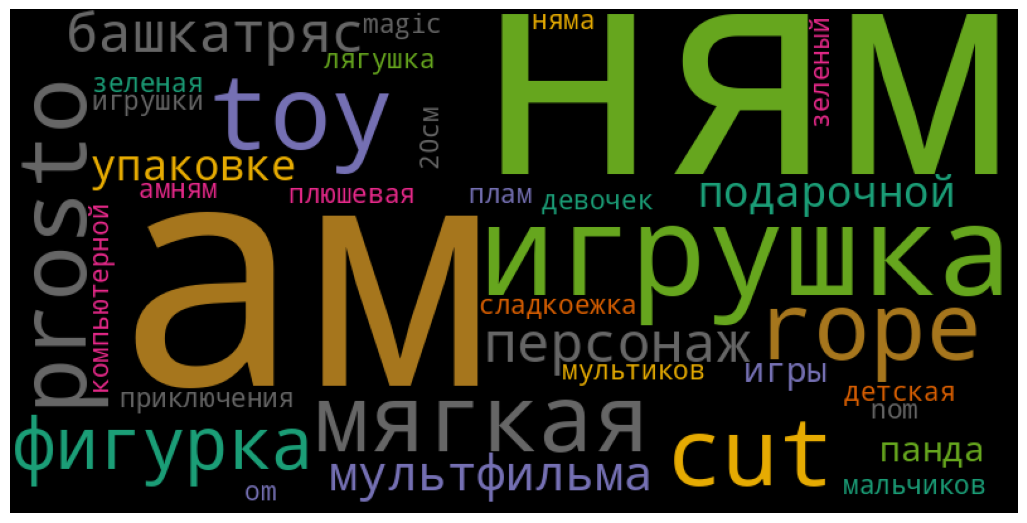

In [ ]:
word_cloud_nazvanie = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked_nazvanie)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud_nazvanie)
plt.axis("off")

In [ ]:
def stack_concat_opisanie():
  stack1_opisanie=copydata_opisanie['Описание1'].apply(pd.Series).stack()
  stack2_opisanie=copydata_opisanie['Описание2'].apply(pd.Series).stack()
  temp_opisanie=pd.concat([stack1_opisanie,stack2_opisanie])
  return temp_opisanie
ct_opisanie=stack_concat_opisanie()
stacked_opisanie=ct_opisanie.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

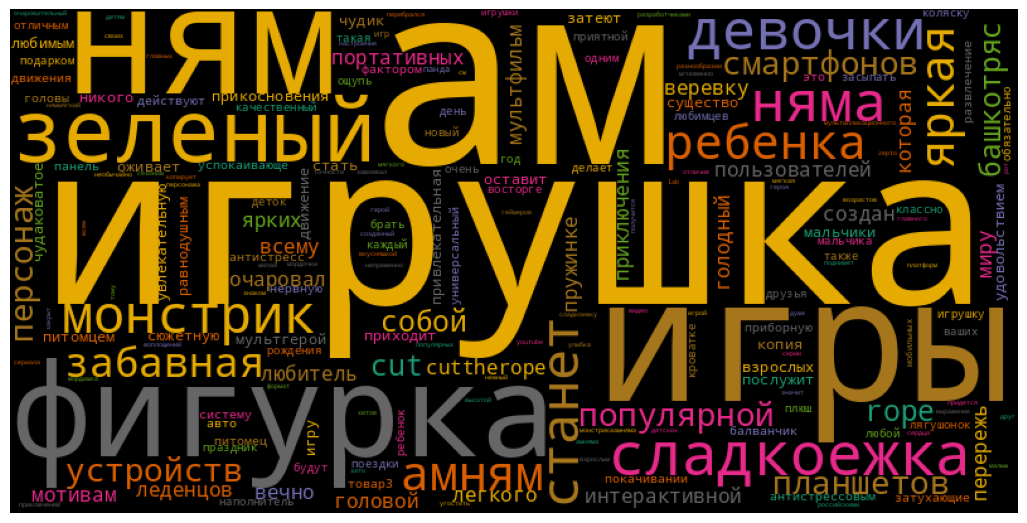

In [ ]:
word_cloud_opisanie = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked_opisanie)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud_opisanie)
plt.axis("off")

In [ ]:
def stack_concat_tip():
  stack1_tip=copydata['Тип1'].apply(pd.Series).stack()
  stack2_tip=copydata['Тип2'].apply(pd.Series).stack()
  temp_tip=pd.concat([stack1_tip,stack2_tip])
  return temp_tip
ct_tip=stack_concat_tip()
stacked_tip=ct_tip.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

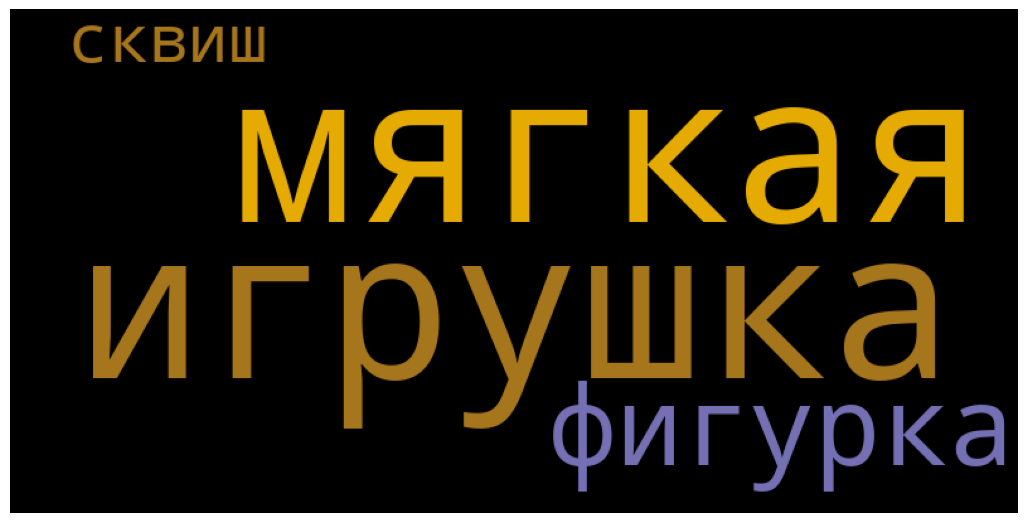

In [ ]:
word_cloud_tip = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked_tip)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud_tip)
plt.axis("off")

In [ ]:
def stack_concat_material():
  stack1_material=copydata['Материал1'].apply(pd.Series).stack()
  stack2_material=copydata['Материал2'].apply(pd.Series).stack()
  temp_material=pd.concat([stack1_material,stack2_material])
  return temp_material
ct_material=stack_concat_material()
stacked_material=ct_material.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

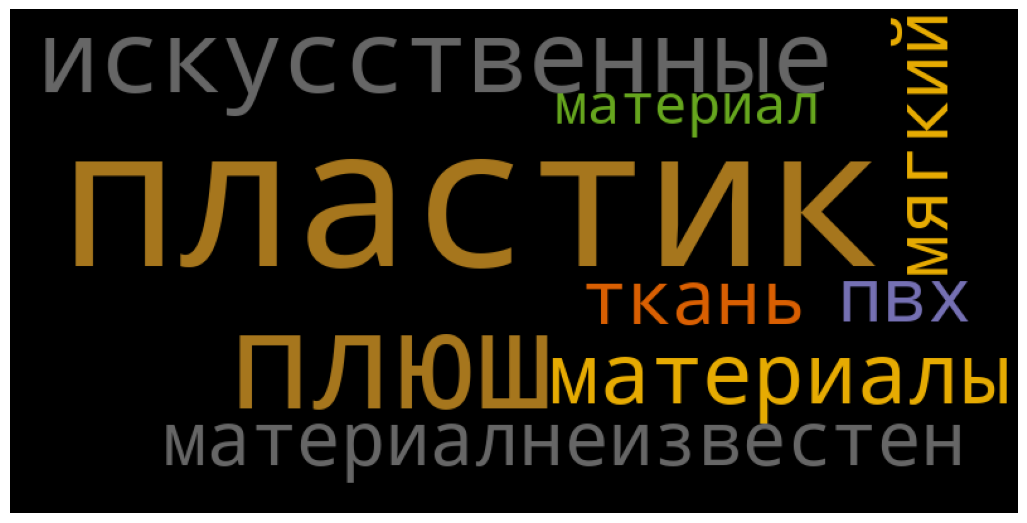

In [ ]:
word_cloud_material = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked_material)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud_material)
plt.axis("off")

In [ ]:
def stack_concat_vid_igrushki():
  stack1_vid_igrushki=copydata['Вид игрушки1'].apply(pd.Series).stack()
  stack2_vid_igrushki=copydata['Вид игрушки2'].apply(pd.Series).stack()
  temp_vid_igrushki=pd.concat([stack1_vid_igrushki,stack2_vid_igrushki])
  return temp_vid_igrushki
ct_vid_igrushki=stack_concat_vid_igrushki()
stacked_vid_igrushki=ct_vid_igrushki.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

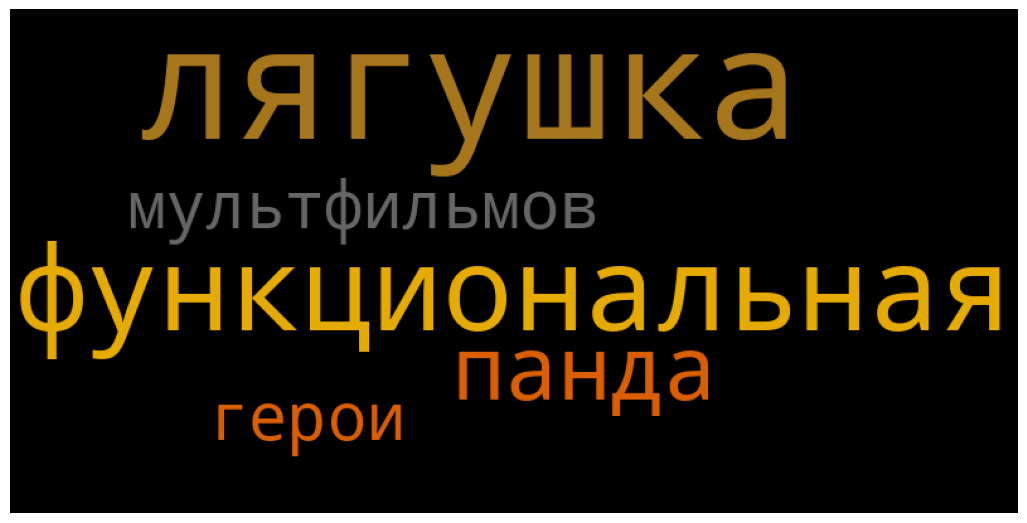

In [ ]:
word_cloud_vid_igrushki = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked_vid_igrushki)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud_vid_igrushki)
plt.axis("off")

In [ ]:
def stack_concat_tsvet():
  stack1_tsvet=copydata['Цвет1'].apply(pd.Series).stack()
  stack2_tsvet=copydata['Цвет2'].apply(pd.Series).stack()
  temp_tsvet=pd.concat([stack1_tsvet,stack2_tsvet])
  return temp_tsvet
ct_tsvet=stack_concat_tsvet()
stacked_tsvet=ct_tsvet.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

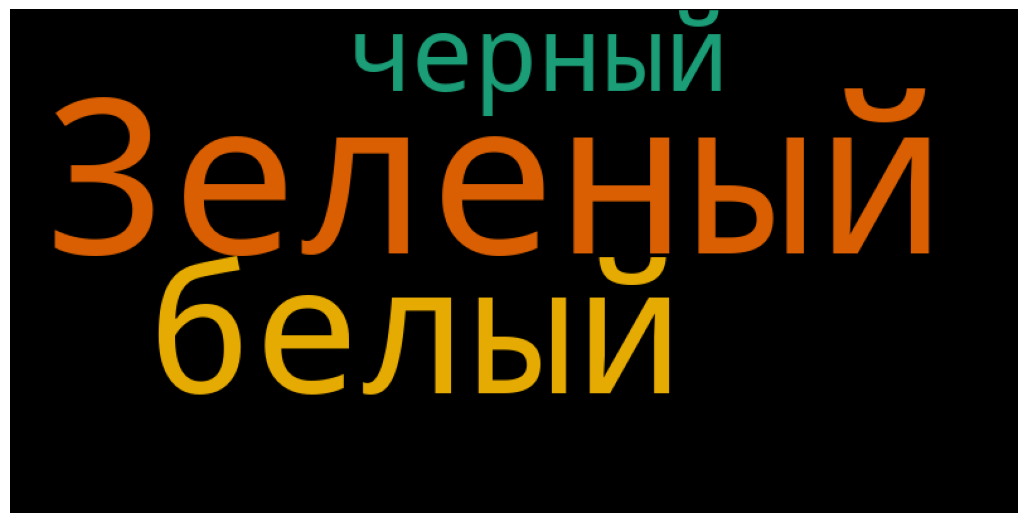

In [ ]:
word_cloud_tsvet = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked_tsvet)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud_tsvet)
plt.axis("off")

In [ ]:
def stack_concat_dop_funkcii():
  stack1_dop_funkcii=copydata['Дополнительные функции1'].apply(pd.Series).stack()
  stack2_dop_funkcii=copydata['Дополнительные функции2'].apply(pd.Series).stack()
  temp_dop_funkcii=pd.concat([stack1_dop_funkcii,stack2_dop_funkcii])
  return temp_dop_funkcii
ct_dop_funkcii=stack_concat_dop_funkcii()
stacked_dop_funkcii=ct_dop_funkcii.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

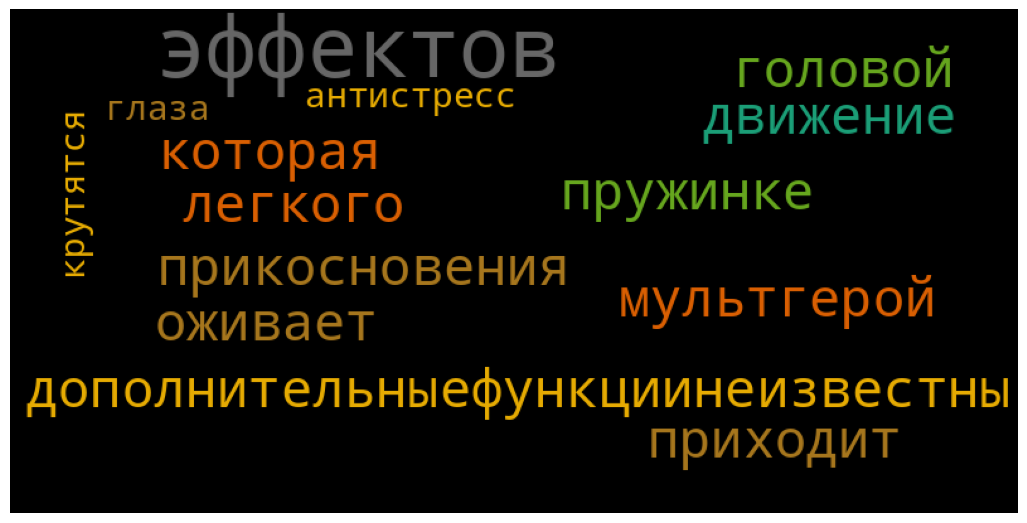

In [ ]:
word_cloud_dop_funkcii = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked_dop_funkcii)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud_dop_funkcii)
plt.axis("off")

In [ ]:
def stack_concat_strana_isgotovitel():
  stack1_strana_isgotovitel=copydata['Страна-изготовитель1'].apply(pd.Series).stack()
  stack2_strana_isgotovitel=copydata['Страна-изготовитель2'].apply(pd.Series).stack()
  temp_strana_isgotovitel=pd.concat([stack1_strana_isgotovitel,stack2_strana_isgotovitel])
  return temp_strana_isgotovitel
ct_strana_isgotovitel=stack_concat_strana_isgotovitel()
stacked_strana_isgotovitel=ct_strana_isgotovitel.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

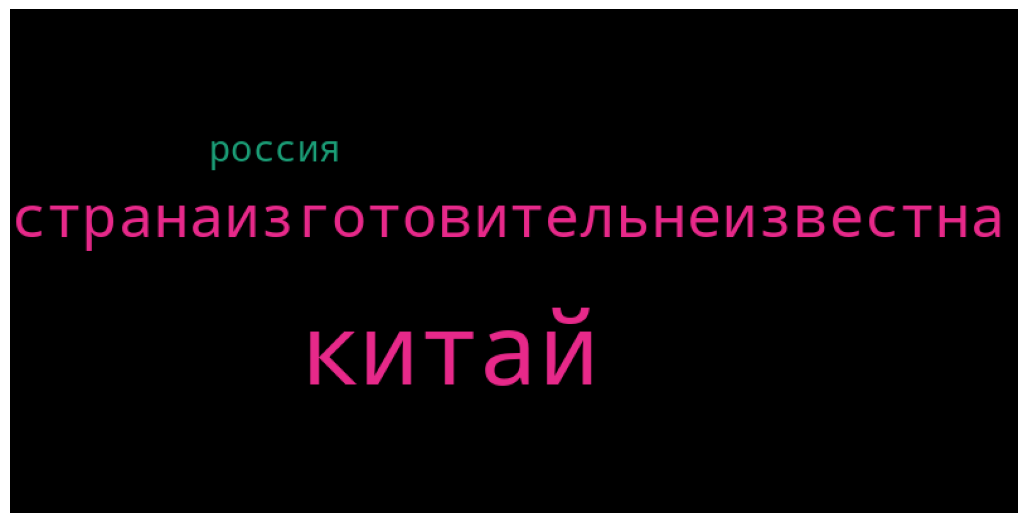

In [ ]:
word_cloud_strana_isgotovitel = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked_strana_isgotovitel)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud_strana_isgotovitel)
plt.axis("off")

In [ ]:
def stack_concat_min_vozrast():
  stack1_min_vozrast=copydata['Минимальный возраст ребенка1'].apply(pd.Series).stack()
  stack2_min_vozrast=copydata['Минимальный возраст ребенка2'].apply(pd.Series).stack()
  temp_min_vozrast=pd.concat([stack1_min_vozrast,stack2_min_vozrast])
  return temp_min_vozrast
ct_min_vozrast=stack_concat_min_vozrast()
stacked_min_vozrast=ct_min_vozrast.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

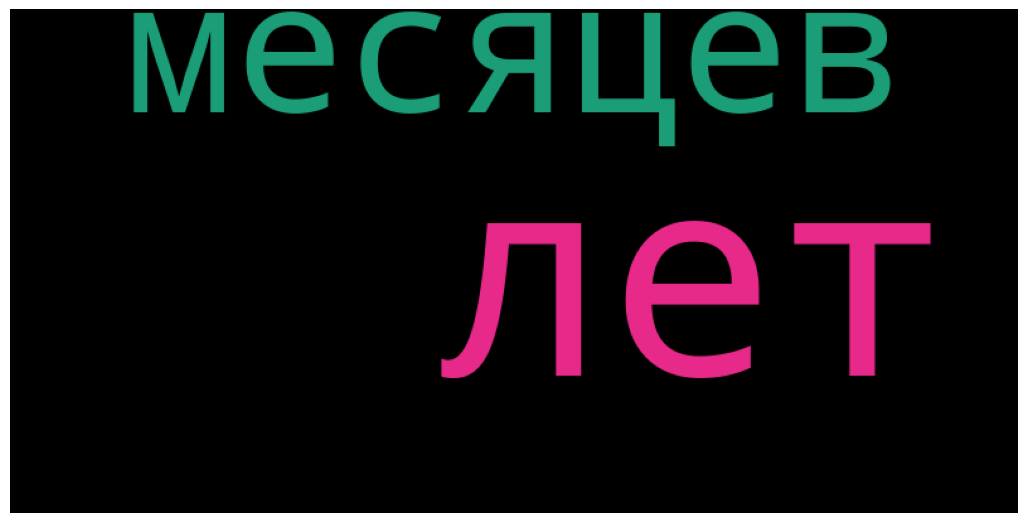

In [ ]:
word_cloud_min_vozrast = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked_min_vozrast)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud_min_vozrast)
plt.axis("off")

In [ ]:
def stack_concat_personaz():
  stack1_personaz=copydata['Персонаж1'].apply(pd.Series).stack()
  stack2_personaz=copydata['Персонаж2'].apply(pd.Series).stack()
  temp_personaz=pd.concat([stack1_personaz,stack2_personaz])
  return temp_personaz
ct_personaz=stack_concat_personaz()
stacked_personaz=ct_personaz.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

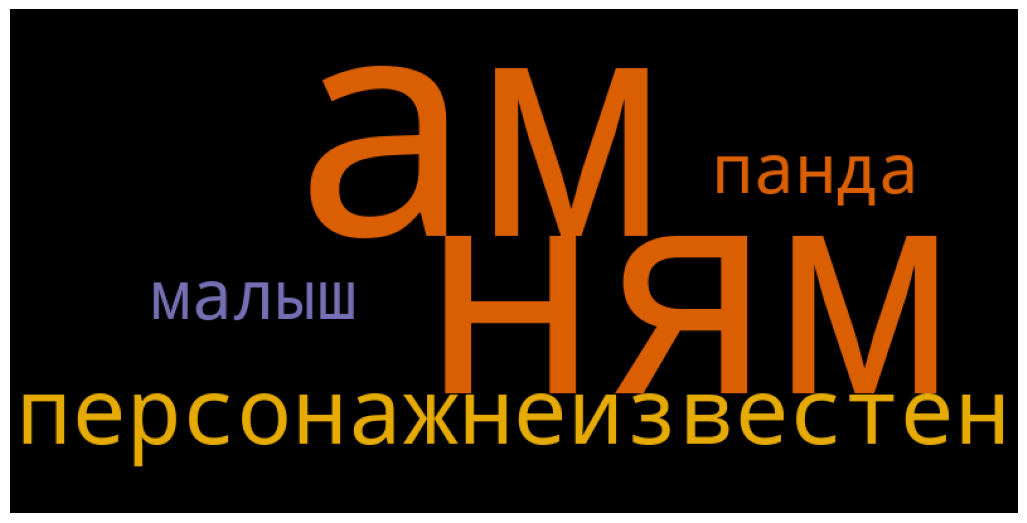

In [ ]:
word_cloud_personaz = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked_personaz)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud_personaz)
plt.axis("off")

In [ ]:
def stack_concat_pol():
  stack1_pol=copydata['Пол ребенка1'].apply(pd.Series).stack()
  stack2_pol=copydata['Пол ребенка2'].apply(pd.Series).stack()
  temp_pol=pd.concat([stack1_pol,stack2_pol])
  return temp_pol
ct_pol=stack_concat_pol()
stacked_pol=ct_pol.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

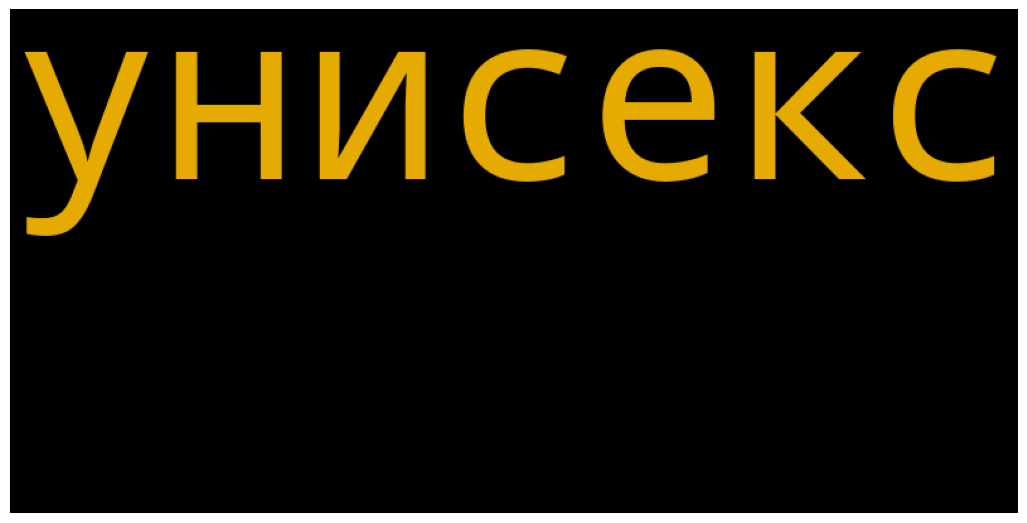

In [ ]:
word_cloud_pol = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked_pol)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud_pol)
plt.axis("off")

In [ ]:
def stack_concat_Brend():
  stack1_Brend=copydata['Бренд1'].apply(pd.Series).stack()
  stack2_Brend=copydata['Бренд2'].apply(pd.Series).stack()
  temp_Brend=pd.concat([stack1_Brend,stack2_Brend])
  return temp_Brend
ct_Brend=stack_concat_Brend()
stacked_Brend=ct_Brend.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

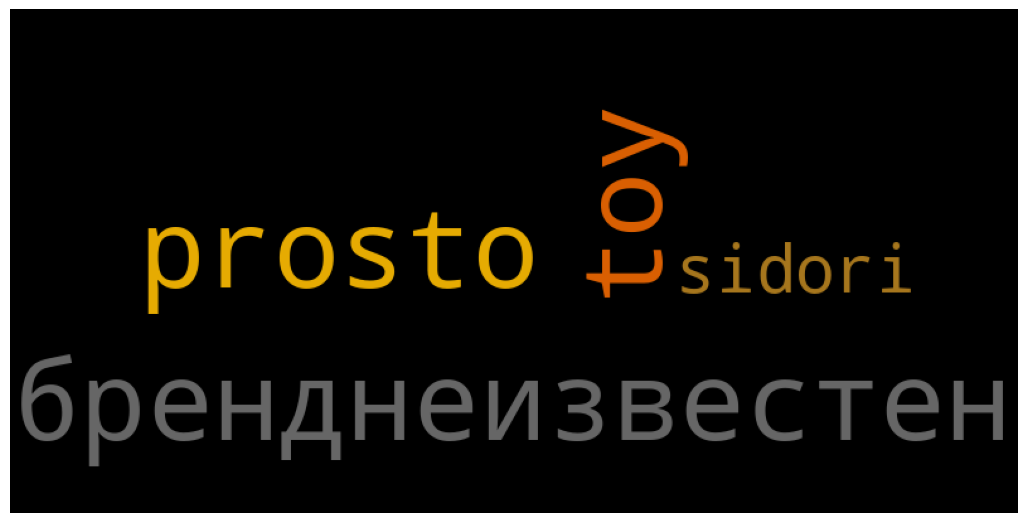

In [ ]:
word_cloud_Brend = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked_Brend)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud_Brend)
plt.axis("off")

In [ ]:
def stack_concat_charackteristiki_menshe10_():
  stack1_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_1'].apply(pd.Series).stack()
  stack2_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_2'].apply(pd.Series).stack()
  temp_charackteristiki_menshe10_=pd.concat([stack1_charackteristiki_menshe10_,stack2_charackteristiki_menshe10_])
  return temp_charackteristiki_menshe10_
ct_charackteristiki_menshe10_=stack_concat_charackteristiki_menshe10_()
stacked_charackteristiki_menshe10_=ct_charackteristiki_menshe10_.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

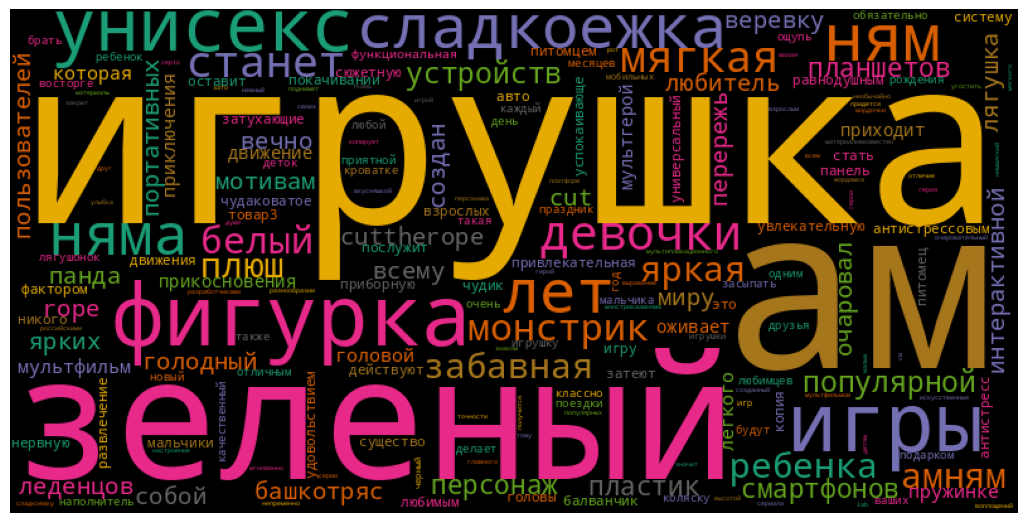

In [ ]:
word_cloud_charackteristiki_menshe10_ = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked_charackteristiki_menshe10_)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud_charackteristiki_menshe10_)
plt.axis("off")

In [ ]:
def stack_concat_charackteristiki_bolshe10_():
  stack1_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_1'].apply(pd.Series).stack()
  stack2_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_2'].apply(pd.Series).stack()
  temp_charackteristiki_bolshe10_=pd.concat([stack1_charackteristiki_bolshe10_,stack2_charackteristiki_bolshe10_])
  return temp_charackteristiki_bolshe10_
ct_charackteristiki_bolshe10_=stack_concat_charackteristiki_bolshe10_()
stacked_charackteristiki_bolshe10_=ct_charackteristiki_bolshe10_.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

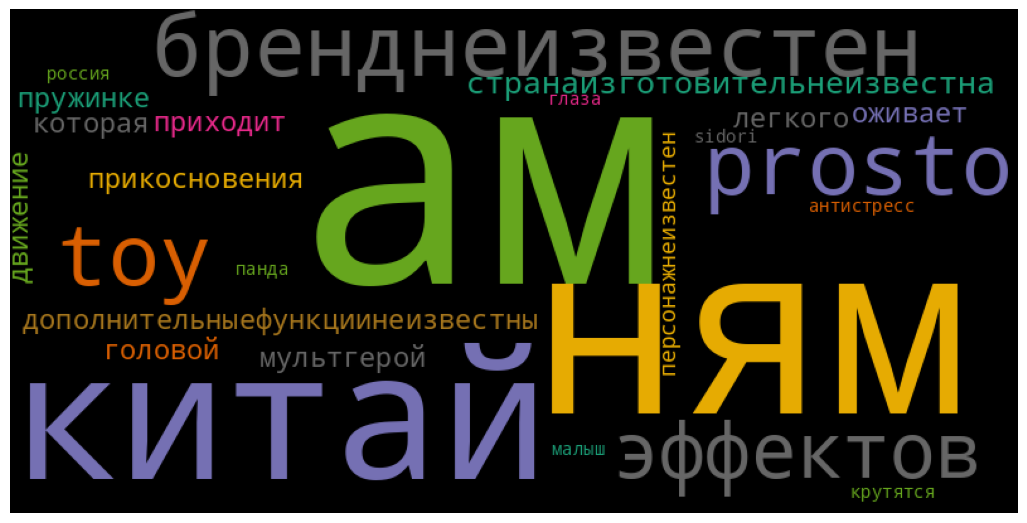

In [ ]:
word_cloud_charackteristiki_bolshe10_ = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked_charackteristiki_bolshe10_)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud_charackteristiki_bolshe10_)
plt.axis("off")

##Frequency Distribution

**Frequency Distribution Graph to Display Word Occurrence and Differences**

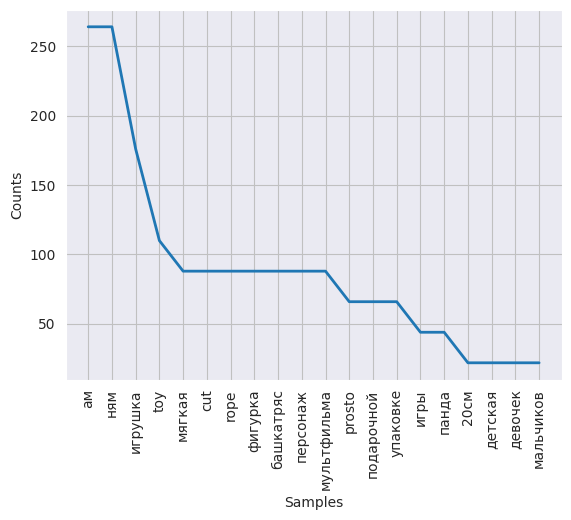

In [ ]:
sns.set_style('darkgrid')
nlp_words_nazvanie=nltk.FreqDist(ct_nazvanie)
nlp_words_nazvanie.plot(20);

In [ ]:
counts_nazvanie = Counter(ct_nazvanie)
print(counts_nazvanie.most_common(10))

[('ам', 264), ('ням', 264), ('игрушка', 176), ('toy', 110), ('мягкая', 88), ('cut', 88), ('rope', 88), ('фигурка', 88), ('башкатряс', 88), ('персонаж', 88)]


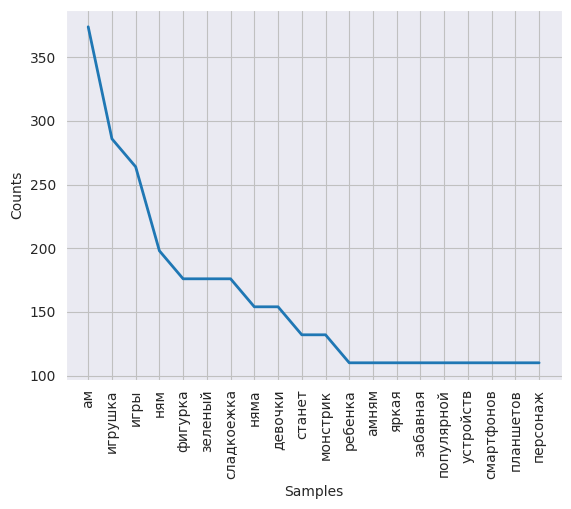

In [ ]:
sns.set_style('darkgrid')
nlp_words_opisanie=nltk.FreqDist(ct_opisanie)
nlp_words_opisanie.plot(20);

In [ ]:
counts_opisanie = Counter(ct_opisanie)
print(counts_opisanie.most_common(10))

[('ам', 374), ('игрушка', 286), ('игры', 264), ('ням', 198), ('фигурка', 176), ('зеленый', 176), ('сладкоежка', 176), ('няма', 154), ('девочки', 154), ('станет', 132)]


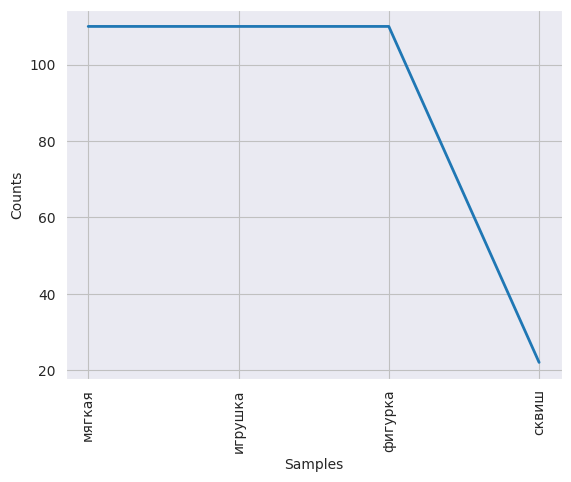

In [ ]:
sns.set_style('darkgrid')
nlp_words_tip=nltk.FreqDist(ct_tip)
nlp_words_tip.plot(20);

In [ ]:
counts_tip = Counter(ct_tip)
print(counts_tip.most_common(10))

[('мягкая', 110), ('игрушка', 110), ('фигурка', 110), ('сквиш', 22)]


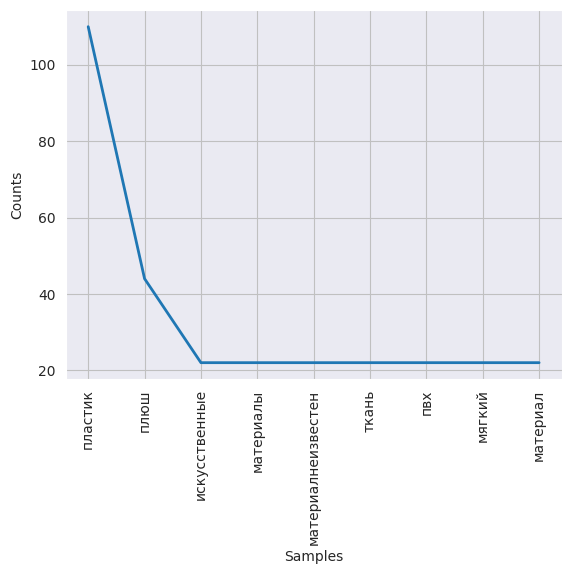

In [ ]:
sns.set_style('darkgrid')
nlp_words_material=nltk.FreqDist(ct_material)
nlp_words_material.plot(20);

In [ ]:
counts_material = Counter(ct_material)
print(counts_material.most_common(10))

[('пластик', 110), ('плюш', 44), ('искусственные', 22), ('материалы', 22), ('материалнеизвестен', 22), ('ткань', 22), ('пвх', 22), ('мягкий', 22), ('материал', 22)]


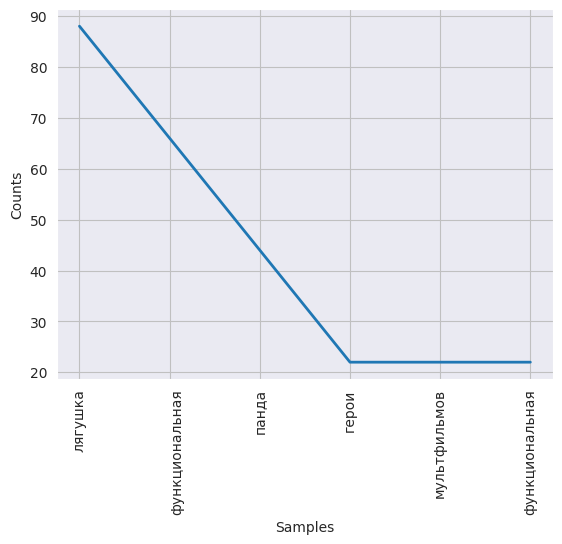

In [ ]:
sns.set_style('darkgrid')
nlp_words_vid_igrushki=nltk.FreqDist(ct_vid_igrushki)
nlp_words_vid_igrushki.plot(20);

In [ ]:
counts_vid_igrushki = Counter(ct_vid_igrushki)
print(counts_vid_igrushki.most_common(10))

[('лягушка', 88), ('\nфункциональная', 66), ('панда', 44), ('герои', 22), ('мультфильмов', 22), ('функциональная', 22)]


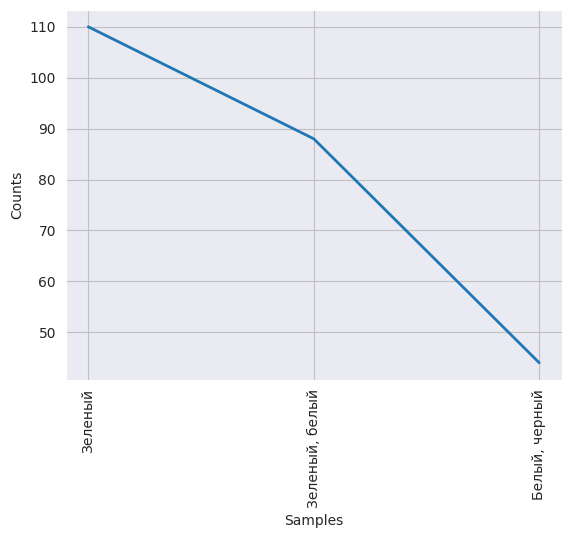

In [ ]:
sns.set_style('darkgrid')
nlp_words_tsvet=nltk.FreqDist(ct_tsvet)
nlp_words_tsvet.plot(20);

In [ ]:
counts_tsvet = Counter(ct_tsvet)
print(counts_tsvet.most_common(10))

[('Зеленый', 110), ('Зеленый, белый', 88), ('Белый, черный', 44)]


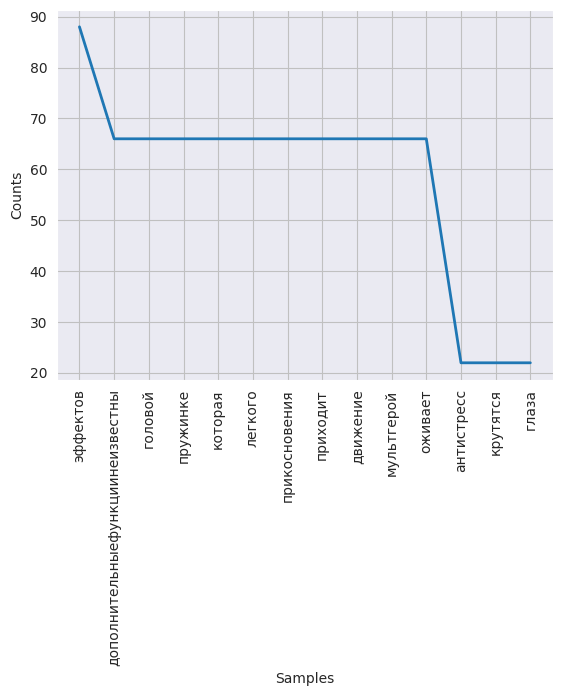

In [ ]:
sns.set_style('darkgrid')
nlp_words_dop_funkcii=nltk.FreqDist(ct_dop_funkcii)
nlp_words_dop_funkcii.plot(20);

In [ ]:
counts_dop_funkcii = Counter(ct_dop_funkcii)
print(counts_dop_funkcii.most_common(10))

[('эффектов', 88), ('дополнительныефункциинеизвестны', 66), ('головой', 66), ('пружинке', 66), ('которая', 66), ('легкого', 66), ('прикосновения', 66), ('приходит', 66), ('движение', 66), ('мультгерой', 66)]


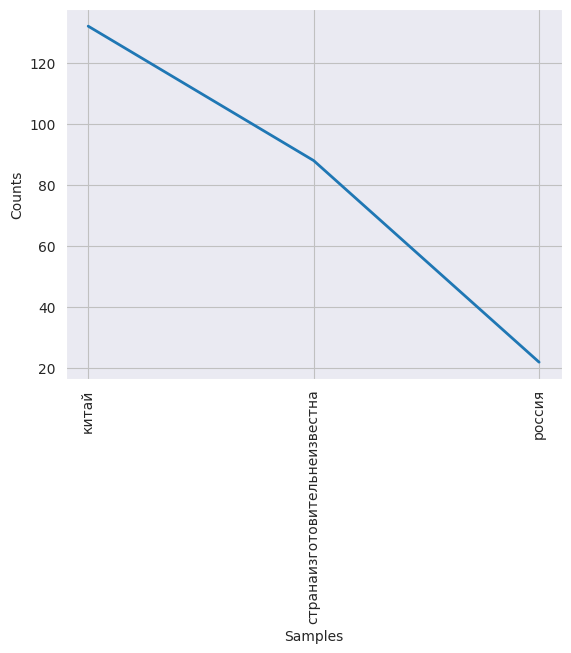

In [ ]:
sns.set_style('darkgrid')
nlp_words_strana_isgotovitel=nltk.FreqDist(ct_strana_isgotovitel)
nlp_words_strana_isgotovitel.plot(20);

In [ ]:
counts_strana_isgotovitel = Counter(ct_strana_isgotovitel)
print(counts_strana_isgotovitel.most_common(10))

[('китай', 132), ('cтранаизготовительнеизвестна', 88), ('россия', 22)]


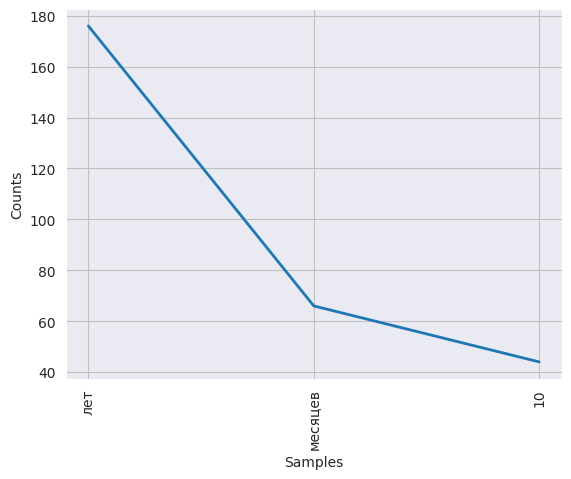

In [ ]:
sns.set_style('darkgrid')
nlp_words_min_vozrast=nltk.FreqDist(ct_min_vozrast)
nlp_words_min_vozrast.plot(20);

In [ ]:
counts_min_vozrast = Counter(ct_min_vozrast)
print(counts_min_vozrast.most_common(10))

[('лет', 176), ('месяцев', 66), ('10', 44)]


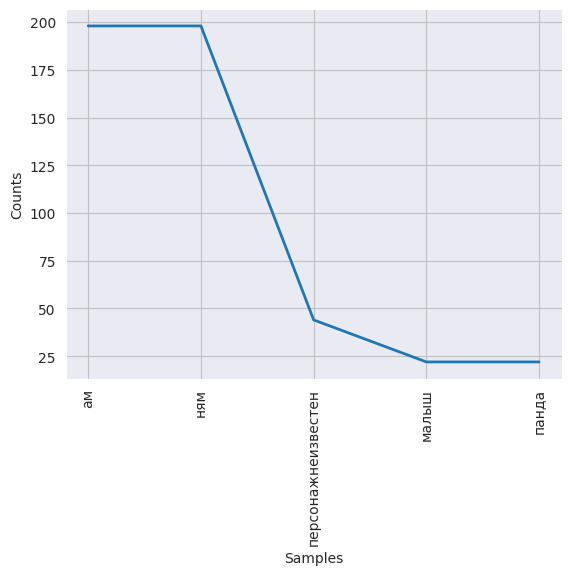

In [ ]:
sns.set_style('darkgrid')
nlp_words_personaz=nltk.FreqDist(ct_personaz)
nlp_words_personaz.plot(20);

In [ ]:
counts_personaz = Counter(ct_personaz)
print(counts_personaz.most_common(10))

[('ам', 198), ('ням', 198), ('персонажнеизвестен', 44), ('малыш', 22), ('панда', 22)]


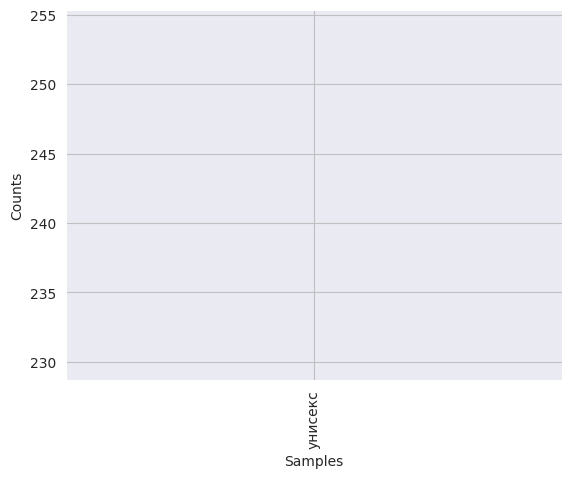

In [ ]:
sns.set_style('darkgrid')
nlp_words_pol=nltk.FreqDist(ct_pol)
nlp_words_pol.plot(20);

In [ ]:
counts_pol = Counter(ct_pol)
print(counts_pol.most_common(10))

[('унисекс', 242)]


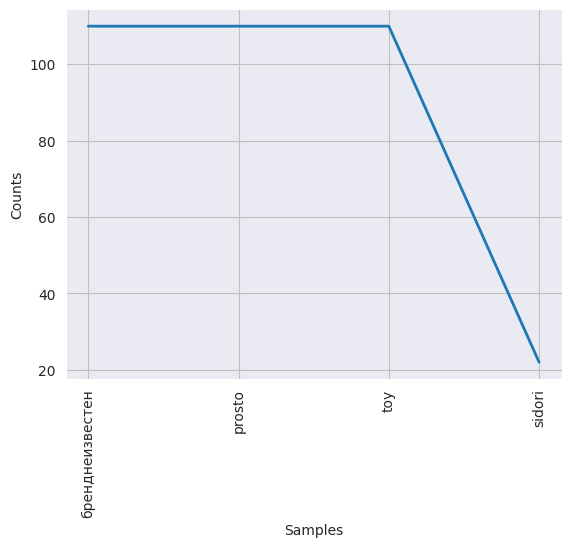

In [ ]:
sns.set_style('darkgrid')
nlp_words_Brend=nltk.FreqDist(ct_Brend)
nlp_words_Brend.plot(20);

In [ ]:
counts_Brend = Counter(ct_Brend)
print(counts_Brend.most_common(10))

[('бренднеизвестен', 110), ('prosto', 110), ('toy', 110), ('sidori', 22)]


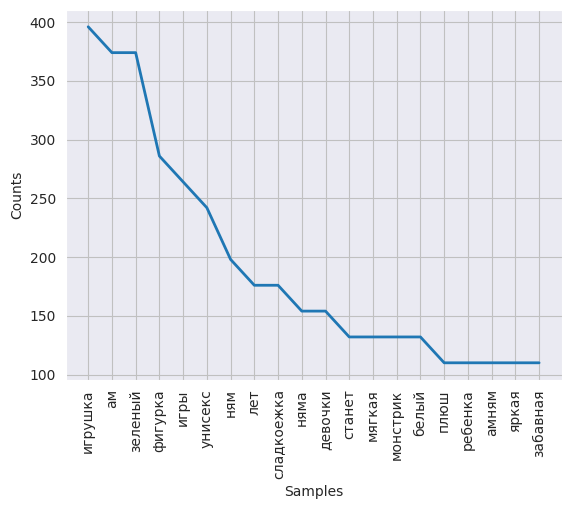

In [ ]:
sns.set_style('darkgrid')
nlp_words_charackteristiki_menshe10_=nltk.FreqDist(ct_charackteristiki_menshe10_)
nlp_words_charackteristiki_menshe10_.plot(20);

In [ ]:
counts_charackteristiki_menshe10_ = Counter(ct_charackteristiki_menshe10_)
print(counts_charackteristiki_menshe10_.most_common(10))

[('игрушка', 396), ('ам', 374), ('зеленый', 374), ('фигурка', 286), ('игры', 264), ('унисекс', 242), ('ням', 198), ('лет', 176), ('сладкоежка', 176), ('няма', 154)]


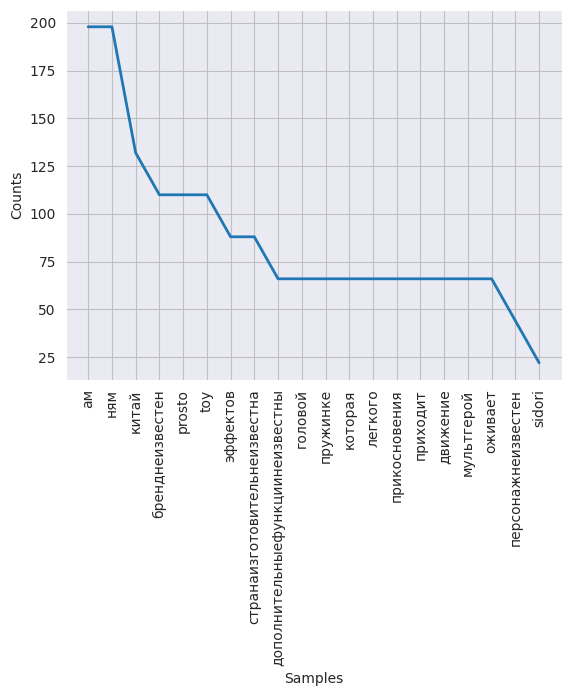

In [ ]:
sns.set_style('darkgrid')
nlp_words_charackteristiki_bolshe10_=nltk.FreqDist(ct_charackteristiki_bolshe10_)
nlp_words_charackteristiki_bolshe10_.plot(20);

In [ ]:
counts_charackteristiki_bolshe10_ = Counter(ct_charackteristiki_bolshe10_)
print(counts_charackteristiki_bolshe10_.most_common(10))

[('ам', 198), ('ням', 198), ('китай', 132), ('бренднеизвестен', 110), ('prosto', 110), ('toy', 110), ('эффектов', 88), ('cтранаизготовительнеизвестна', 88), ('дополнительныефункциинеизвестны', 66), ('головой', 66)]


##Count Vecotrizer and Cosine Similarity

In [ ]:
bow_converter = CountVectorizer()
copydata_nazvanie.pipe(detoken).pipe(remove_space)
similarity_nazvanie=[]
similarity_nazvanie = count_vcr_nazvanie()
data_cvr_nazvanie=copydata_nazvanie.copy()
data_cvr_nazvanie['Similarity_название']=similarity_nazvanie


KeyError: ignored

In [ ]:
data_cvr_nazvanie[:2]

,Номер пары,Идентичность пары,Порядковый номер1,ссылка1,название1,цена1,цена по карте1,Описание1,Тип1,Материал1,Вид игрушки1,"Высота игрушки, см1",Цвет1,Дополнительные функции1,Страна-изготовитель1,Минимальный возраст ребенка1,Персонаж1,Пол ребенка1,Бренд1,Порядковый номер2,ссылка2,название2,цена2,цена по карте2,Описание2,Тип2,Материал2,Вид игрушки2,"Высота игрушки, см2",Цвет2,Дополнительные функции2,Страна-изготовитель2,Минимальный возраст ребенка2,Персонаж2,Пол ребенка2,Бренд2,"Разница между столбцами ""цена1"" и ""цена2""","Разница между столбцами ""цена по карте1"" и ""цена по карте2""","Разница между столбцами ""Высота игрушки, см1"" и ""Высота игрушки, см2""",Относительная разница в цене,Относительная разница в цене по карте,Относительная разница в высоте игрушки,Характеристики отсутствующие значения <10%_1,Характеристики отсутствующие значения <10%_2,Характеристики отсутствующие значения >10%_1,Характеристики отсутствующие значения >10%_2,Цвет игрушки1,Цвет игрушки2,Similarity_название
0,1,1,1,https://www.ozon.ru/product/myagkaya-igrushka-...,мягкая игрушка ам ням cut rope ам ням 20см,430,421,лягушонок ам ням игры cut rope обязательно ста...,мягкая игрушка,плюш,лягушка,20.0,Зеленый,эффектов,китай,10 месяцев,ам ням,унисекс,бренднеизвестен,1,https://www.ozon.ru/product/myagkaya-igrushka-...,мягкая игрушка ам ням cut rope ам ням 20см,430,421,лягушонок ам ням игры cut rope обязательно ста...,мягкая игрушка,плюш,лягушка,20.0,Зеленый,эффектов,китай,10 месяцев,ам ням,унисекс,бренднеизвестен,0,0,0.0,0.000000,0.000000,0.000000,лягушонок ам ням игры cut rope обязательно ста...,лягушонок ам ням игры cut rope обязательно ста...,эффектов китай ам ням бренднеизвестен,эффектов китай ам ням бренднеизвестен,Зеленый,Зеленый,[[1.0]]
1,2,1,2,https://www.ozon.ru/product/detskaya-myagkaya-...,детская мягкая игрушка ам ням девочек мальчико...,392,384,ам няммягкий нежный друг ребенка,мягкая игрушка,искусственные материалы,герои мультфильмов,15.0,Зеленый,эффектов,китай,месяцев,персонажнеизвестен,унисекс,sidori,1,https://www.ozon.ru/product/myagkaya-igrushka-...,мягкая игрушка ам ням cut rope ам ням 20см,430,421,лягушонок ам ням игры cut rope обязательно ста...,мягкая игрушка,плюш,лягушка,20.0,Зеленый,эффектов,китай,10 месяцев,ам ням,унисекс,бренднеизвестен,38,37,5.0,0.096939,0.096354,0.333333,ам няммягкий нежный друг ребенка мягкая игрушк...,лягушонок ам ням игры cut rope обязательно ста...,эффектов китай персонажнеизвестен sidori,эффектов китай персонажнеизвестен sidori,Зеленый,Зеленый,[[0.5547001962252291]]


In [ ]:
def count_vcr_opisanie():
  for i in range(len(data_cvr_nazvanie)):
    doc1_opisanie=data_cvr_nazvanie['Описание1'][i]
    doc2_opisanie=data_cvr_nazvanie['Описание2'][i]
    docs_opisanie=(doc1_opisanie,doc2_opisanie)
    matrix_opisanie = CountVectorizer().fit_transform(docs_opisanie)
    cosine_sim_opisanie = cosine_similarity(matrix_opisanie[0], matrix_opisanie[1])
    similarity_opisanie.append(cosine_sim_opisanie)
  return similarity_opisanie



In [ ]:
def similarity_fn_opisanie():
  for i in range(len(data_cvr_nazvanie)):
    doc1_opisanie=data_cvr_nazvanie['Описание1'][i]
    doc2_opisanie=data_cvr_nazvanie['Описание2'][i]
    docs_opisanie=(doc1_opisanie,doc2_opisanie)
    tfidf_matrix_opisanie = tfidf_vectorizer.fit_transform(docs_opisanie)
    cosine_sim_opisanie = cosine_similarity(tfidf_matrix_opisanie[0], tfidf_matrix_opisanie[1])
    similarity_opisanie.append(cosine_sim_opisanie)
  return similarity_opisanie



In [ ]:
#bow_converter = CountVectorizer()
#copydata.pipe(detoken).pipe(remove_space)
#similarity_nazvanie=[]
#similarity_nazvanie = count_vcr_nazvanie()
#data_cvr_nazvanie=copydata.copy()
#data_cvr_nazvanie['Similarity_название']=similarity_nazvanie

#opisanie
bow_converter = CountVectorizer()
data_cvr_nazvanie.pipe(detoken).pipe(remove_space)
similarity_opisanie=[]
similarity_opisanie = count_vcr_opisanie()
data_cvr_opisanie=data_cvr_nazvanie.copy()
data_cvr_opisanie['Similarity_описание']=similarity_opisanie

ValueError: ignored

In [ ]:
#def count_vcr_nazvanie():
#  for i in range(len(copydata)):
#    doc1_nazvanie=copydata['название1'][i]
#    doc2_nazvanie=copydata['название2'][i]
#    docs_nazvanie=(doc1_nazvanie,doc2_nazvanie)
#    matrix_nazvanie = CountVectorizer().fit_transform(docs_nazvanie)
#    cosine_sim_nazvanie = cosine_similarity(matrix_nazvanie[0], matrix_nazvanie[1])
#    similarity_nazvanie.append(cosine_sim_nazvanie)
#  return similarity_nazvanie

#def similarity_fn_nazvanie():
#  for i in range(len(copydata)):
#    doc1_nazvanie=copydata['название1'][i]
#    doc2_nazvanie=copydata['название2'][i]
#    docs_nazvanie=(doc1_nazvanie,doc2_nazvanie)
#    tfidf_matrix_nazvanie = tfidf_vectorizer.fit_transform(docs_nazvanie)
#    cosine_sim_nazvanie = cosine_similarity(tfidf_matrix_nazvanie[0], tfidf_matrix_nazvanie[1])
#    similarity_nazvanie.append(cosine_sim_nazvanie)
#  return similarity_nazvanie

#def count_vcr_opisanie():
#  for i in range(len(copydata)):
#    doc1_opisanie=copydata['Описание1'][i]
#    doc2_opisanie=copydata['Описаниe2'][i]
#    docs_opisanie=(doc1_opisanie,doc2_opisanie)
#    matrix_opisanie = CountVectorizer().fit_transform(docs_opisanie)
#    cosine_sim_opisanie = cosine_similarity(matrix_opisanie[0], matrix_opisanie[1])
#    similarity_opisanie.append(cosine_sim_opisanie)
#  return similarity_opisanie

#def similarity_fn_opisanie():
#  for i in range(len(copydata)):
#    doc1_opisanie=copydata['Описание1'][i]
#    doc2_opisanie=copydata['Описание2'][i]
#    docs_opisanie=(doc1_opisanie,doc2_opisanie)
#    tfidf_matrix_opisanie = tfidf_vectorizer.fit_transform(docs_opisanie)
#    cosine_sim_opisanie = cosine_similarity(tfidf_matrix_opisanie[0], tfidf_matrix_opisanie[1])
#    similarity_opisanie.append(cosine_sim_opisanie)
#  return similarity_opisanie

#def count_vcr_tip():
#  for i in range(len(copydata)):
#    doc1_tip=copydata['Тип1'][i]
#    doc2_tip=copydata['Тип2'][i]
#    docs_tip=(doc1_tip,doc2_tip)
#    matrix_tip = CountVectorizer().fit_transform(docs_tip)
#    cosine_sim_tip = cosine_similarity(matrix_tip[0], matrix_tip[1])
#    similarity_tip.append(cosine_sim_tip)
#  return similarity_tip

#def similarity_fn_tip():
#  for i in range(len(copydata)):
#    doc1_tip=copydata['Тип1'][i]
#    doc2_tip=copydata['Тип2'][i]
#    docs_tip=(doc1_tip,doc2_tip)
#    tfidf_matrix_tip = tfidf_vectorizer.fit_transform(docs_tip)
#    cosine_sim_tip = cosine_similarity(tfidf_matrix_tip[0], tfidf_matrix_tip[1])
#    similarity_tip.append(cosine_sim_tip)
#  return similarity_tip

#def count_vcr_material():
#  for i in range(len(copydata)):
#    doc1_material=copydata['Материал1'][i]
#    doc2_material=copydata['Материал2'][i]
#    docs_material=(doc1_material,doc2_material)
#    matrix_material = CountVectorizer().fit_transform(docs_material)
#    cosine_sim_material = cosine_similarity(matrix_material[0], matrix_material[1])
#    similarity_material.append(cosine_sim_material)
#  return similarity_material

#def similarity_fn_material():
#  for i in range(len(copydata)):
#    doc1_material=copydata['Материал1'][i]
#    doc2_material=copydata['Материал2'][i]
#     docs_material=(doc1_material,doc2_material)
#    tfidf_matrix_material = tfidf_vectorizer.fit_transform(docs_material)
#    cosine_sim_material = cosine_similarity(tfidf_matrix_material[0], tfidf_matrix_material[1])
#    similarity_material.append(cosine_sim_material)
#  return similarity_material

#def count_vcr_vid_igrushki():
#  for i in range(len(copydata)):
#    doc1_vid_igrushki=copydata['Вид игрушки1'][i]
#    doc2_vid_igrushki=copydata['Вид игрушки2'][i]
#    docs_vid_igrushki=(doc1_vid_igrushki,doc2_vid_igrushki)
#    matrix_vid_igrushki = CountVectorizer().fit_transform(docs_vid_igrushki)
# 
#    cosine_sim_vid_igrushki = cosine_similarity(matrix_vid_igrushki[0], matrix_vid_igrushki[1])
#    similarity_vid_igrushki.append(cosine_sim_vid_igrushki)
#  return similarity_vid_igrushki

#def similarity_fn_vid_igrushki():
#  for i in range(len(copydata)):
#    doc1_vid_igrushki=copydata['Вид игрушки1'][i]
#    doc2_vid_igrushki=copydata['Вид игрушки2'][i]
#    docs_vid_igrushki=(doc1_vid_igrushki,doc2_vid_igrushki)
#    tfidf_matrix_vid_igrushki = tfidf_vectorizer.fit_transform(docs_vid_igrushki)
#    cosine_sim_vid_igrushki = cosine_similarity(tfidf_matrix_vid_igrushki[0], tfidf_matrix_vid_igrushki[1])
#    similarity_vid_igrushki.append(cosine_sim_vid_igrushki)
#  return similarity_vid_igrushki

#def count_vcr_tsvet():
#  for i in range(len(copydata)):
#    doc1_tsvet=copydata['Цвет1'][i]
#    doc2_tsvet=copydata['Цвет2'][i]
#    docs_tsvet=(doc1_tsvet,doc2_tsvet)
#    matrix_tsvet = CountVectorizer().fit_transform(docs_tsvet)
#    cosine_sim_tsvet= cosine_similarity(matrix_tsvet[0], matrix_tsvet[1])
#    similarity_tsvet.append(cosine_sim_tsvet)
#  return similarity_tsvet

#def similarity_fn_tsvet():
#  for i in range(len(copydata)):
#    doc1_tsvet=copydata['Цвет1'][i]
#    doc2_tsvet=copydata['Цвет2'][i]
#    docs_tsvet=(doc1_tsvet,doc2_tsvet)
#    tfidf_matrix_tsvet = tfidf_vectorizer.fit_transform(docs_tsvet)
#    cosine_sim_tsvet = cosine_similarity(tfidf_matrix_tsvet[0], tfidf_matrix_tsvet[1])
#    similarity_tsvet.append(cosine_sim_tsvet)
#  return similarity_tsvet

#def count_vcr_dop_funkcii():
#  for i in range(len(copydata)):
#    doc1_dop_funkcii=copydata['Дополнительные функции1'][i]
#    doc2_dop_funkcii=copydata['Дополнительные функции2'][i]
#    docs_dop_funkcii=(doc1_dop_funkcii,doc2_dop_funkcii)
#    matrix_dop_funkcii = CountVectorizer().fit_transform(docs_dop_funkcii)
#    cosine_sim_dop_funkcii = cosine_similarity(matrix_dop_funkcii[0], matrix_dop_funkcii[1])
#    similarity_dop_funkcii.append(cosine_sim_dop_funkcii)
#  return similarity_dop_funkcii

#def similarity_fn_dop_funkcii():
#  for i in range(len(copydata)):
#    doc1_dop_funkcii=copydata['Дополнительные функции1'][i]
#    doc2_dop_funkcii=copydata['Дополнительные функции2'][i]
#    docs_dop_funkcii=(doc1_dop_funkcii,doc2_dop_funkcii)
#    tfidf_matrix_dop_funkcii = tfidf_vectorizer.fit_transform(docs_dop_funkcii)
#    cosine_sim_dop_funkcii = cosine_similarity(tfidf_matrix_dop_funkcii[0], tfidf_matrix_dop_funkcii[1])
#    similarity_dop_funkcii.append(cosine_sim_dop_funkcii)
#  return similarity_dop_funkcii

#def count_vcr_strana_isgotovitel():
#  for i in range(len(copydata)):
#    doc1_strana_isgotovitel=copydata['Страна-изготовитель1'][i]
#    doc2_strana_isgotovitel=copydata['Страна-изготовитель2'][i]
#    docs_strana_isgotovitel=(doc1_strana_isgotovitel,doc2_strana_isgotovitel)
#    matrix_strana_isgotovitel = CountVectorizer().fit_transform(docs_strana_isgotovitel)
#    cosine_sim_strana_isgotovitel = cosine_similarity(matrix_strana_isgotovitel[0], matrix_strana_isgotovitel[1])
#    similarity_strana_isgotovitel.append(cosine_sim_strana_isgotovitel)
#  return similarity_strana_isgotovitel

#def similarity_fn_strana_isgotovitel():
#  for i in range(len(copydata)):
#    doc1_strana_isgotovitel=copydata['Страна-изготовитель1'][i]
#    doc2_strana_isgotovitel=copydata['Страна-изготовитель2'][i]
#    docs_strana_isgotovitel=(doc1_strana_isgotovitel,doc2_strana_isgotovitel)
#    tfidf_matrix_strana_isgotovitel = tfidf_vectorizer.fit_transform(docs_strana_isgotovitel)
#    cosine_sim_strana_isgotovitel = cosine_similarity(tfidf_matrix_strana_isgotovitel[0], tfidf_matrix_strana_isgotovitel[1])
#    similarity_strana_isgotovitel.append(cosine_sim_strana_isgotovitel)
#  return similarity_strana_isgotovitel

  
#def count_vcr_min_vozrast():
#  for i in range(len(copydata)):
#    doc1_min_vozrast=copydata['Минимальный возраст ребенка1'][i]
#    doc2_min_vozrast=copydata['Минимальный возраст ребенка2'][i]
#    docs_min_vozrast=(doc1_min_vozrast,doc2_min_vozrast)
#    matrix_min_vozrast = CountVectorizer().fit_transform(docs_min_vozrast)
#    cosine_sim_min_vozrast = cosine_similarity(matrix_min_vozrast[0], matrix_min_vozrast[1])
#    similarity_min_vozrast.append(cosine_sim_min_vozrast)
#  return similarity_min_vozrast

#def similarity_fn_min_vozrast():
#  for i in range(len(copydata)):
#    doc1_min_vozrast=copydata['Минимальный возраст ребенка1'][i]
#    doc2_min_vozrast=copydata['Минимальный возраст ребенка2'][i]
#    docs_min_vozrast=(doc1_min_vozrast,doc2_min_vozrast)
#    tfidf_matrix_min_vozrast = tfidf_vectorizer.fit_transform(docs_min_vozrast)
#    cosine_sim_min_vozrast = cosine_similarity(tfidf_matrix_min_vozrast[0], tfidf_matrix_min_vozrast[1])
#    similarity_min_vozrast.append(cosine_sim_min_vozrast)
#  return similarity_min_vozrast

#def count_vcr_personaz():
#  for i in range(len(copydata)):
#    doc1_personaz=copydata['Персонаж1'][i]
#    doc2_personaz=copydata['Персонаж2'][i]
#    docs_personaz=(doc1_personaz,doc2_personaz)
#    matrix_personaz = CountVectorizer().fit_transform(docs_personaz)
#    cosine_sim_personaz = cosine_similarity(matrix_personaz[0], matrix_personaz[1])
#    similarity_personaz.append(cosine_sim_personaz)
#  return similarity_personaz

#def similarity_fn_personaz():
#  for i in range(len(copydata)):
#    doc1_personaz=copydata['Персонаж1'][i]
#    doc2_personaz=copydata['Персонаж2'][i]
#    docs_personaz=(doc1_personaz,doc2_personaz)
#    tfidf_matrix_personaz = tfidf_vectorizer.fit_transform(docs_personaz)
#    cosine_sim_personaz = cosine_similarity(tfidf_matrix_personaz[0], tfidf_matrix_personaz[1])
#    similarity_personaz.append(cosine_sim_personaz)
#  return similarity_personaz

#def count_vcr_pol():
#  for i in range(len(copydata)):
#    doc1_pol=copydata['Пол ребенка1'][i]
#    doc2_pol=copydata['Пол ребенка2'][i]
#    docs_pol=(doc1_pol,doc2_pol)
#    matrix_pol = CountVectorizer().fit_transform(docs_pol)
#    cosine_sim_pol = cosine_similarity(matrix_pol[0], matrix_pol[1])
#    similarity_pol.append(cosine_sim_pol)
#  return similarity_pol

#def similarity_fn_pol():
#  for i in range(len(copydata)):
#    doc1_pol=copydata['Пол ребенка1'][i]
#    doc2_pol=copydata['Пол ребенка2'][i]
#    docs_pol=(doc1_pol,doc2_pol)
#    tfidf_matrix_pol = tfidf_vectorizer.fit_transform(docs_pol)
#    cosine_sim_pol = cosine_similarity(tfidf_matrix_pol[0], tfidf_matrix_pol[1])
#    similarity_pol.append(cosine_sim_pol)
#  return similarity_pol

#def count_vcr_Brend():
#  for i in range(len(copydata)):
#    doc1_Brend= copydata['Бренд1'][i]
#    doc2_Brend=copydata['Бренд2'][i]
#    docs_Brend=(doc1_Brend,doc2_Brend)
#    matrix_Brend = CountVectorizer().fit_transform(docs_Brend)
#    cosine_sim_Brend = cosine_similarity(matrix_Brend[0], matrix_Brend[1])
#    similarity_Brend.append(cosine_sim_Brend)
#  return similarity_Brend

#def similarity_fn_Brend():
#  for i in range(len(copydata)):
#    doc1_Brend=copydata['Бренд1'][i]
#    doc2_Brend=copydata['Бренд2'][i]
#    docs_Brend=(doc1_Brend,doc2_Brend)
#    tfidf_matrix_Brend = tfidf_vectorizer.fit_transform(docs_Brend)
#    cosine_sim_Brend = cosine_similarity(tfidf_matrix_Brend[0], tfidf_matrix_Brend[1])
#    similarity_Brend.append(cosine_sim_Brend)
#  return similarity_Brend

#def count_vcr_charackteristiki_menshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_menshe10_= copydata['Характеристики отсутствующие значения <10%_1'][i]
#    doc2_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_2'][i]
#    docs_charackteristiki_menshe10_=(doc1_charackteristiki_menshe10_,doc2_charackteristiki_menshe10_)
#    matrix_charackteristiki_menshe10_ = CountVectorizer().fit_transform(docs_charackteristiki_menshe10_)
#    cosine_sim_charackteristiki_menshe10_= cosine_similarity(matrix_charackteristiki_menshe10_[0], matrix_charackteristiki_menshe10_[1])
#    similarity_charackteristiki_menshe10_.append(cosine_sim_charackteristiki_menshe10_)
#  return similarity_charackteristiki_menshe10_

#def similarity_fn_charackteristiki_menshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_1'][i]
#    doc2_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_2'][i]
#    docs_charackteristiki_menshe10_=(doc1_charackteristiki_menshe10_,doc2_charackteristiki_menshe10_)
#    tfidf_matrix_charackteristiki_menshe10_ = tfidf_vectorizer.fit_transform(docs_charackteristiki_menshe10_)
#    cosine_sim_charackteristiki_menshe10_= cosine_similarity(tfidf_matrix_charackteristiki_menshe10_[0], tfidf_matrix_charackteristiki_menshe10_[1])
#    similarity_charackteristiki_menshe10_.append(cosine_sim_charackteristiki_menshe10_)
#  return similarity_charackteristiki_menshe10_

#def count_vcr_charackteristiki_bolshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_bolshe10__= copydata['Характеристики отсутствующие значения >10%_1'][i]
#    doc2_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_2'][i]
#    docs_charackteristiki_bolshe10_=(doc1_charackteristiki_bolshe10_,doc2_charackteristiki_bolshe10_)
#    matrix_charackteristiki_bolshe10_ = CountVectorizer().fit_transform(docs_charackteristiki_bolshe10_)
#    cosine_sim_charackteristiki_bolshe10_= cosine_similarity(matrix_charackteristiki_bolshe10_[0], matrix_charackteristiki_bolshe10_[1])
#    similarity_charackteristiki_bolshe10_.append(cosine_sim_charackteristiki_bolshe10_)
#  return similarity_charackteristiki_bolshe10_

#def similarity_fn_charackteristiki_bolshe10_():
#  for i in range(len(copydata)):
#    doc1_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_1'][i]
#    doc2_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_2'][i]
#    docs_charackteristiki_bolshe10_=(doc1_charackteristiki_bolshe10_,doc2_charackteristiki_bolshe10_)
#    tfidf_matrix_charackteristiki_bolshe10_ = tfidf_vectorizer.fit_transform(docs_charackteristiki_bolshe10_)
#    cosine_sim_charackteristiki_bolshe10_= cosine_similarity(tfidf_matrix_charackteristiki_bolshe10_[0], tfidf_matrix_charackteristiki_bolshe10_[1])
#    similarity_charackteristiki_bolshe10_.append(cosine_sim_charackteristiki_bolshe10_)
#  return similarity_charackteristiki_bolshe10_

In [ ]:
data_cvr[:5]

##Tf-Idf Vecotrizer and Cosine Similarity

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
similarity=[]
similarity=similarity_fn()
data_tf=copydata.copy()
data_tf['Similarity']=similarity

In [ ]:
data_tf['Similarity_название'] = data_tf['Similarity']

##Combined Similarities

In [ ]:
all_data=data_cvr.copy()
all_data['Count-Vec Similarity_название']=all_data['Similarity_название']
all_data=all_data.drop('Similarity_название',axis=1)
all_data['Tf-idf Similarity_название']=data_tf['Similarity_название']

In [ ]:
all_data.head(5)

,Номер пары,Идентичность пары,Порядковый номер1,ссылка1,название1,цена1,цена по карте1,Описание1,Тип1,Материал1,Вид игрушки1,"Высота игрушки, см1",Цвет1,Дополнительные функции1,Страна-изготовитель1,Минимальный возраст ребенка1,Персонаж1,Пол ребенка1,Бренд1,Порядковый номер2,ссылка2,название2,цена2,цена по карте2,Описание2,Тип2,Материал2,Вид игрушки2,"Высота игрушки, см2",Цвет2,Дополнительные функции2,Страна-изготовитель2,Минимальный возраст ребенка2,Персонаж2,Пол ребенка2,Бренд2,"Разница между столбцами ""цена1"" и ""цена2""","Разница между столбцами ""цена по карте1"" и ""цена по карте2""","Разница между столбцами ""Высота игрушки, см1"" и ""Высота игрушки, см2""",Характеристики отсутствующие значения <10%,Характеристики отсутствующие значения <10%_2,Характеристики отсутствующие значения >10%_1,Характеристики отсутствующие значения >10%_2,Характеристики отсутствующие значения <10%_1,Count-Vec Similarity_название,Tf-idf Similarity_название
0,1,1,1,https://www.ozon.ru/product/myagkaya-igrushka-...,мягкая игрушка ам ням cut the rope ам ням 20см,430,421,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Плюш,Лягушка,20.0,Зеленый,Без эффектов,Китай,10 месяцев,Ам Ням,Унисекс,Бренд_не_известен,1,https://www.ozon.ru/product/myagkaya-igrushka-...,мягкая игрушка ам ням cut the rope ам ням 20см,430,421,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Плюш,Лягушка,20.0,Зеленый,Без эффектов,Китай,10 месяцев,Ам Ням,Унисекс,Бренд_не_известен,0,0,0.0,Лягушонок Ам Ням из игры Cut the Rope обязател...,Лягушонок Ам Ням из игры Cut the Rope обязател...,Без эффектов Китай Ам Ням Бренд_не_известен,Без эффектов Китай Ам Ням Бренд_не_известен,Лягушонок Ам Ням из игры Cut the Rope обязател...,[[1.0]],[[1.0]]
1,2,1,2,https://www.ozon.ru/product/detskaya-myagkaya-...,детская мягкая игрушка ам ням девочек мальчико...,392,384,"Ам-НямМягкий, нежный друг для ребенка!!!",Мягкая игрушка,Искусственные материалы,Герои мультфильмов,15.0,Зеленый,Без эффектов,Китай,0 месяцев,Персонаж_не_известен,Унисекс,SIDORI,1,https://www.ozon.ru/product/myagkaya-igrushka-...,мягкая игрушка ам ням cut the rope ам ням 20см,430,421,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Плюш,Лягушка,20.0,Зеленый,Без эффектов,Китай,10 месяцев,Ам Ням,Унисекс,Бренд_не_известен,38,37,5.0,"Ам-НямМягкий, нежный друг для ребенка!!!Мягкая...",Лягушонок Ам Ням из игры Cut the Rope обязател...,Без эффектов Китай Персонаж_не_известен SIDORI,Без эффектов Китай Персонаж_не_известен SIDORI,"Ам-НямМягкий, нежный друг для ребенка!!! Мягка...",[[0.5345224838248488]],[[0.38068532014551865]]
2,3,1,3,https://www.ozon.ru/product/am-nyam-myagkaya-i...,ам ням мягкая игрушка cut the rope ам ням зеле...,419,411,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,материал_неизвестен,Лягушка,18.0,Зеленый,Дополнительные_функции_не_известны,Cтрана_изготовитель_не_известна,От 2 лет,Ам Ням,Унисекс,Бренд_не_известен,1,https://www.ozon.ru/product/myagkaya-igrushka-...,мягкая игрушка ам ням cut the rope ам ням 20см,430,421,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Плюш,Лягушка,20.0,Зеленый,Без эффектов,Китай,10 месяцев,Ам Ням,Унисекс,Бренд_не_известен,11,10,2.0,Лягушонок Ам Ням из игры Cut the Rope обязател...,Лягушонок Ам Ням из игры Cut the Rope обязател...,Дополнительные_функции_не_известны Cтрана_изго...,Дополнительные_функции_не_известны Cтрана_изго...,Лягушонок Ам Ням из игры Cut the Rope обязател...,[[0.855235974119758]],[[0.7823974220139025]]
3,4,1,4,https://www.ozon.ru/product/myagkaya-igrushka-...,мягкая игрушка ам ням ням плам,419,411,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Ткань,Лягушка,18.0,Зеленый,Дополнительные_функции_не_известны,Cтрана_изготовитель_не_известна,10 месяцев,Ам Ням,Унисекс,Бренд_не_известен,1,https://www.ozon.ru/product/myagkaya-igrushka-...,мягкая игрушка ам ням cut the rope ам ням 20см,430,421,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Плюш,Лягушка,20.0,Зеленый,